# Telecom Churn

### Group members
#### -  Amravi Shah
#### - Preethi Sridharan

## Business Objective

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to <b><lb>predict which customers are at high risk of churn.

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

In [1]:
#import the required libraries
import chardet 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, learning_curve, train_test_split


from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, log_loss


import warnings
warnings.filterwarnings('ignore')

#so that we can see all the rows and columns by scrolling
pd.options.display.max_columns= None
pd.options.display.max_rows= None

In [2]:
#To find the encoding of the files so that it can be loaded in the right format
with open ('telecom_churn_data.csv',mode='rb') as rawdata:
    result = chardet.detect(rawdata.read(100))
print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [3]:
#Loading the dataframe "telecom" from the telecom_churn_data.csv file and Understanding its data
file_encoding = 'ascii'        # set file_encoding to ascii as we found above
telecom = pd.read_csv('telecom_churn_data.csv', encoding= file_encoding,engine='python')
telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

## Lets understand the data

In [4]:
#Checking the number of rows and columns in the below way for the ease of operations
no_of_rows, no_of_cols = telecom.shape
print('no of rows are:',no_of_rows)
print('no of columns are:',no_of_cols)

no of rows are: 99999
no of columns are: 226


In [5]:
# looking at data statistics of the dataframe
telecom.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

In [6]:
#Understanding columns and their datatypes
telecom.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

## Data Sanity Checking

In [7]:
# we observe that majority of the columns are numerical 
# with a few object columns, which are date columns, the datatype needs to be handled for them 

In [8]:
# we observe that, majority of the columns are annotated with their respective month as _6,_7,_8,_9, except the following columns 
# where they have used the names. 
# Rename month named vbc columns to format 6,7,8 and 9
telecom.rename(columns = {'jun_vbc_3g':'vbc_3g_6',
                          'jul_vbc_3g':'vbc_3g_7',
                          'aug_vbc_3g':'vbc_3g_8',
                          'sep_vbc_3g':'vbc_3g_9'}, inplace=True)

In [9]:
# arpu santity check 
#since arpu refers to the revenue generated per user, it has some negative values, which is not possible 
telecom[['arpu_6','arpu_7','arpu_8']].describe()

arpu_6        arpu_7        arpu_8
count  99999.000000  99999.000000  99999.000000
mean     282.987358    278.536648    279.154731
std      328.439770    338.156291    344.474791
min    -2258.709000  -2014.045000   -945.808000
25%       93.411500     86.980500     84.126000
50%      197.704000    191.640000    192.080000
75%      371.060000    365.344500    369.370500
max    27731.088000  35145.834000  33543.624000

In [10]:
#Checking the count of positive values for arpu
telecom[(telecom['arpu_6'] >= 0) & 
                  (telecom['arpu_7'] >= 0) & 
                  (telecom['arpu_8'] >= 0)].shape

(98587, 226)

In [11]:
#since very few rows have error data, lets drop it 
# Let's delete the rows where arpu_X with negative values
telecom = telecom[(telecom['arpu_6'] >= 0) & 
                  (telecom['arpu_7'] >= 0) & 
                  (telecom['arpu_8'] >= 0)]

In [12]:
#lets handle the columns that we need to filter high value customers, before we perform that operation

col = ['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9','total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9']

In [13]:
#Checking the percentage missing values for these above columns
missing = round(100*(telecom[col].isnull().sum())/no_of_rows, 2).sort_values(ascending = False)
print(missing)

total_rech_data_6     73.67
av_rech_amt_data_6    73.67
total_rech_data_7     73.18
av_rech_amt_data_7    73.18
total_rech_data_9     72.84
av_rech_amt_data_9    72.84
total_rech_data_8     72.40
av_rech_amt_data_8    72.40
dtype: float64


In [14]:
#Looking at their values
telecom[col].head()

av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  \
0               252.0               252.0               252.0   
1                 NaN               154.0                50.0   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                56.0                 NaN                 NaN   

   av_rech_amt_data_9  total_rech_data_6  total_rech_data_7  \
0                 NaN                1.0                1.0   
1                 NaN                NaN                1.0   
2                46.0                NaN                NaN   
3                 NaN                NaN                NaN   
4                 NaN                1.0                NaN   

   total_rech_data_8  total_rech_data_9  
0                1.0                NaN  
1                2.0                NaN  
2                NaN                1.0  
3                NaN                NaN  
4                NaN                NaN

In [15]:
#imputing the nan as zero as it indicates that,   no transaction has occured.
for i in col:
    telecom[col]=telecom[col].replace({np.nan:0})

In [16]:
## lets handle the datetype mismatch for date columns  
telecom.describe(include = 'object')

last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
count                 98587                97986                97491   
unique                    1                    1                    1   
top               6/30/2014            7/31/2014            8/31/2014   
freq                  98587                97986                97491   

       last_date_of_month_9 date_of_last_rech_6 date_of_last_rech_7  \
count                 96936               97040               96889   
unique                    1                  30                  31   
top               9/30/2014           6/30/2014           7/31/2014   
freq                  96936               16856               17170   

       date_of_last_rech_8 date_of_last_rech_9 date_of_last_rech_data_6  \
count                95206               94038                    24913   
unique                  31                  30                       30   
top              8/31/2014           9/29/2014                6/30/2014   
freq                 14605               22423                     1884   

       date_of_last_rech_data_7 date_of_last_rech_data_8  \
count                     25404                    26189   
unique                       31                       31   
top                   7/31/2014                8/31/2014   
freq                       1809                     1991   

       date_of_last_rech_data_9  
count                     25750  
unique                       30  
top                   9/29/2014  
freq                       2316

In [17]:
#Filter out the date columns
df_date = telecom.loc[:, telecom.columns.str.contains('date')]
df_date.head()

last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9 date_of_last_rech_6 date_of_last_rech_7  \
0            9/30/2014           6/21/2014           7/16/2014   
1            9/30/2014           6/29/2014           7/31/2014   
2            9/30/2014           6/17/2014           7/24/2014   
3            9/30/2014           6/28/2014           7/31/2014   
4            9/30/2014           6/26/2014           7/28/2014   

  date_of_last_rech_8 date_of_last_rech_9 date_of_last_rech_data_6  \
0            8/8/2014           9/28/2014                6/21/2014   
1           8/28/2014           9/30/2014                      NaN   
2           8/14/2014           9/29/2014                      NaN   
3           8/31/2014           9/30/2014                      NaN   
4            8/9/2014           9/28/2014                 6/4/2014   

  date_of_last_rech_data_7 date_of_last_rech_data_8 date_of_last_rech_data_9  
0                7/16/2014                 8/8/2014                      NaN  
1                7/25/2014                8/10/2014                      NaN  
2                      NaN                      NaN                9/17/2014  
3                      NaN                      NaN                      NaN  
4                      NaN                      NaN                      NaN

In [18]:
#Checking its datatype 
df_date.dtypes

last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
date_of_last_rech_6         object
date_of_last_rech_7         object
date_of_last_rech_8         object
date_of_last_rech_9         object
date_of_last_rech_data_6    object
date_of_last_rech_data_7    object
date_of_last_rech_data_8    object
date_of_last_rech_data_9    object
dtype: object

In [19]:
#since the columns are separated by month, and the dataset is for only 1 year i.e 2014, the year and month is of no use
#so we will keep only the date
for i in df_date.columns:
    telecom[i] = pd.to_datetime(telecom[i], format='%m/%d/%Y')
    telecom[i] = telecom[i].dt.day

In [20]:
#now lets check the dtypes 
df_date.dtypes

last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
date_of_last_rech_6         object
date_of_last_rech_7         object
date_of_last_rech_8         object
date_of_last_rech_9         object
date_of_last_rech_data_6    object
date_of_last_rech_data_7    object
date_of_last_rech_data_8    object
date_of_last_rech_data_9    object
dtype: object

In [21]:
#we see that some date columns have missing value, lets handle it later 

## Applying Filter to Get High Value Customer 

In [22]:
#Aggregating the below columns for filtering our High Value Customer
telecom['total_data_amt_6'] = telecom['av_rech_amt_data_6'] * telecom['total_rech_data_6']
telecom['total_data_amt_7'] = telecom['av_rech_amt_data_7'] * telecom['total_rech_data_7']
telecom['total_data_amt_8'] = telecom['av_rech_amt_data_8'] * telecom['total_rech_data_8']

# now we dont need columns av_rech_amt_data_x,total_rech_data_x (x = 6/7/8) , lets drop them
telecom.drop(['total_rech_data_6','total_rech_data_7','total_rech_data_8',
        'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8'],axis = 1,inplace = True)

In [23]:
#Checking if there are any null values present for the below columns
telecom[['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8']].isnull().sum()

total_rech_amt_6    0
total_rech_amt_7    0
total_rech_amt_8    0
dtype: int64

In [24]:
#Finding the Total Recharge for customers by aggregating the below columns
telecom['total_rech_amt'] = telecom['total_rech_amt_6'] + telecom['total_rech_amt_7'] 
telecom['total_data_amt'] = telecom['total_data_amt_6'] + telecom['total_data_amt_7']
telecom['total_rech'] = (telecom['total_rech_amt_6'] + telecom['total_rech_amt_7'] + telecom['total_data_amt_6'] + telecom['total_data_amt_7'])/2

In [25]:
#Finding the statistics for 70th percentile
telecom['total_rech'].describe(percentiles = [0.70])

count    98587.000000
mean       488.753248
std        874.009753
min          0.000000
50%        278.000000
70%        481.500000
max      61236.000000
Name: total_rech, dtype: float64

In [26]:
percentile_70_6n7 = np.percentile(telecom['total_rech'], 70.0)
print("70 percentile is : ", percentile_70_6n7)

70 percentile is :  481.5


In [27]:
# fitler the given data set based on 70th percentile
telecom_hv = telecom[telecom['total_rech'] >= percentile_70_6n7]
print("Dimensions of the filtered dataset:",telecom_hv.shape)

Dimensions of the filtered dataset: (29591, 226)


## Creating Target Variable 

In [28]:
#lets visualize the columns
telecom_hv[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].head()

total_ic_mou_9  total_og_mou_9  vol_2g_mb_9  vol_3g_mb_9
0             0.00            0.00         0.00         0.00
7             0.00            0.00         0.00         0.00
8            34.91          142.18         0.00         0.00
21          252.61         1031.53         0.00         0.00
23          127.48          127.63        13.93       314.74

In [29]:
#check if they have any missing values
telecom_hv[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].isnull().sum()

total_ic_mou_9    0
total_og_mou_9    0
vol_2g_mb_9       0
vol_3g_mb_9       0
dtype: int64

In [30]:
# it is said that, a customer is said to have churned if in the month they have utilized
# 0 incoming calls
# 0 outgoing calls
# 0 2g data
# 0 3g data
telecom_hv['target_churn'] = telecom_hv['total_ic_mou_9'] + telecom_hv['total_og_mou_9'] + telecom_hv['vol_2g_mb_9'] + telecom_hv['vol_3g_mb_9']

In [31]:
#Unique count of values to find the churn and non churn
telecom_hv['target_churn'].value_counts()    

0.00        2342
0.21           5
0.03           5
0.55           3
428.62         3
532.12         3
775.75         3
1.21           3
749.32         3
660.26         3
602.34         3
216.55         3
1270.12        3
460.02         3
1405.01        3
0.28           3
392.52         3
13.12          3
520.77         3
1678.45        3
599.27         3
1694.20        3
0.33           3
766.49         3
916.20         3
779.62         3
1.44           3
149.59         3
0.51           3
514.47         3
1230.87        3
515.87         3
1219.99        3
618.89         3
601.34         3
5.76           3
0.63           3
731.22         3
503.97         3
286.02         3
3.24           3
1324.80        3
1469.20        3
579.52         3
136.95         3
699.85         2
567.27         2
882.66         2
902.75         2
858.82         2
694.52         2
767.19         2
567.73         2
698.52         2
794.22         2
888.27         2
734.69         2
525.17         2
1562.12       

In [32]:
# all customers that have sum of all the incoming calls, outgoing calls, 2g data, 3g data  greater than 0 have not churned 
# and equal to 0 have churned, indicating they have not used anything 
telecom_hv['target_churn'] = telecom_hv['target_churn'].apply(lambda x : 1 if x == 0 else 0)

telecom_hv['target_churn'].value_counts()

0    27249
1     2342
Name: target_churn, dtype: int64

In [33]:
# Let's check if our analysis matches with what we wanted to calculate for churn : 
telecom_hv[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9','target_churn']].head(10)
# we clearly see that, its is 1 or churned where all the 4 columns have not been utilized, i.e are zero 

total_ic_mou_9  total_og_mou_9  vol_2g_mb_9  vol_3g_mb_9  target_churn
0             0.00            0.00         0.00         0.00             1
7             0.00            0.00         0.00         0.00             1
8            34.91          142.18         0.00         0.00             0
21          252.61         1031.53         0.00         0.00             0
23          127.48          127.63        13.93       314.74             0
33          114.16            1.70        30.92      5588.11             0
38          114.09          708.04         0.00         0.00             0
41          165.84           89.13         0.00         0.00             0
48          894.81         2319.01         0.00         0.00             0
53          680.61          503.06         0.82         0.00             0

In [34]:
# now since we are predicting for the month 9, we cannot use the features while training so lets drop them 
df_9 = telecom_hv.loc[:, telecom_hv.columns.str.endswith('_9')]
df_9.head()

last_date_of_month_9   arpu_9  onnet_mou_9  offnet_mou_9  roam_ic_mou_9  \
0                   30.0   21.100          NaN           NaN            NaN   
7                   30.0  500.000          NaN           NaN            NaN   
8                   30.0  166.787        33.46        108.71            0.0   
21                  30.0  578.596       161.63        869.89            0.0   
23                  30.0  811.480        15.74        111.88            0.0   

    roam_og_mou_9  loc_og_t2t_mou_9  loc_og_t2m_mou_9  loc_og_t2f_mou_9  \
0             NaN               NaN               NaN               NaN   
7             NaN               NaN               NaN               NaN   
8             0.0             26.13             34.58              0.00   
21            0.0             29.98            107.54              0.00   
23            0.0             15.74             83.73              2.45   

    loc_og_t2c_mou_9  loc_og_mou_9  std_og_t2t_mou_9  std_og_t2m_mou_9  \
0                NaN           NaN               NaN               NaN   
7                NaN           NaN               NaN               NaN   
8               0.00         60.71              7.33             74.13   
21              0.00        137.53            131.64            762.34   
23              4.08        101.93              0.00             11.44   

    std_og_t2f_mou_9  std_og_t2c_mou_9  std_og_mou_9  isd_og_mou_9  \
0                NaN               NaN           NaN           NaN   
7                NaN               NaN           NaN           NaN   
8               0.00               0.0         81.46           0.0   
21              0.00               0.0        893.99           0.0   
23              3.89               0.0         15.34           0.0   

    spl_og_mou_9  og_others_9  total_og_mou_9  loc_ic_t2t_mou_9  \
0            NaN          NaN            0.00               NaN   
7            NaN          NaN            0.00               NaN   
8           0.00          0.0          142.18              4.03   
21          0.00          0.0         1031.53             17.99   
23         10.35          0.0          127.63             45.36   

    loc_ic_t2m_mou_9  loc_ic_t2f_mou_9  loc_ic_mou_9  std_ic_t2t_mou_9  \
0                NaN               NaN           NaN               NaN   
7                NaN               NaN           NaN               NaN   
8              17.34              0.00         21.38              0.00   
21            113.46              8.41        139.88             16.74   
23             75.83              0.00        121.19              1.08   

    std_ic_t2m_mou_9  std_ic_t2f_mou_9  std_ic_t2o_mou_9  std_ic_mou_9  \
0                NaN               NaN               NaN           NaN   
7                NaN               NaN               NaN           NaN   
8              13.53               0.0               0.0         13.53   
21             95.98               0.0               0.0        112.73   
23              5.20               0.0               0.0          6.28   

    total_ic_mou_9  spl_ic_mou_9  isd_ic_mou_9  ic_others_9  total_rech_num_9  \
0             0.00           NaN           NaN          NaN                 6   
7             0.00           NaN           NaN          NaN                 3   
8            34.91           0.0           0.0          0.0                15   
21          252.61           0.0           0.0          0.0                17   
23          127.48           0.0           0.0          0.0                 4   

    total_rech_amt_9  max_rech_amt_9  date_of_last_rech_9  last_day_rch_amt_9  \
0                  0               0                 28.0                   0   
7                  0               0                 30.0                   0   
8                186              36                 30.0                   0   
21               680              50                 30.0                  30   
23               252       

In [35]:
#lets drop them as we cannot use future data to train our model 
telecom_hv.drop(df_9.columns, inplace=True, axis = 1)

In [36]:
#count of the rows and columns of the dataframe
telecom_hv.shape

(29591, 172)

In [37]:
# The percentage of churn(1) and non churn(0) of customers
telecom_hv['target_churn'].value_counts()/len(telecom_hv)*100

0    92.085431
1     7.914569
Name: target_churn, dtype: float64

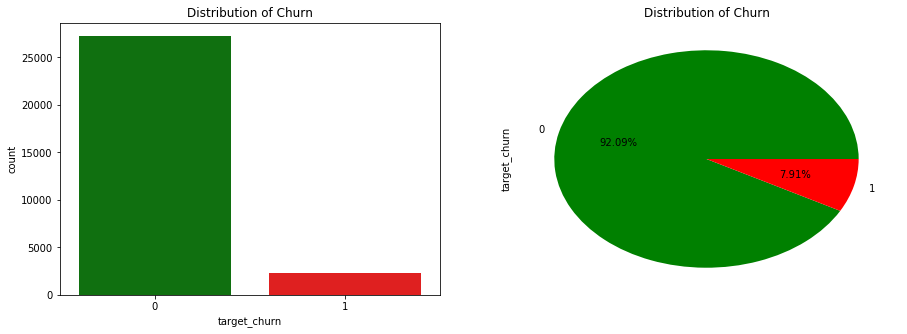

In [38]:
# Lets visualize the target variabe
fig,axes = plt.subplots(1,2,figsize = (15,5))
ax1=sns.countplot(x='target_churn', data=telecom_hv, order=telecom_hv['target_churn'].value_counts().index,ax=axes[0], palette = ['green','red'])
ax1.title.set_text('Distribution of Churn')
ax2 = telecom_hv['target_churn'].value_counts().plot.pie( autopct = "%.2f%%", colors = ['green', 'red'] ,ax=axes[1])
ax2.title.set_text('Distribution of Churn')
plt.show()

#we see that there is a lot of imbalance between the data, which will be handled in further steps

## Cleaning high value customer data 

In [39]:
#looking at data statistics of the dataframe after filtering the HVC(High Value Customers)
telecom_hv.describe(include = 'all')

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   2.959100e+04    29591.0         29374.0         29374.0   
mean    7.001205e+09      109.0             0.0             0.0   
std     6.905070e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000608e+09      109.0             0.0             0.0   
50%     7.001201e+09      109.0             0.0             0.0   
75%     7.001801e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou  last_date_of_month_6  last_date_of_month_7  \
count         29374.0               29591.0               29564.0   
mean              0.0                  30.0                  31.0   
std               0.0                   0.0                   0.0   
min               0.0                  30.0                  31.0   
25%               0.0                  30.0                  31.0   
50%               0.0                  30.0                  31.0   
75%               0.0                  30.0                  31.0   
max               0.0                  30.0                  31.0   

       last_date_of_month_8        arpu_6        arpu_7        arpu_8  \
count               29427.0  29591.000000  29591.000000  29591.000000   
mean                   31.0    560.772441    564.288777    511.407188   
std                     0.0    460.742328    479.957417    502.254509   
min                    31.0      0.000000      0.000000      0.000000   
25%                    31.0    311.585500    312.744500    234.462500   
50%                    31.0    484.003000    483.876000    430.148000   
75%                    31.0    701.438500    701.354500    664.041500   
max                    31.0  27731.088000  35145.834000  33543.624000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  \
count  29071.000000  29084.000000  28503.000000  29071.000000  29084.000000   
mean     266.733576    273.985795    244.249487    380.787406    386.068780   
std      464.001394    484.402390    466.045215    482.886751    501.062786   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       19.370000     18.307500     14.400000     78.985000     76.730000   
50%       88.640000     87.550000     73.260000    229.940000    228.045000   
75%      299.450000    300.207500    255.495000    495.625000    502.137500   
max     7376.710000   8157.780000  10752.560000   8362.360000   9667.130000   

       offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
count  28503.000000   29071.000000   29084.000000   28503.000000   
mean     349.028216      16.491866      12.949602      13.090988   
std      485.281869      77.132268      76.826205      75.937888   
min        0.000000       0.000000       0.000000       0.000000   
25%       59.285000       0.000000       0.000000       0.000000   
50%      198.460000       0.000000       0.000000       0.000000   
75%      456.190000       0.000000       0.000000       0.000000   
max    14007.340000    2613.310000    3813.290000    4169.810000   

       roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
count   29071.000000   29084.000000   28503.000000      29071.000000   
mean       27.187391      20.681277      20.828490         86.387298   
std       117.250135      97.446933     107.296217        231.433091   
min         0.000000       0.000000       0.000000          0.000000   
25%         0.000000       0.000000       0.000000          5.070000   
50%         0.000000       0.000000       0.000000         25.640000   
75%         0.000000       0.000000       0.000000         80.080000   
max      3775.110000    2812.040000    5337.040000       6431.330000   

       loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
count      29084.000000      28503.000000      29071.000000      290

In [40]:
#Checking how many columns are having only one unique value
telecom_hv.nunique().sort_values(ascending=False)

mobile_number               29591
arpu_7                      28714
arpu_6                      28692
arpu_8                      27765
total_og_mou_7              23454
total_og_mou_6              23284
total_og_mou_8              22139
offnet_mou_7                21083
offnet_mou_6                21014
total_ic_mou_7              20023
offnet_mou_8                20016
total_ic_mou_6              19954
total_ic_mou_8              19462
loc_ic_mou_6                18385
loc_ic_mou_7                18381
loc_og_mou_7                18368
loc_og_mou_6                18206
loc_ic_mou_8                17960
loc_og_mou_8                17457
onnet_mou_7                 16857
onnet_mou_6                 16757
std_og_mou_7                15812
std_og_mou_6                15772
onnet_mou_8                 15761
loc_og_t2m_mou_7            15558
loc_og_t2m_mou_6            15508
loc_ic_t2m_mou_7            15462
loc_ic_t2m_mou_6            15371
loc_ic_t2m_mou_8            15045
loc_og_t2m_mou

In [41]:
# We can see that mobile number columns is having unique values but it is not required for our analysis
telecom_hv['mobile_number'].value_counts()

7001278463    1
7001914973    1
7000224591    1
7001354654    1
7002287719    1
7000360554    1
7000215676    1
7000172093    1
7000047213    1
7001601743    1
7001919091    1
7001077364    1
7001489028    1
7000262266    1
7001912956    1
7002242685    1
7000628280    1
7000566451    1
7001002678    1
7002363270    1
7001280139    1
7000567439    1
7001398929    1
7000346259    1
7000424085    1
7001140887    1
7001380504    1
7000272479    1
7001557116    1
7000289354    1
7001663062    1
7002095141    1
7000516134    1
7002134056    1
7001218601    1
7001607723    1
7001941550    1
7002179122    1
7001381862    1
7000161845    1
7000813111    1
7000798780    1
7000695520    1
7002021441    1
7000716868    1
7001352070    1
7001017931    1
7001683532    1
7000702541    1
7000942448    1
7000794957    1
7001986640    1
7001792081    1
7000608339    1
7000356436    1
7002404740    1
7002031770    1
7000192676    1
7002146338    1
7002222311    1
7000053002    1
7002320631    1
70020339

In [42]:
#The Circle ID is having only one unique value and not required for our analysis
telecom_hv['circle_id'].value_counts(normalize = True)

109    1.0
Name: circle_id, dtype: float64

In [43]:
#Lets create a list of columns that needs to be dropped as it wont be required for our analysis
columns_to_be_dropped = []

In [44]:
# we observe that the mobile no is unique for all rows and is randomly assigned to each customer
# the circleid for the entire dataset is same, so lets drop these two columns 
columns_to_be_dropped.append('mobile_number')
columns_to_be_dropped.append('circle_id')

In [45]:
#we observe that 99% of the column contains the same value, and null values consist of 0.7% 
# there is no point keeping this column 
print(telecom_hv['loc_og_t2o_mou'].value_counts(normalize = True,dropna = False))
columns_to_be_dropped.append('loc_og_t2o_mou')

0.0    0.992667
NaN    0.007333
Name: loc_og_t2o_mou, dtype: float64


In [46]:
#we observe that 99% of the column contains the same value, and null values consist of 0.7% 
# there is no point keeping this column 
print(telecom_hv['std_og_t2o_mou'].value_counts(normalize = True,dropna = False))
columns_to_be_dropped.append('std_og_t2o_mou')

0.0    0.992667
NaN    0.007333
Name: std_og_t2o_mou, dtype: float64


In [47]:
#we observe that 99% of the column contains the same value, and null values consist of 0.7% 
# there is no point keeping this column 
print(telecom_hv['loc_ic_t2o_mou'].value_counts(normalize = True,dropna = False))
columns_to_be_dropped.append('loc_ic_t2o_mou')

0.0    0.992667
NaN    0.007333
Name: loc_ic_t2o_mou, dtype: float64


In [48]:
#we observe that 98% of the column contains the same value, and null values consist of 1.8% 
# there is no point keeping this column 
print(telecom_hv['std_og_t2c_mou_6'].value_counts(normalize = True,dropna = False))
columns_to_be_dropped.append('std_og_t2c_mou_6')

0.0    0.982427
NaN    0.017573
Name: std_og_t2c_mou_6, dtype: float64


In [49]:
#we observe that 98.2% of the column contains the same value, and null values consist of 1.7% 
# there is no point keeping this column 
print(telecom_hv['std_og_t2c_mou_7'].value_counts(normalize = True,dropna = False))
columns_to_be_dropped.append('std_og_t2c_mou_7')

0.0    0.982866
NaN    0.017134
Name: std_og_t2c_mou_7, dtype: float64


In [50]:
#we observe that 96% of the column contains the same value, and null values consist of 3.9% 
# there is no point keeping this column 
print(telecom_hv['std_og_t2c_mou_8'].value_counts(normalize = True,dropna = False))
columns_to_be_dropped.append('std_og_t2c_mou_8')

0.0    0.963232
NaN    0.036768
Name: std_og_t2c_mou_8, dtype: float64


In [51]:
#we observe that 98% of the column contains the same value, and null values consist of 1.8% 
# there is no point keeping this column 
print(telecom_hv['std_ic_t2o_mou_6'].value_counts(normalize = True,dropna = False))
columns_to_be_dropped.append('std_ic_t2o_mou_6')

0.0    0.982427
NaN    0.017573
Name: std_ic_t2o_mou_6, dtype: float64


In [52]:
#we observe that 98% of the column contains the same value, and null values consist of 1.7% 
# there is no point keeping this column 
print(telecom_hv['std_ic_t2o_mou_7'].value_counts(normalize = True,dropna = False))
columns_to_be_dropped.append('std_ic_t2o_mou_7')

0.0    0.982866
NaN    0.017134
Name: std_ic_t2o_mou_7, dtype: float64


In [53]:
#we observe that 96% of the column contains the same value, and null values consist of 3.9% 
# there is no point keeping this column 
print(telecom_hv['std_ic_t2o_mou_8'].value_counts(normalize = True,dropna = False))
columns_to_be_dropped.append('std_ic_t2o_mou_8')

0.0    0.963232
NaN    0.036768
Name: std_ic_t2o_mou_8, dtype: float64


In [54]:
#the entire column contains the same value 
print(telecom_hv['last_date_of_month_6'].value_counts(normalize = True,dropna = False))
columns_to_be_dropped.append('last_date_of_month_6')

30    1.0
Name: last_date_of_month_6, dtype: float64


In [55]:
#we observe that 99.9% of the column contains the same value, and null values consist of 0.09% 
# there is no point keeping this column 
print(telecom_hv['last_date_of_month_7'].value_counts(normalize = True,dropna = False))
columns_to_be_dropped.append('last_date_of_month_7')

31.0    0.999088
NaN     0.000912
Name: last_date_of_month_7, dtype: float64


In [56]:
#we observe that 99.45% of the column contains the same value, and null values consist of 0.05% 
# there is no point keeping this column 
print(telecom_hv['last_date_of_month_8'].value_counts(normalize = True,dropna = False))
columns_to_be_dropped.append('last_date_of_month_8')

31.0    0.994458
NaN     0.005542
Name: last_date_of_month_8, dtype: float64


In [57]:
# outside the calling circle, incoming calls from operator fixed line, is highly unlikely. 
#people from your own circle will only call you from customer care
# these columns contain 96%+ the same value and add no extra value to our model, so lets drop it 

telecom_hv.drop(columns_to_be_dropped, axis= 1, inplace= True)

In [58]:
#Shape of the dataframe after dropping the redundant columns
telecom_hv.shape

(29591, 158)

## Missing Value Treatment 

In [59]:
# Checking the percentage missing values in the dataframe to impute them accordingly
missing = round(100*(telecom_hv.isnull().sum())/no_of_rows, 2).sort_values(ascending = False)
print(missing[missing>0])

arpu_3g_8                   13.74
max_rech_data_8             13.74
count_rech_2g_8             13.74
arpu_2g_8                   13.74
date_of_last_rech_data_8    13.74
night_pck_user_8            13.74
count_rech_3g_8             13.74
fb_user_8                   13.74
arpu_3g_6                   12.98
fb_user_6                   12.98
max_rech_data_6             12.98
count_rech_3g_6             12.98
date_of_last_rech_data_6    12.98
night_pck_user_6            12.98
arpu_2g_6                   12.98
count_rech_2g_6             12.98
count_rech_3g_7             12.67
count_rech_2g_7             12.67
night_pck_user_7            12.67
arpu_2g_7                   12.67
arpu_3g_7                   12.67
date_of_last_rech_data_7    12.67
fb_user_7                   12.67
max_rech_data_7             12.67
loc_og_t2f_mou_8             1.09
std_ic_mou_8                 1.09
loc_og_t2c_mou_8             1.09
loc_og_mou_8                 1.09
std_og_mou_8                 1.09
spl_ic_mou_8  

In [60]:
# Lets filter out the below columns from the dataframe and analyse first
df  = telecom_hv.loc[:, telecom_hv.columns.str.contains('fb|night|roam|spl|isd')]
df.head()

roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
0             NaN            NaN           0.00            NaN            NaN   
7           16.23          33.49          31.64          23.74          12.59   
8            0.00           0.00           0.00           0.00           0.00   
21           0.00           0.00           0.00           0.00           0.00   
23           0.00           0.00           0.00           0.00           0.00   

    roam_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  \
0            0.00           NaN           NaN          0.00           NaN   
7           38.06           0.0          0.18         10.01           4.5   
8            0.00           0.0          0.00          0.00           0.0   
21           0.00           0.0          0.00          0.00           0.0   
23           0.00           0.0          0.01          0.00           0.1   

    spl_og_mou_7  spl_og_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  \
0            NaN          0.00           NaN           NaN           0.0   
7            0.0          6.50          0.21           0.0           0.0   
8            0.0         10.23          0.00           0.0           0.0   
21           0.0          0.00          0.00           0.0           0.0   
23           0.0         17.71          0.00           0.0           0.0   

    isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  night_pck_user_6  \
0            NaN           NaN          0.00               0.0   
7           2.06         14.53         31.59               NaN   
8           0.00          0.00          0.00               NaN   
21          0.00          0.00          0.00               NaN   
23          0.00         28.23          3.74               NaN   

    night_pck_user_7  night_pck_user_8  fb_user_6  fb_user_7  fb_user_8  
0                0.0               0.0        1.0        1.0        1.0  
7                NaN               NaN        NaN        NaN        NaN  
8                0.0               0.0        NaN        1.0        1.0  
21               NaN               NaN        NaN        NaN        NaN  
23               0.0               0.0        NaN        1.0        1.0

In [61]:
# fb refers to Service scheme to avail services of Facebook and similar social networking sites
# roam refers to wiether the person Indicates that customer is in roaming zone during the call
# night Scheme to use during specific night hours only
# Special calls were made or not 
# ISD calls were made or not 
#if its Nan, then it means they didnt avail the service, so lets replace NAN with indicating not utlized 

for i in df.columns:
    telecom_hv[i]=telecom_hv[i].replace({np.nan:0})

In [62]:
# Checking the count of null values for all the columns that are related to the 6th month 
df_6 = telecom_hv.loc[:, telecom_hv.columns.str.contains('_6')]
df_6.isnull().sum()

arpu_6                          0
onnet_mou_6                   520
offnet_mou_6                  520
roam_ic_mou_6                   0
roam_og_mou_6                   0
loc_og_t2t_mou_6              520
loc_og_t2m_mou_6              520
loc_og_t2f_mou_6              520
loc_og_t2c_mou_6              520
loc_og_mou_6                  520
std_og_t2t_mou_6              520
std_og_t2m_mou_6              520
std_og_t2f_mou_6              520
std_og_mou_6                  520
isd_og_mou_6                    0
spl_og_mou_6                    0
og_others_6                   520
total_og_mou_6                  0
loc_ic_t2t_mou_6              520
loc_ic_t2m_mou_6              520
loc_ic_t2f_mou_6              520
loc_ic_mou_6                  520
std_ic_t2t_mou_6              520
std_ic_t2m_mou_6              520
std_ic_t2f_mou_6              520
std_ic_mou_6                  520
total_ic_mou_6                  0
spl_ic_mou_6                    0
isd_ic_mou_6                    0
ic_others_6   

In [63]:
# we observe that the place where date_of_last_rech_data_6 is null, the columns max_rech_data_6, count_rech_2G_6
#count_rech_3g_6, arpu_3g_6, arpu_2g_6 are all null, indicating data was not bought in that month 
# so lets impute it all as 0

col_6  = ['date_of_last_rech_data_6','max_rech_data_6','count_rech_2g_6','count_rech_3g_6','arpu_3g_6','arpu_2g_6']

for i in col_6:
    telecom_hv[i]=telecom_hv[i].replace({np.nan:0})

In [64]:
#All the other columns are null when total recharge amount is null , indicating it is not availed or used
for i in df_6.columns:
    telecom_hv[i]=telecom_hv[i].replace({np.nan:0})

In [65]:
# Checking the count of null values for all the columns that are related to the 7th month 
df_7 = telecom_hv.loc[:, telecom_hv.columns.str.contains('_7')]
df_7.isnull().sum()

arpu_7                          0
onnet_mou_7                   507
offnet_mou_7                  507
roam_ic_mou_7                   0
roam_og_mou_7                   0
loc_og_t2t_mou_7              507
loc_og_t2m_mou_7              507
loc_og_t2f_mou_7              507
loc_og_t2c_mou_7              507
loc_og_mou_7                  507
std_og_t2t_mou_7              507
std_og_t2m_mou_7              507
std_og_t2f_mou_7              507
std_og_mou_7                  507
isd_og_mou_7                    0
spl_og_mou_7                    0
og_others_7                   507
total_og_mou_7                  0
loc_ic_t2t_mou_7              507
loc_ic_t2m_mou_7              507
loc_ic_t2f_mou_7              507
loc_ic_mou_7                  507
std_ic_t2t_mou_7              507
std_ic_t2m_mou_7              507
std_ic_t2f_mou_7              507
std_ic_mou_7                  507
total_ic_mou_7                  0
spl_ic_mou_7                    0
isd_ic_mou_7                    0
ic_others_7   

In [66]:
# we observe that the place where date_of_last_rech_data_6 is null, the columns max_rech_data_6, count_rech_2G_6
#count_rech_3g_6, arpu_3g_6, arpu_2g_6 are all null, indicating data was not bought in that month 
# so lets impute it all as 0

col_7  = ['date_of_last_rech_data_7','max_rech_data_7','count_rech_2g_7','count_rech_3g_7','arpu_3g_7','arpu_2g_7']

for i in col_7:
    telecom_hv[i]=telecom_hv[i].replace({np.nan:0})

In [67]:
#All the other columns are null when total recharge amount is null , indicating it is not availed or used
for i in df_7.columns:
    telecom_hv[i]=telecom_hv[i].replace({np.nan:0})

In [68]:
#Filtering all the columns realted to the 8th month in the dataframe
df_8 = telecom_hv.loc[:, telecom_hv.columns.str.contains('_8')]
df_8.head()

arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
0    213.803         0.00          0.00           0.00           0.00   
7   3171.480        52.29        325.91          31.64          38.06   
8    137.362        35.08        136.48           0.00           0.00   
21   637.760        85.14        983.39           0.00           0.00   
23   366.966        33.58        205.89           0.00           0.00   

    loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
0               0.00              0.00              0.00              0.00   
7              40.28            162.28             53.23              0.00   
8              12.49             50.54              0.00              7.15   
21             23.34            104.81              1.58              0.00   
23             33.58            148.56              0.00             17.71   

    loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  \
0           0.00              0.00              0.00              0.00   
7         255.79             12.01             49.14             16.68   
8          63.04             22.58             75.69              0.00   
21        129.74             61.79            876.99              0.00   
23        182.14              0.00             39.61              0.00   

    std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  total_og_mou_8  \
0           0.00          0.00          0.00          0.0            0.00   
7          77.84         10.01          6.50          0.0          350.16   
8          98.28          0.00         10.23          0.0          171.56   
21        938.79          0.00          0.00          0.0         1068.54   
23         39.61          0.00         17.71          0.0          239.48   

    loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  \
0               0.16              4.13              1.15          5.44   
7              27.31            121.19             39.53        188.04   
8               0.31             15.48              0.00         15.79   
21             19.54            129.16             10.39        159.11   
23             76.64            146.84              0.71        224.21   

    std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  \
0               0.00              0.00              0.00          0.00   
7              30.39            141.33             22.21        193.94   
8               0.10              0.65              0.00          0.75   
21              0.18            101.74              0.00        101.93   
23             13.38             43.91              0.00         57.29   

    total_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8  ic_others_8  total_rech_num_8  \
0             5.44           0.0          0.00         0.00                 2   
7           428.74           0.0         31.59        15.14                 7   
8            16.54           0.0          0.00         0.00                14   
21          261.04           0.0          0.00         0.00                27   
23          298.33           0.0          3.74        13.06                 4   

    total_rech_amt_8  max_rech_amt_8  date_of_last_rech_8  last_day_rch_amt_8  \
0                252             252                  8.0                 252   
7               3638            1580                 26.0                 779   
8                120              30                 30.0                  10   
21               718              50                 31.0                  50   
23               439             179                 24.0                   0   

    date_of_last_rech_data_8  max_rech_data_8  count_rech_2g_8  \
0                        8.0            252.0              0.0   
7                        NaN              NaN              NaN   
8                       23.0             23.0              3.0   
21                       NaN              NaN              NaN

In [69]:
# Checking the count of null values for all the columns that are related to the 8th month 
df_8.isnull().sum()

arpu_8                          0
onnet_mou_8                  1088
offnet_mou_8                 1088
roam_ic_mou_8                   0
roam_og_mou_8                   0
loc_og_t2t_mou_8             1088
loc_og_t2m_mou_8             1088
loc_og_t2f_mou_8             1088
loc_og_t2c_mou_8             1088
loc_og_mou_8                 1088
std_og_t2t_mou_8             1088
std_og_t2m_mou_8             1088
std_og_t2f_mou_8             1088
std_og_mou_8                 1088
isd_og_mou_8                    0
spl_og_mou_8                    0
og_others_8                  1088
total_og_mou_8                  0
loc_ic_t2t_mou_8             1088
loc_ic_t2m_mou_8             1088
loc_ic_t2f_mou_8             1088
loc_ic_mou_8                 1088
std_ic_t2t_mou_8             1088
std_ic_t2m_mou_8             1088
std_ic_t2f_mou_8             1088
std_ic_mou_8                 1088
total_ic_mou_8                  0
spl_ic_mou_8                    0
isd_ic_mou_8                    0
ic_others_8   

In [70]:
# we observe that the place where date_of_last_rech_data_8 is null, the columns max_rech_data_8, count_rech_2G_8
#count_rech_3g_8, arpu_3g_8, arpu_2g_8 are all null, indicating data was not bought in that month 
# so lets impute it all as 0

col_8  = ['date_of_last_rech_data_8','max_rech_data_8','count_rech_2g_8','count_rech_3g_8','arpu_3g_8','arpu_2g_8']

for i in col_8:
    telecom_hv[i]=telecom_hv[i].replace({np.nan:0})

In [71]:
#All the other columns are null when total recharge amount is null , indicating it is not availed or used
for i in df_8.columns:
    telecom_hv[i]=telecom_hv[i].replace({np.nan:0})

## Outlier Detection and Handling

In [72]:
#Lets Define some function for Outlier detection and Handling
# Function for Removing outliers 
def drop_outliers(col):
    Q1 = telecom_hv[col].quantile(.25)
    Q3 = telecom_hv[col].quantile(.99)
    IQR = Q3-Q1
    telecom_hv[col] =  telecom_hv[(telecom_hv[col] >= (Q1-(1.5*IQR))) & (telecom_hv[col] <= (Q3+(1.5*IQR)))] 
    return telecom_hv[col]   

In [73]:
#Function for Capping the Outliers
def outliers_3sigma(col, k=3):
    upper_limit = telecom_hv[col].mean() + k*telecom_hv[col].std()
    lower_limit = telecom_hv[col].mean() - k*telecom_hv[col].std()
    telecom_hv[col][telecom_hv[col]<lower_limit] = lower_limit
    telecom_hv[col][telecom_hv[col]>upper_limit] = upper_limit
    return telecom_hv[col]

In [74]:
#Function for plotting graphs
def col_plots(col):
    print(telecom_hv[col].describe(percentiles = [0.01,0.05,0.25,0.50,0.75,0.90,0.95,0.99]))
    plt.figure(figsize=(15, 5))
    plt.subplot(1,3,1)
    plt.hist(telecom_hv[col])
    plt.subplot(1,3,2)
    plt.scatter(telecom_hv[col],telecom_hv['target_churn'])
    plt.subplot(1,3,3)
    plt.boxplot(telecom_hv[col])
    plt.show()

arpu_6
skewness is  12.115559035641493
count    29591.000000
mean       560.772441
std        460.742328
min          0.000000
1%           6.749600
5%         114.950000
25%        311.585500
50%        484.003000
75%        701.438500
90%        997.024000
95%       1242.443000
99%       1985.844600
max      27731.088000
Name: arpu_6, dtype: float64


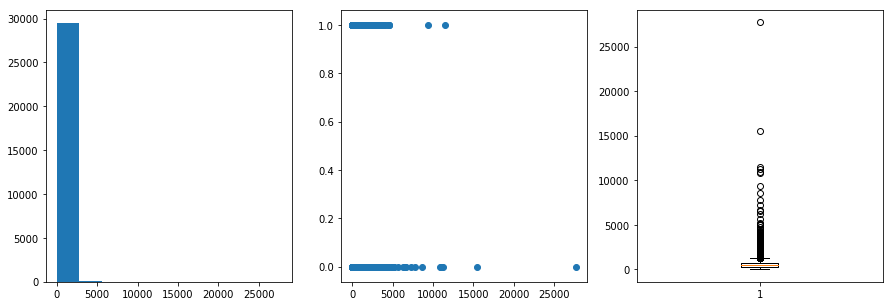

##################################################
arpu_7
skewness is  17.6825159616326
count    29591.000000
mean       564.288777
std        479.957417
min          0.000000
1%          10.082800
5%         119.625500
25%        312.744500
50%        483.876000
75%        701.354500
90%        999.089000
95%       1265.525000
99%       1999.856800
max      35145.834000
Name: arpu_7, dtype: float64


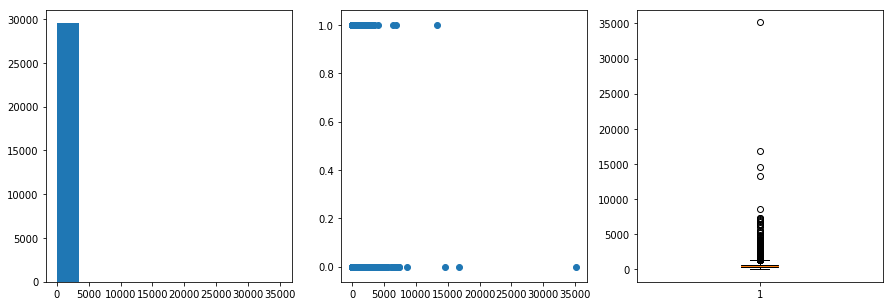

##################################################
arpu_8
skewness is  15.418337043652802
count    29591.000000
mean       511.407188
std        502.254509
min          0.000000
1%           0.000000
5%          15.775000
25%        234.462500
50%        430.148000
75%        664.041500
90%        981.500000
95%       1257.329500
99%       1986.646500
max      33543.624000
Name: arpu_8, dtype: float64


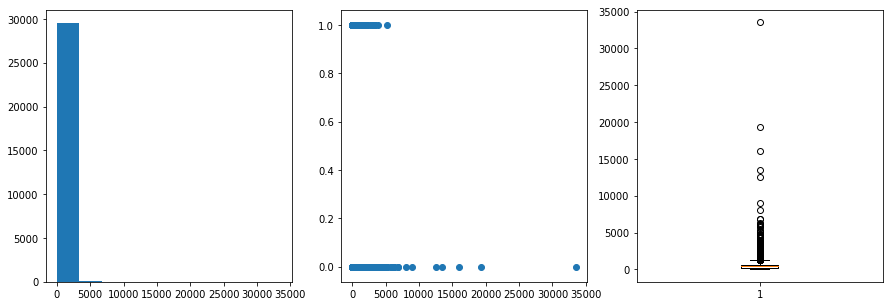

##################################################
onnet_mou_6
skewness is  4.031714413025779
count    29591.000000
mean       262.046290
std        461.239734
min          0.000000
1%           0.000000
5%           0.000000
25%         17.280000
50%         85.110000
75%        292.290000
90%        757.930000
95%       1138.235000
99%       2158.160000
max       7376.710000
Name: onnet_mou_6, dtype: float64


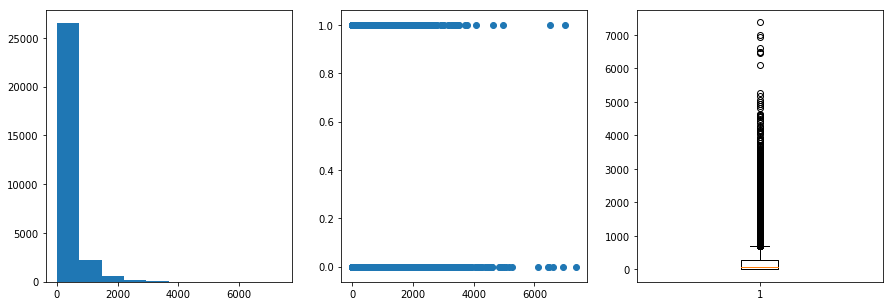

##################################################
onnet_mou_7
skewness is  4.229588238317886
count    29591.000000
mean       269.291435
std        481.548970
min          0.000000
1%           0.000000
5%           0.000000
25%         16.240000
50%         83.740000
75%        292.420000
90%        788.180000
95%       1191.035000
99%       2209.982000
max       8157.780000
Name: onnet_mou_7, dtype: float64


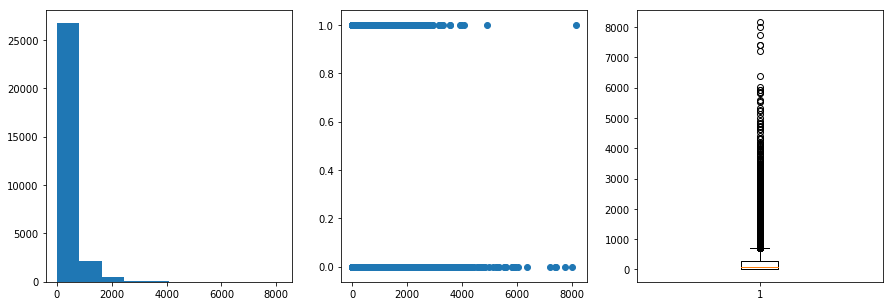

##################################################
onnet_mou_8
skewness is  5.057101629343448
count    29591.000000
mean       235.268938
std        459.700838
min          0.000000
1%           0.000000
5%           0.000000
25%         10.820000
50%         66.310000
75%        241.600000
90%        668.160000
95%       1077.370000
99%       2162.426000
max      10752.560000
Name: onnet_mou_8, dtype: float64


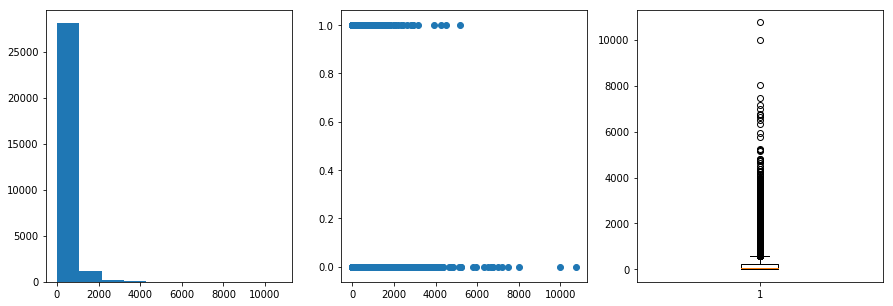

##################################################
offnet_mou_6
skewness is  3.3800409177352138
count    29591.000000
mean       374.095863
std        481.232994
min          0.000000
1%           0.000000
5%           0.300000
25%         72.290000
50%        223.040000
75%        488.885000
90%        897.990000
95%       1256.970000
99%       2325.327000
max       8362.360000
Name: offnet_mou_6, dtype: float64


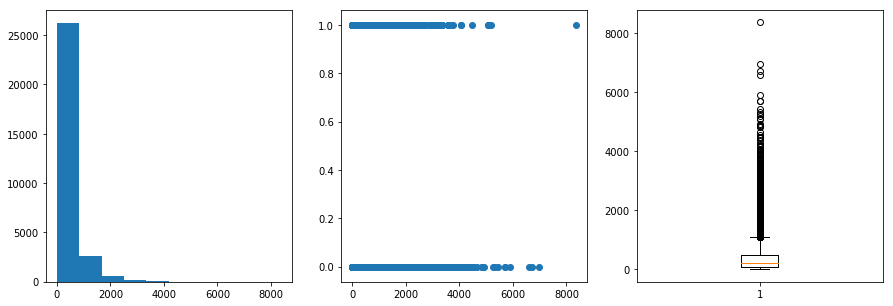

##################################################
offnet_mou_7
skewness is  3.6270775099423487
count    29591.000000
mean       379.454037
std        499.271690
min          0.000000
1%           0.000000
5%           0.205000
25%         70.450000
50%        221.190000
75%        495.435000
90%        919.390000
95%       1276.510000
99%       2411.832000
max       9667.130000
Name: offnet_mou_7, dtype: float64


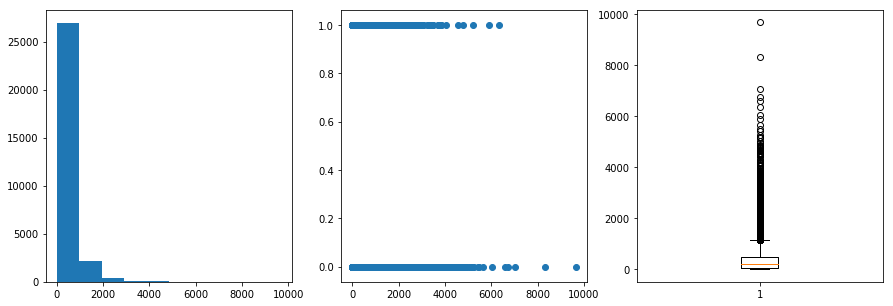

##################################################
offnet_mou_8
skewness is  4.985108210916378
count    29591.000000
mean       336.195169
std        480.784734
min          0.000000
1%           0.000000
5%           0.000000
25%         47.900000
50%        184.030000
75%        440.485000
90%        825.280000
95%       1170.130000
99%       2190.709000
max      14007.340000
Name: offnet_mou_8, dtype: float64


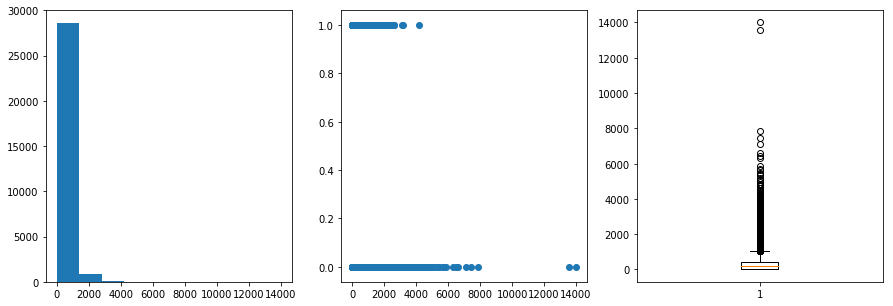

##################################################
roam_ic_mou_6
skewness is  11.52355385066342
count    29591.000000
mean        16.202056
std         76.482226
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%          0.000000
90%         27.630000
95%         85.885000
99%        344.791000
max       2613.310000
Name: roam_ic_mou_6, dtype: float64


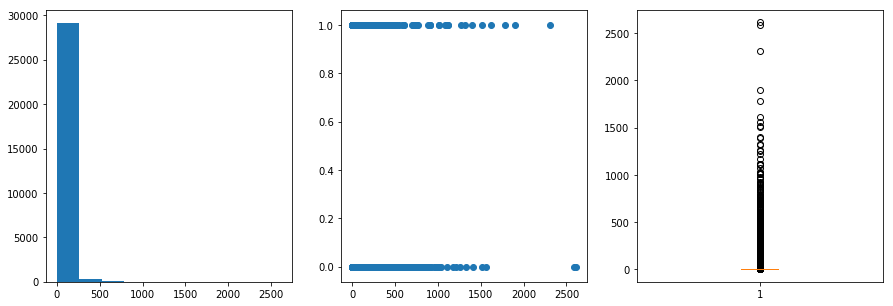

##################################################
roam_ic_mou_7
skewness is  17.26533549197087
count    29591.000000
mean        12.727729
std         76.183721
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%          0.000000
90%         14.430000
95%         56.100000
99%        283.837000
max       3813.290000
Name: roam_ic_mou_7, dtype: float64


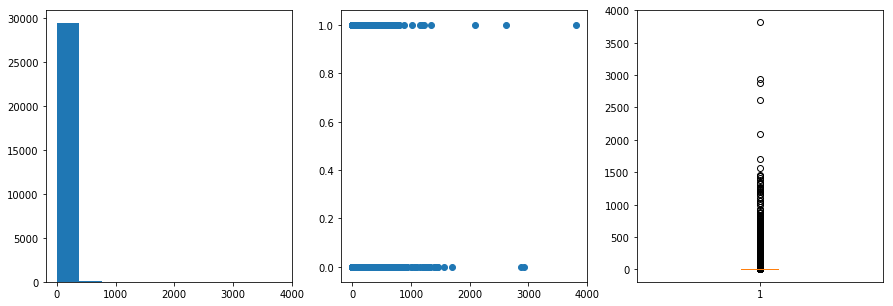

##################################################
roam_ic_mou_8
skewness is  18.591456787520062
count    29591.000000
mean        12.609659
std         74.569435
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%          0.000000
90%         15.240000
95%         56.625000
99%        283.557000
max       4169.810000
Name: roam_ic_mou_8, dtype: float64


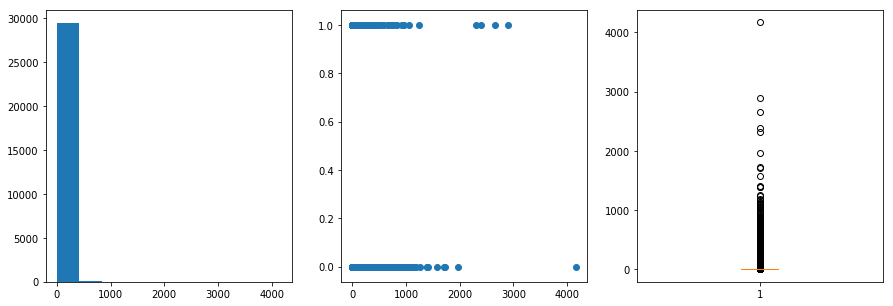

##################################################
roam_og_mou_6
skewness is  9.425634617064166
count    29591.000000
mean        26.709629
std        116.270211
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%          0.000000
90%         50.940000
95%        146.500000
99%        532.386000
max       3775.110000
Name: roam_og_mou_6, dtype: float64


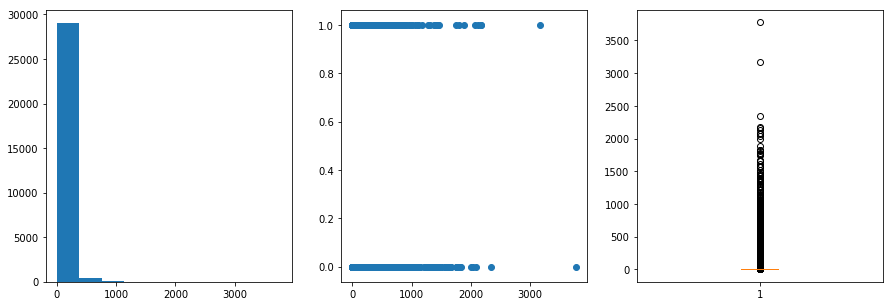

##################################################
roam_og_mou_7
skewness is  9.346686203508677
count    29591.000000
mean        20.326932
std         96.645762
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%          0.000000
90%         31.490000
95%        105.680000
99%        440.703000
max       2812.040000
Name: roam_og_mou_7, dtype: float64


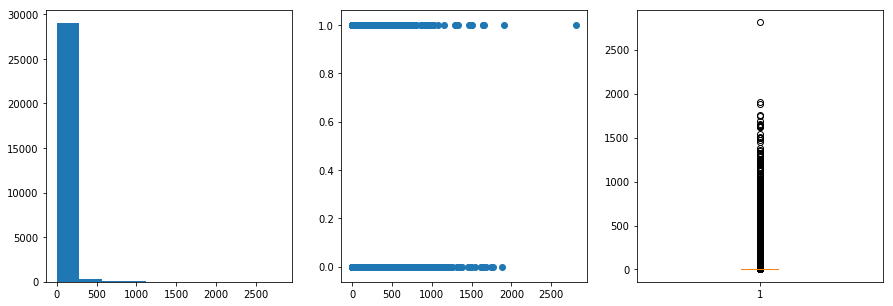

##################################################
roam_og_mou_8
skewness is  14.480058677738889
count    29591.000000
mean        20.062669
std        105.378075
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%          0.000000
90%         29.540000
95%        102.095000
99%        427.963000
max       5337.040000
Name: roam_og_mou_8, dtype: float64


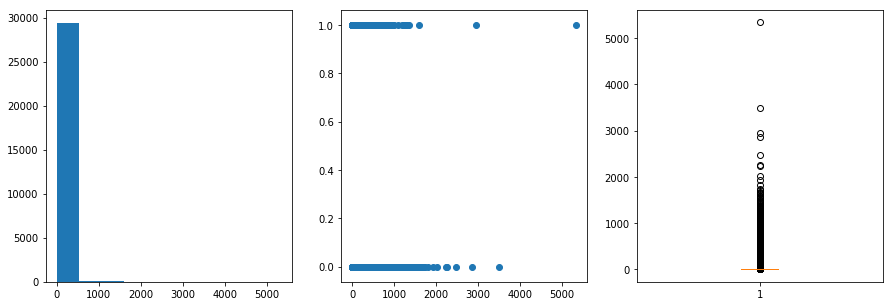

##################################################
loc_og_t2t_mou_6
skewness is  9.516314214936022
count    29591.000000
mean        84.869221
std        229.671197
min          0.000000
1%           0.000000
5%           0.000000
25%          4.410000
50%         24.480000
75%         78.500000
90%        188.990000
95%        324.010000
99%       1011.831000
max       6431.330000
Name: loc_og_t2t_mou_6, dtype: float64


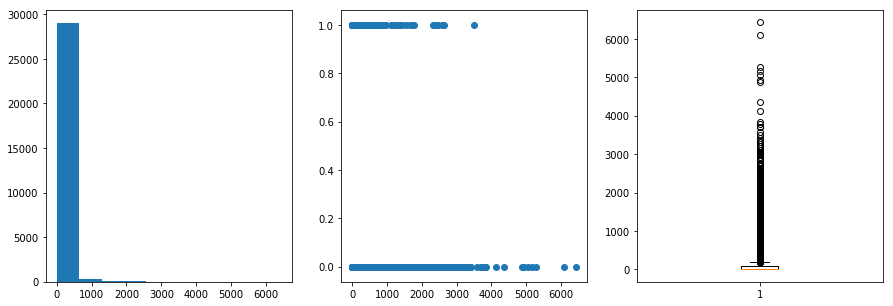

##################################################
loc_og_t2t_mou_7
skewness is  10.51782026100785
count    29591.000000
mean        86.214222
std        241.687548
min          0.000000
1%           0.000000
5%           0.000000
25%          4.710000
50%         24.880000
75%         79.070000
90%        191.780000
95%        325.790000
99%       1022.535000
max       7400.660000
Name: loc_og_t2t_mou_7, dtype: float64


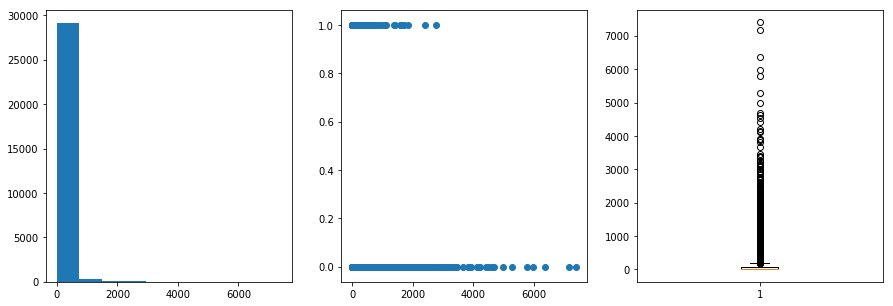

##################################################
loc_og_t2t_mou_8
skewness is  14.058243974984691
count    29591.000000
mean        78.595718
std        228.604271
min          0.000000
1%           0.000000
5%           0.000000
25%          2.640000
50%         20.980000
75%         72.530000
90%        179.530000
95%        300.955000
99%        917.323000
max      10752.560000
Name: loc_og_t2t_mou_8, dtype: float64


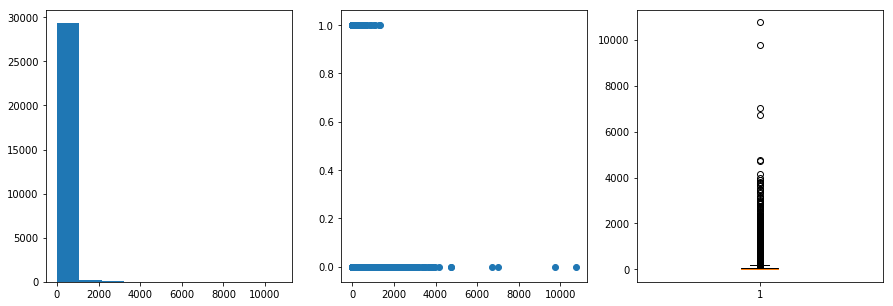

##################################################
loc_og_t2m_mou_6
skewness is  4.350831708021149
count    29591.000000
mean       163.411259
std        249.894943
min          0.000000
1%           0.000000
5%           0.000000
25%         19.355000
50%         77.590000
75%        209.020000
90%        419.310000
95%        604.285000
99%       1136.968000
max       4729.740000
Name: loc_og_t2m_mou_6, dtype: float64


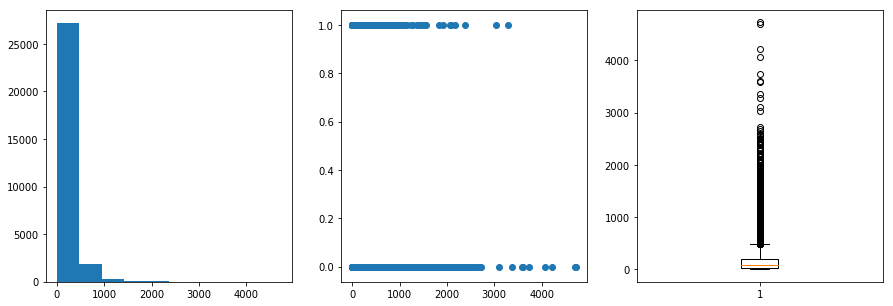

##################################################
loc_og_t2m_mou_7
skewness is  4.040928179408106
count    29591.000000
mean       163.549210
std        241.397202
min          0.000000
1%           0.000000
5%           0.000000
25%         20.735000
50%         79.490000
75%        209.130000
90%        423.410000
95%        602.125000
99%       1111.491000
max       4557.140000
Name: loc_og_t2m_mou_7, dtype: float64


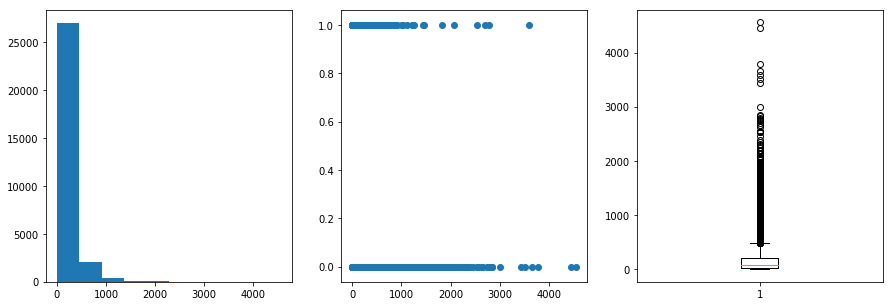

##################################################
loc_og_t2m_mou_8
skewness is  3.9360407785586515
count    29591.000000
mean       152.212777
std        232.610052
min          0.000000
1%           0.000000
5%           0.000000
25%         13.560000
50%         68.560000
75%        198.060000
90%        399.690000
95%        575.210000
99%       1089.158000
max       4961.330000
Name: loc_og_t2m_mou_8, dtype: float64


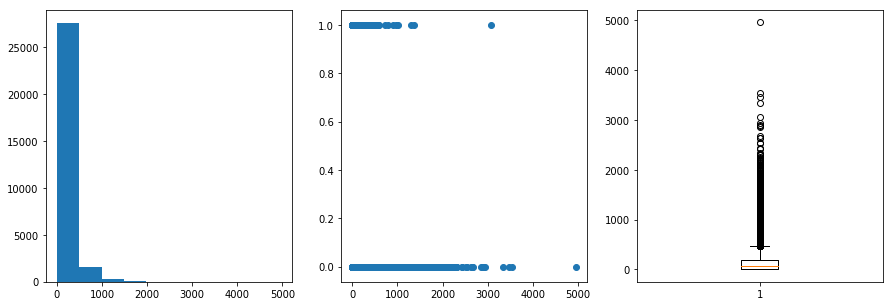

##################################################
loc_og_t2f_mou_6
skewness is  18.104984673665637
count    29591.000000
mean         6.350538
std         22.189585
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%          4.230000
90%         16.140000
95%         30.475000
99%         87.640000
max       1466.030000
Name: loc_og_t2f_mou_6, dtype: float64


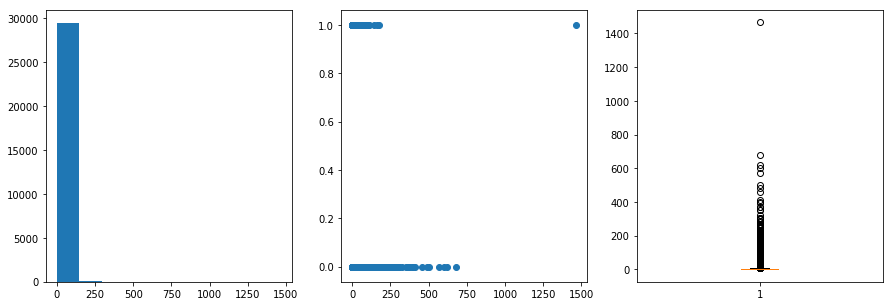

##################################################
loc_og_t2f_mou_7
skewness is  16.65827548316446
count    29591.000000
mean         6.448067
std         22.043368
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.110000
75%          4.395000
90%         16.330000
95%         31.180000
99%         87.545000
max       1196.430000
Name: loc_og_t2f_mou_7, dtype: float64


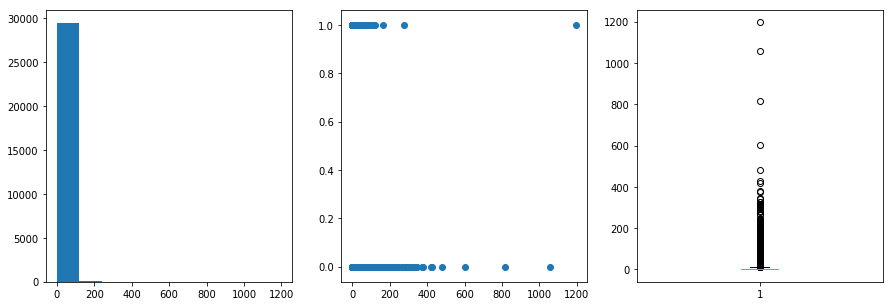

##################################################
loc_og_t2f_mou_8
skewness is  12.700948864305545
count    29591.000000
mean         5.912287
std         19.591620
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%          3.940000
90%         15.210000
95%         28.390000
99%         82.375000
max        928.490000
Name: loc_og_t2f_mou_8, dtype: float64


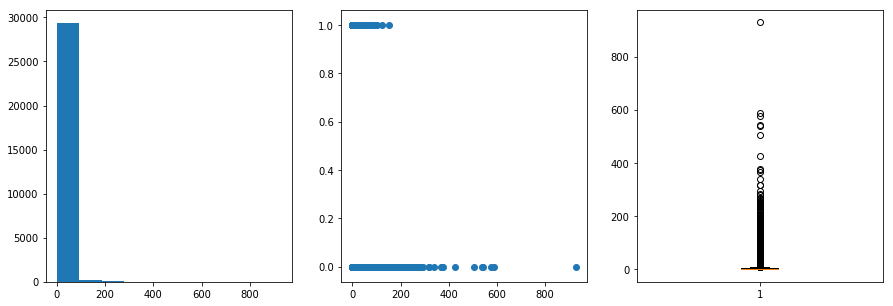

##################################################
loc_og_t2c_mou_6
skewness is  12.87023274503985
count    29591.000000
mean         1.580464
std          6.319813
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%          0.000000
90%          4.230000
95%          8.900000
99%         24.997000
max        271.440000
Name: loc_og_t2c_mou_6, dtype: float64


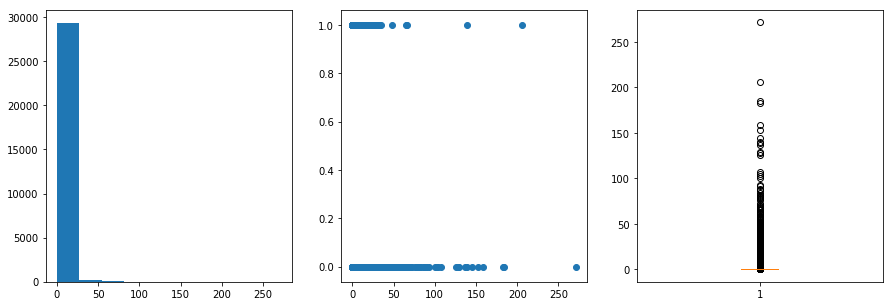

##################################################
loc_og_t2c_mou_7
skewness is  25.6709562963268
count    29591.000000
mean         1.895768
std          9.178009
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%          0.100000
90%          5.030000
95%         10.270000
99%         27.980000
max        569.710000
Name: loc_og_t2c_mou_7, dtype: float64


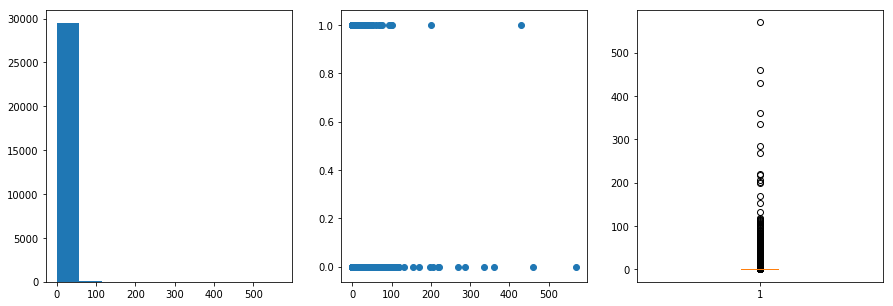

##################################################
loc_og_t2c_mou_8
skewness is  16.72008280886847
count    29591.000000
mean         1.708990
std          7.165613
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%          0.030000
90%          4.610000
95%          9.420000
99%         28.210000
max        351.830000
Name: loc_og_t2c_mou_8, dtype: float64


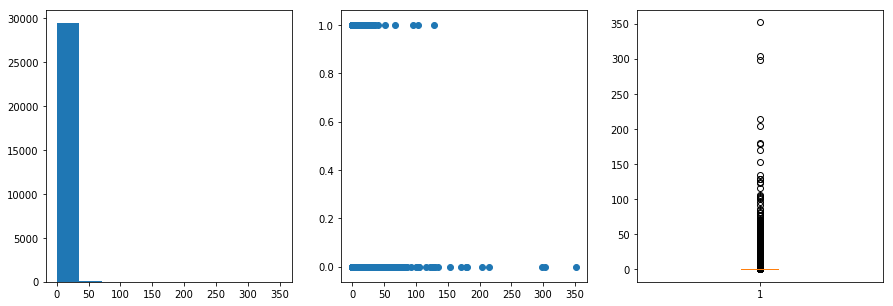

##################################################
loc_og_mou_6
skewness is  4.497119747617326
count    29591.000000
mean       254.639250
std        378.712566
min          0.000000
1%           0.000000
5%           0.000000
25%         32.580000
50%        125.130000
75%        332.750000
90%        640.080000
95%        914.930000
99%       1786.666000
max      10643.380000
Name: loc_og_mou_6, dtype: float64


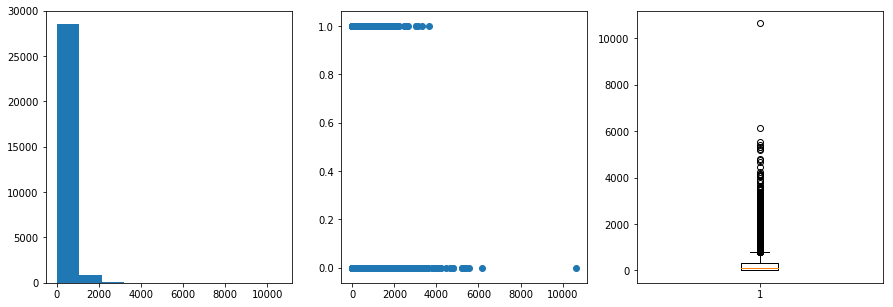

##################################################
loc_og_mou_7
skewness is  4.375358766096184
count    29591.000000
mean       256.219877
std        375.944181
min          0.000000
1%           0.000000
5%           0.000000
25%         34.960000
50%        129.010000
75%        334.925000
90%        639.380000
95%        908.985000
99%       1746.371000
max       7674.780000
Name: loc_og_mou_7, dtype: float64


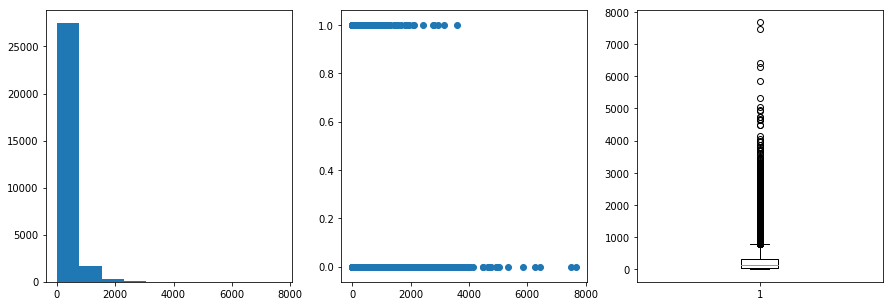

##################################################
loc_og_mou_8
skewness is  5.286709645500688
count    29591.000000
mean       236.728666
std        363.222569
min          0.000000
1%           0.000000
5%           0.000000
25%         23.180000
50%        111.830000
75%        312.235000
90%        610.080000
95%        862.485000
99%       1666.810000
max      11039.910000
Name: loc_og_mou_8, dtype: float64


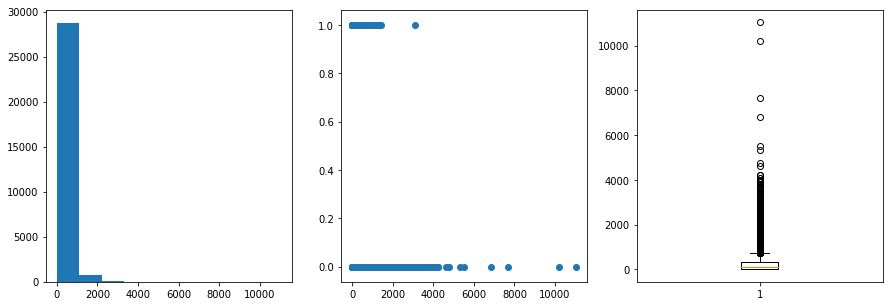

##################################################
std_og_t2t_mou_6
skewness is  4.643037273506202
count    29591.000000
mean       166.712803
std        405.478563
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          2.760000
75%        110.320000
90%        570.140000
95%        971.810000
99%       1888.821000
max       7366.580000
Name: std_og_t2t_mou_6, dtype: float64


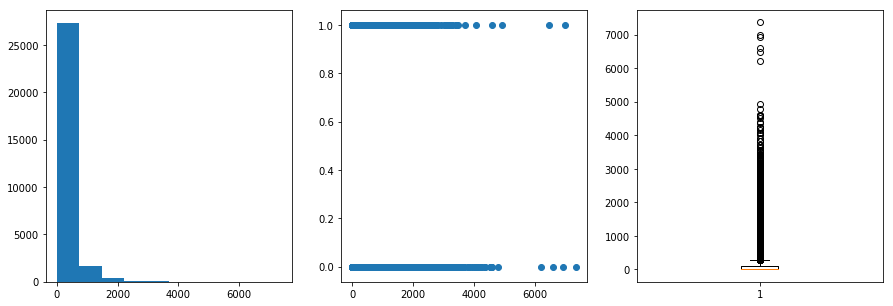

##################################################
std_og_t2t_mou_7
skewness is  4.698019706255353
count    29591.000000
mean       175.089775
std        422.698350
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          2.710000
75%        117.325000
90%        603.830000
95%       1014.910000
99%       1918.470000
max       8133.660000
Name: std_og_t2t_mou_7, dtype: float64


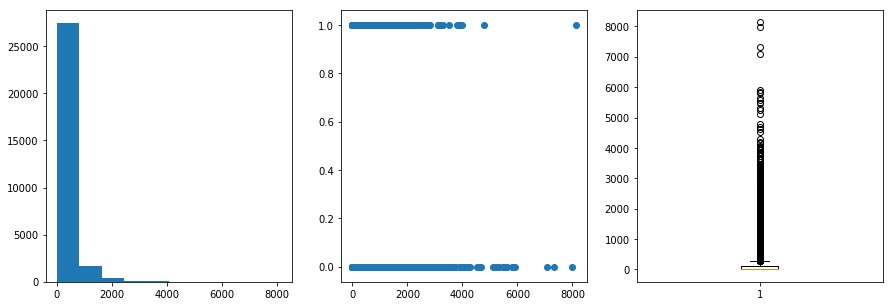

##################################################
std_og_t2t_mou_8
skewness is  5.298880157739391
count    29591.000000
mean       149.001316
std        398.618018
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.660000
75%         78.650000
90%        476.590000
95%        891.210000
99%       1914.059000
max       8014.430000
Name: std_og_t2t_mou_8, dtype: float64


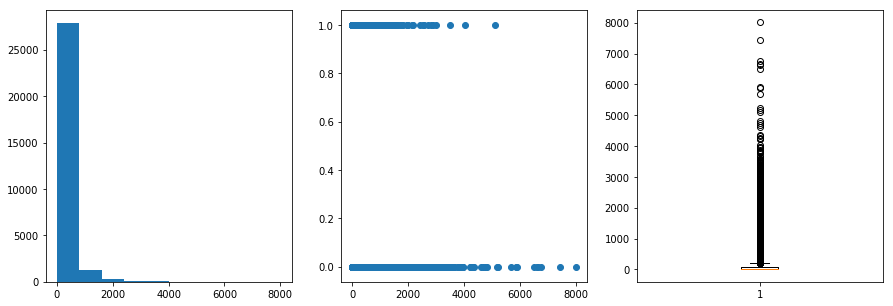

##################################################
std_og_t2m_mou_6
skewness is  4.682590419650616
count    29591.000000
mean       179.557871
std        408.428977
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%         16.510000
75%        154.760000
90%        550.240000
95%        933.710000
99%       1951.787000
max       8314.760000
Name: std_og_t2m_mou_6, dtype: float64


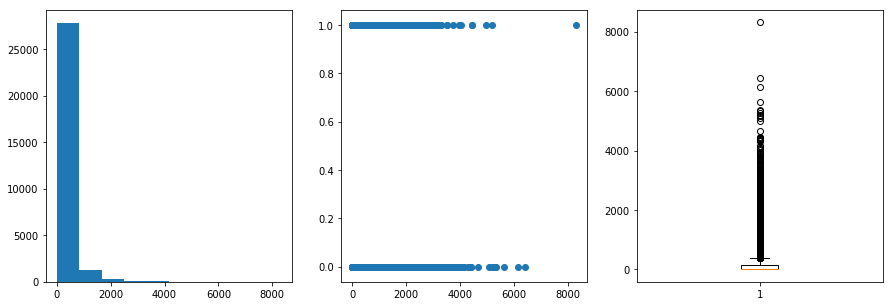

##################################################
std_og_t2m_mou_7
skewness is  4.904732826319655
count    29591.000000
mean       188.576817
std        435.016347
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%         16.260000
75%        160.635000
90%        588.930000
95%        981.085000
99%       2117.820000
max       9284.740000
Name: std_og_t2m_mou_7, dtype: float64


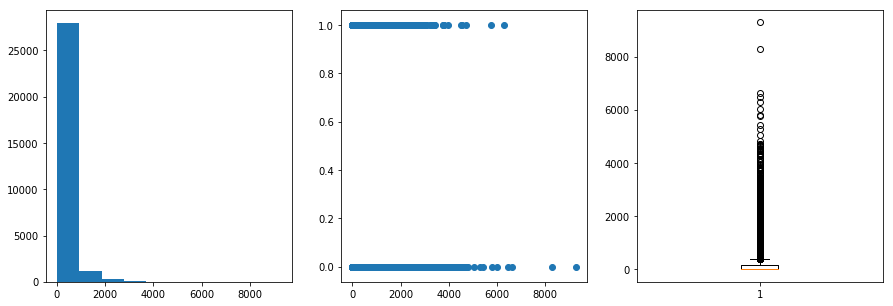

##################################################
std_og_t2m_mou_8
skewness is  7.335626051588894
count    29591.000000
mean       157.822944
std        409.572341
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          9.680000
75%        118.450000
90%        467.360000
95%        844.510000
99%       1899.736000
max      13950.040000
Name: std_og_t2m_mou_8, dtype: float64


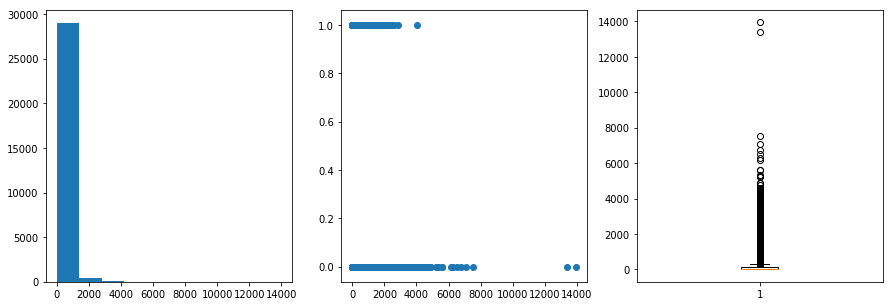

##################################################
std_og_t2f_mou_6
skewness is  17.594756316081476
count    29591.000000
mean         1.800618
std         11.941702
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%          0.000000
90%          1.690000
95%          6.835000
99%         39.250000
max        628.560000
Name: std_og_t2f_mou_6, dtype: float64


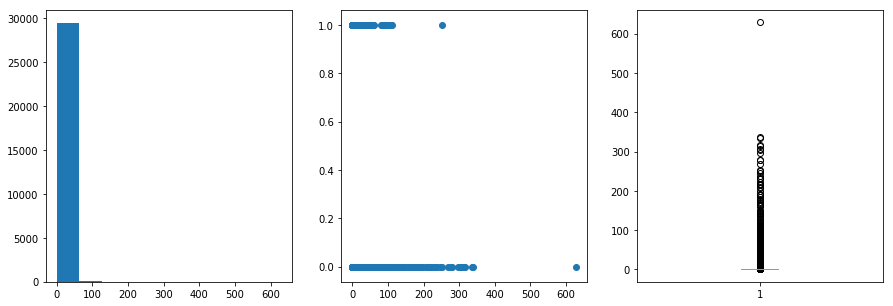

##################################################
std_og_t2f_mou_7
skewness is  18.283881324766458
count    29591.000000
mean         1.828040
std         13.038882
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%          0.000000
90%          1.650000
95%          6.630000
99%         39.660000
max        544.630000
Name: std_og_t2f_mou_7, dtype: float64


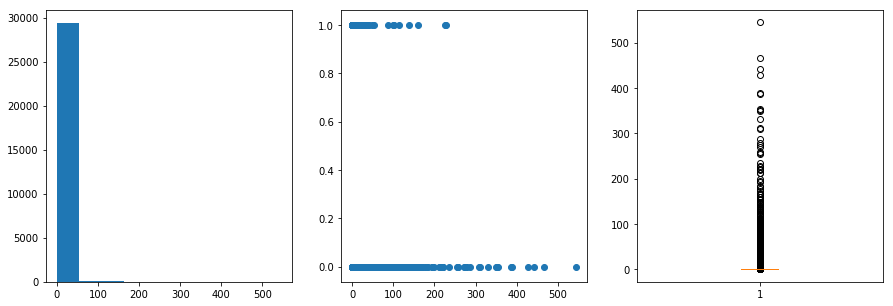

##################################################
std_og_t2f_mou_8
skewness is  17.46190865488216
count    29591.000000
mean         1.591419
std         10.982875
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%          0.000000
90%          1.300000
95%          5.960000
99%         35.019000
max        516.910000
Name: std_og_t2f_mou_8, dtype: float64


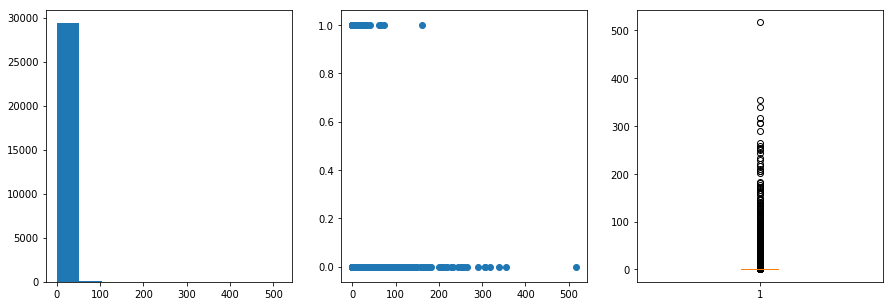

##################################################
std_og_mou_6
skewness is  3.084468327147896
count    29591.000000
mean       348.075020
std        609.025434
min          0.000000
1%           0.000000
5%           0.000000
25%          0.400000
50%         45.480000
75%        467.685000
90%       1118.240000
95%       1553.185000
99%       2744.643000
max       8432.990000
Name: std_og_mou_6, dtype: float64


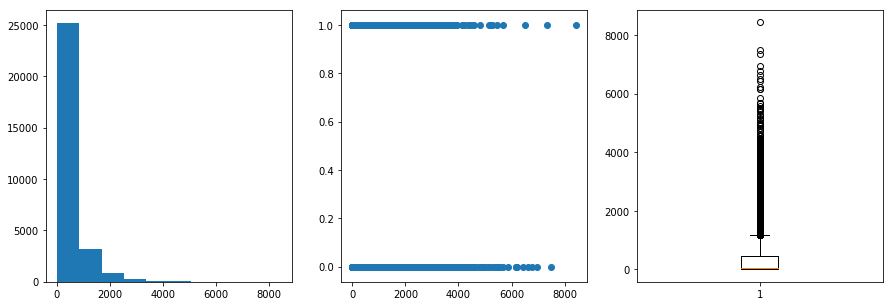

##################################################
std_og_mou_7
skewness is  3.2292017568726674
count    29591.000000
mean       365.498354
std        641.354020
min          0.000000
1%           0.000000
5%           0.000000
25%          0.180000
50%         44.460000
75%        502.415000
90%       1158.640000
95%       1618.035000
99%       2863.310000
max      10936.730000
Name: std_og_mou_7, dtype: float64


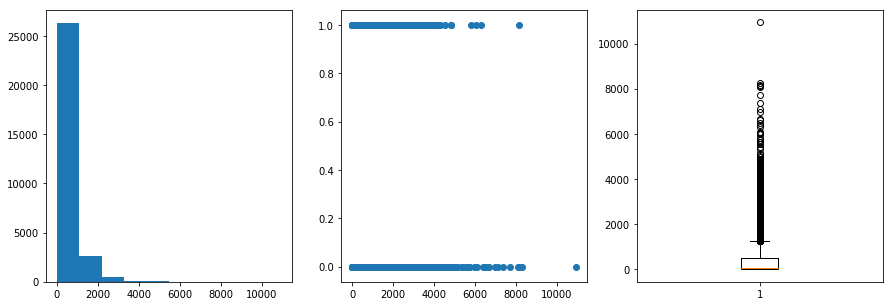

##################################################
std_og_mou_8
skewness is  4.161770440462328
count    29591.000000
mean       308.419024
std        609.057475
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%         25.990000
75%        359.575000
90%       1006.640000
95%       1478.955000
99%       2768.397000
max      13980.060000
Name: std_og_mou_8, dtype: float64


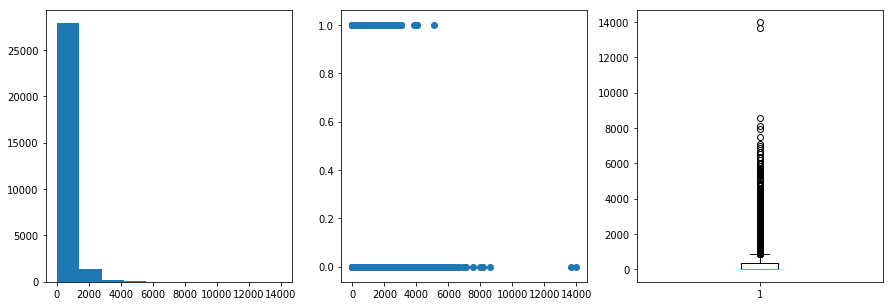

##################################################
isd_og_mou_6
skewness is  87.01554127872745
count    29591.000000
mean         2.171576
std         46.113349
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%          0.000000
90%          0.000000
95%          0.800000
99%         38.315000
max       5900.660000
Name: isd_og_mou_6, dtype: float64


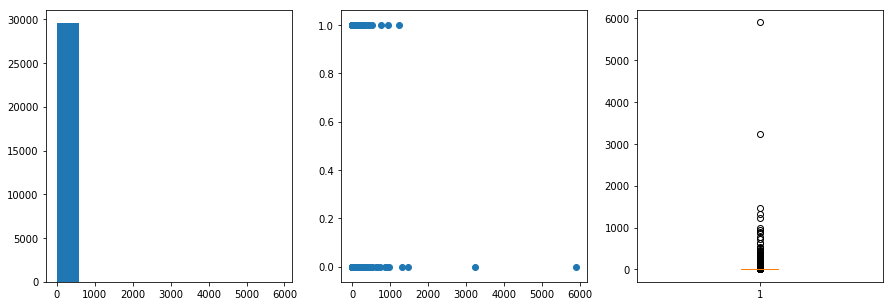

##################################################
isd_og_mou_7
skewness is  83.4108656195007
count    29591.000000
mean         2.120517
std         45.850431
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%          0.000000
90%          0.000000
95%          0.680000
99%         37.243000
max       5490.280000
Name: isd_og_mou_7, dtype: float64


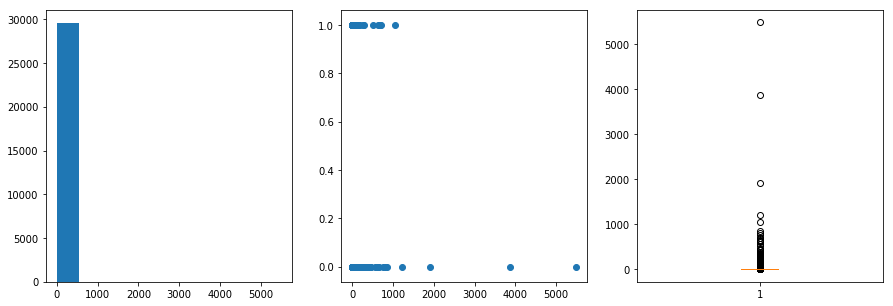

##################################################
isd_og_mou_8
skewness is  88.96235164582487
count    29591.000000
mean         1.967664
std         45.015838
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%          0.000000
90%          0.000000
95%          0.360000
99%         28.993000
max       5681.540000
Name: isd_og_mou_8, dtype: float64


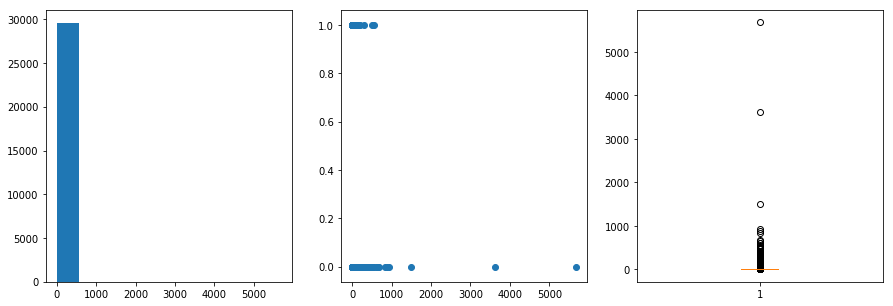

##################################################
spl_og_mou_6
skewness is  15.41538540644093
count    29591.000000
mean         5.831584
std         17.617760
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.230000
75%          5.230000
90%         15.960000
95%         26.635000
99%         68.459000
max       1023.210000
Name: spl_og_mou_6, dtype: float64


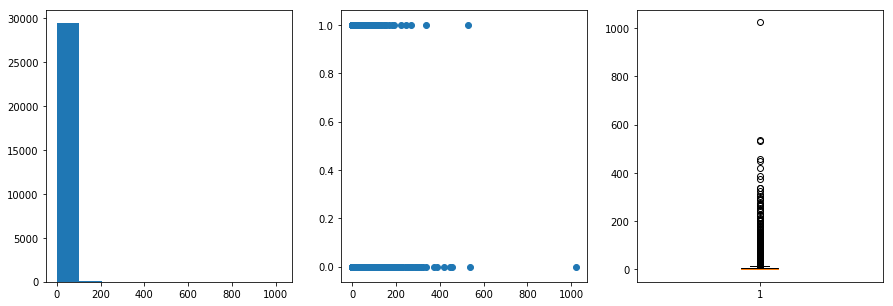

##################################################
spl_og_mou_7
skewness is  19.450959231386403
count    29591.000000
mean         7.133096
std         21.861904
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.730000
75%          6.980000
90%         19.330000
95%         31.100000
99%         76.031000
max       1265.790000
Name: spl_og_mou_7, dtype: float64


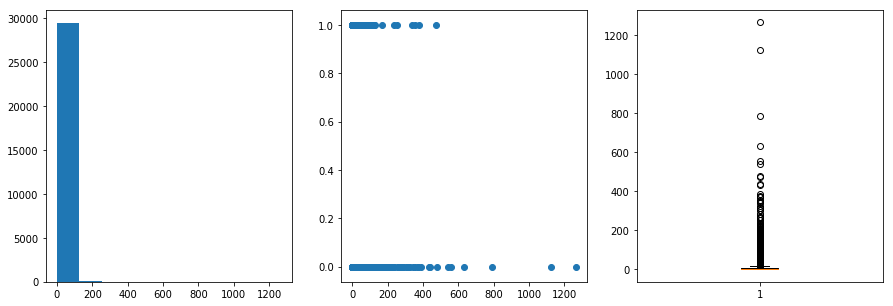

##################################################
spl_og_mou_8
skewness is  14.430071725051816
count    29591.000000
mean         6.584432
std         20.380345
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.450000
75%          6.190000
90%         17.630000
95%         29.335000
99%         71.017000
max        954.510000
Name: spl_og_mou_8, dtype: float64


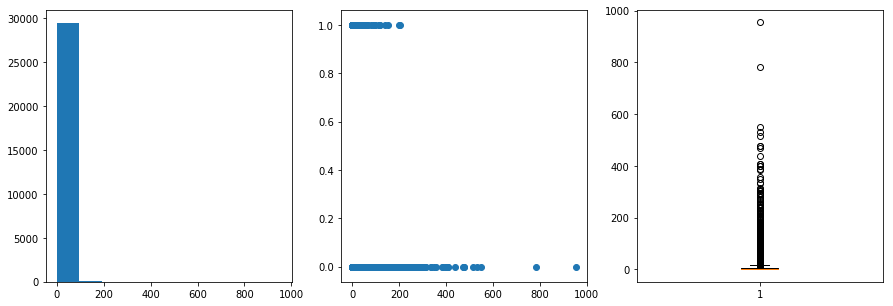

##################################################
og_others_6
skewness is  109.67197742143895
count    29591.000000
mean         0.662864
std          4.131707
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%          0.000000
90%          2.060000
95%          3.890000
99%          8.890000
max        609.810000
Name: og_others_6, dtype: float64


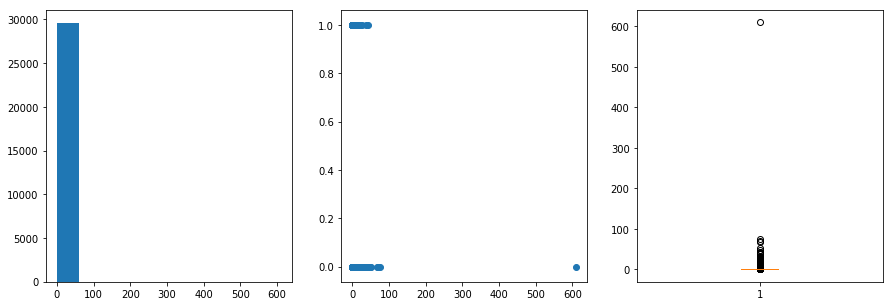

##################################################
og_others_7
skewness is  111.14232654030765
count    29591.000000
mean         0.043360
std          2.695227
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%          0.000000
90%          0.000000
95%          0.000000
99%          0.000000
max        370.130000
Name: og_others_7, dtype: float64


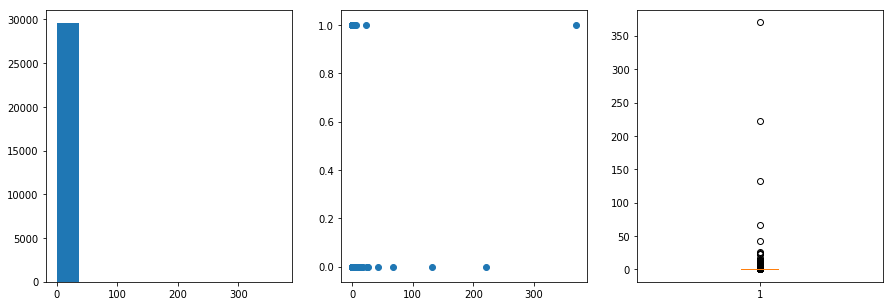

##################################################
og_others_8
skewness is  99.4918776292714
count    29591.000000
mean         0.058400
std          3.338007
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%          0.000000
90%          0.000000
95%          0.000000
99%          0.000000
max        394.930000
Name: og_others_8, dtype: float64


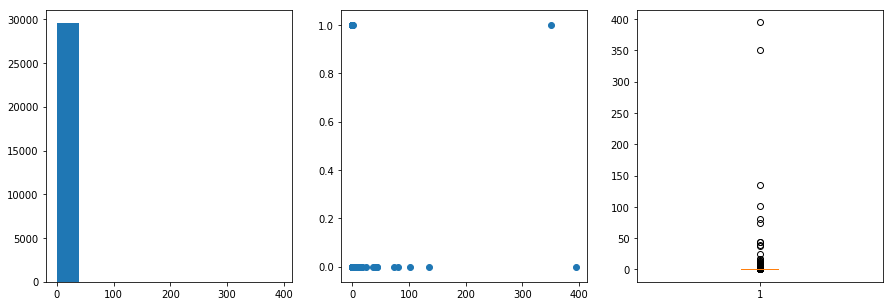

##################################################
total_og_mou_6
skewness is  2.5083374787880497
count    29591.000000
mean       611.389324
std        690.382458
min          0.000000
1%           0.000000
5%           0.000000
25%        117.850000
50%        412.190000
75%        862.285000
90%       1449.980000
95%       1915.510000
99%       3186.139000
max      10674.030000
Name: total_og_mou_6, dtype: float64


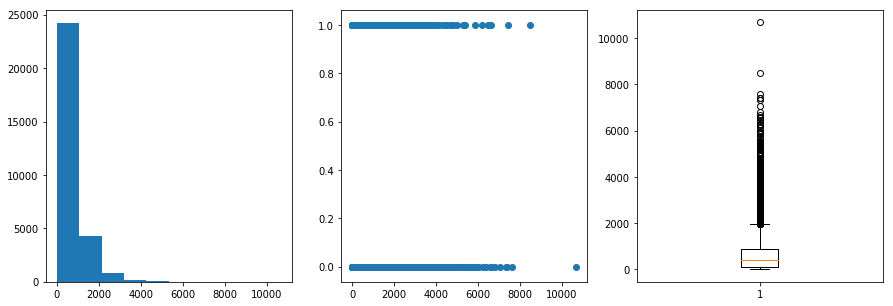

##################################################
total_og_mou_7
skewness is  2.603486195364396
count    29591.000000
mean       631.023174
std        717.241579
min          0.000000
1%           0.000000
5%           0.000000
25%        118.220000
50%        428.760000
75%        896.275000
90%       1486.740000
95%       1953.785000
99%       3279.655000
max      11365.310000
Name: total_og_mou_7, dtype: float64


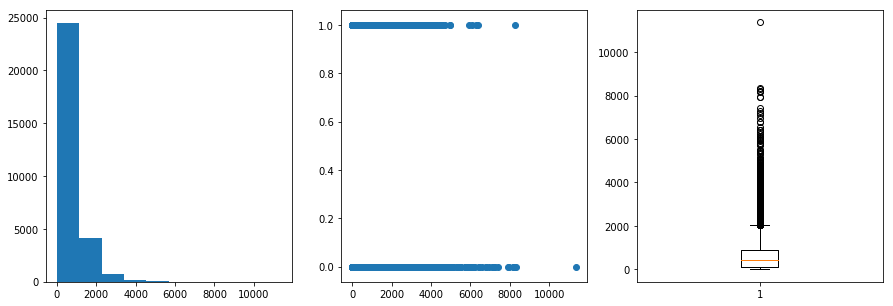

##################################################
total_og_mou_8
skewness is  3.2584058494092867
count    29591.000000
mean       553.765756
std        698.505605
min          0.000000
1%           0.000000
5%           0.000000
25%         74.355000
50%        336.440000
75%        778.160000
90%       1363.360000
95%       1859.085000
99%       3216.549000
max      14043.060000
Name: total_og_mou_8, dtype: float64


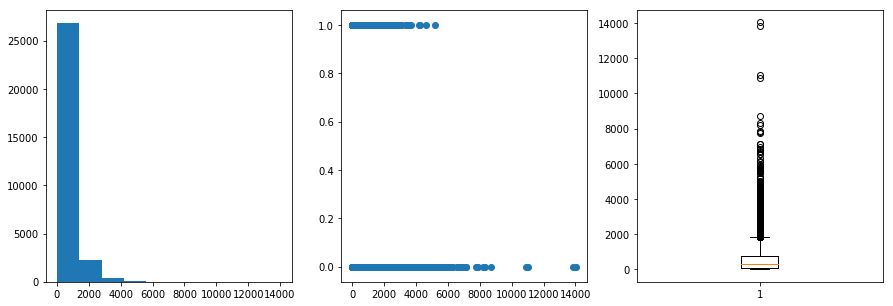

##################################################
loc_ic_t2t_mou_6
skewness is  11.857414201514372
count    29591.000000
mean        65.717772
std        164.300983
min          0.000000
1%           0.000000
5%           0.000000
25%          6.160000
50%         25.210000
75%         67.800000
90%        148.260000
95%        234.860000
99%        633.000000
max       6351.440000
Name: loc_ic_t2t_mou_6, dtype: float64


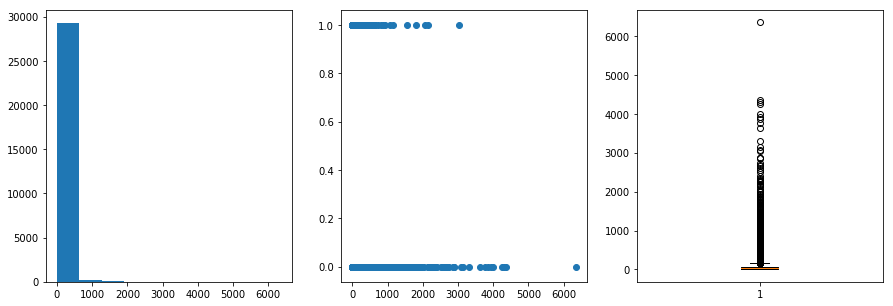

##################################################
loc_ic_t2t_mou_7
skewness is  11.018029762381426
count    29591.000000
mean        67.038635
std        168.300932
min          0.000000
1%           0.000000
5%           0.000000
25%          6.910000
50%         25.980000
75%         68.950000
90%        150.390000
95%        234.495000
99%        664.904000
max       5709.590000
Name: loc_ic_t2t_mou_7, dtype: float64


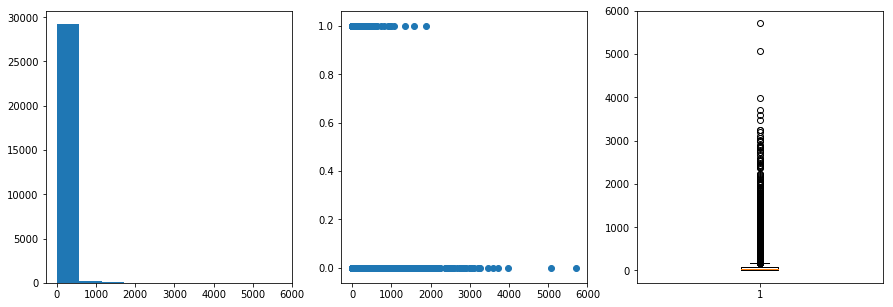

##################################################
loc_ic_t2t_mou_8
skewness is  10.483751188463748
count    29591.000000
mean        63.077726
std        159.826777
min          0.000000
1%           0.000000
5%           0.000000
25%          5.040000
50%         22.890000
75%         65.490000
90%        141.210000
95%        225.735000
99%        631.067000
max       4003.210000
Name: loc_ic_t2t_mou_8, dtype: float64


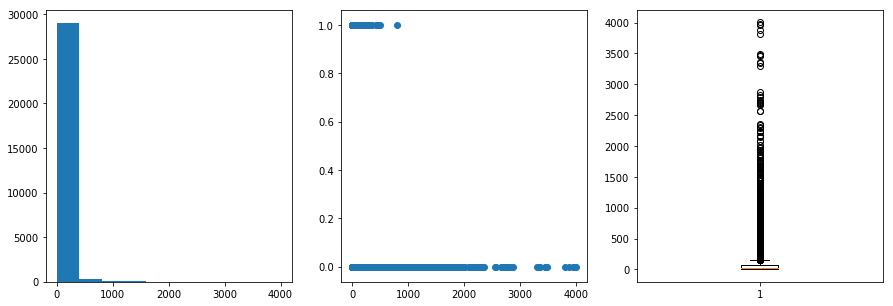

##################################################
loc_ic_t2m_mou_6
skewness is  4.94095860848528
count    29591.000000
mean       150.964848
std        218.786420
min          0.000000
1%           0.000000
5%           0.000000
25%         28.410000
50%         84.430000
75%        189.470000
90%        356.040000
95%        508.860000
99%       1013.949000
max       4693.860000
Name: loc_ic_t2m_mou_6, dtype: float64


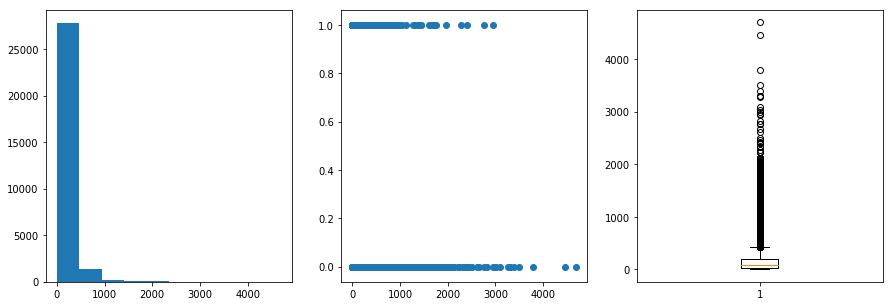

##################################################
loc_ic_t2m_mou_7
skewness is  5.06937864184924
count    29591.000000
mean       152.532347
std        219.100087
min          0.000000
1%           0.000000
5%           0.400000
25%         31.285000
50%         86.360000
75%        191.950000
90%        355.080000
95%        513.585000
99%        998.742000
max       4171.510000
Name: loc_ic_t2m_mou_7, dtype: float64


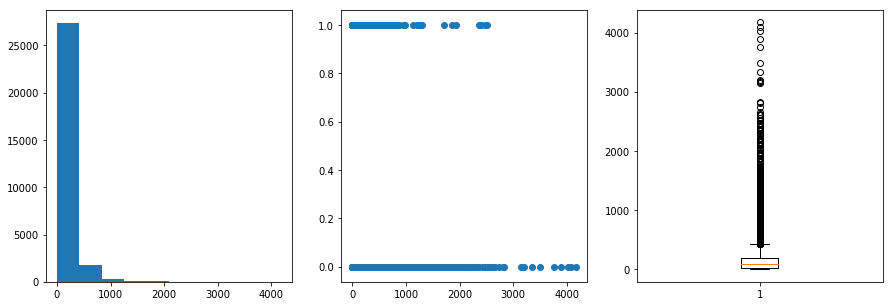

##################################################
loc_ic_t2m_mou_8
skewness is  4.934255017040392
count    29591.000000
mean       147.257938
std        215.756239
min          0.000000
1%           0.000000
5%           0.000000
25%         24.785000
50%         80.690000
75%        186.800000
90%        354.790000
95%        512.830000
99%        984.311000
max       4643.490000
Name: loc_ic_t2m_mou_8, dtype: float64


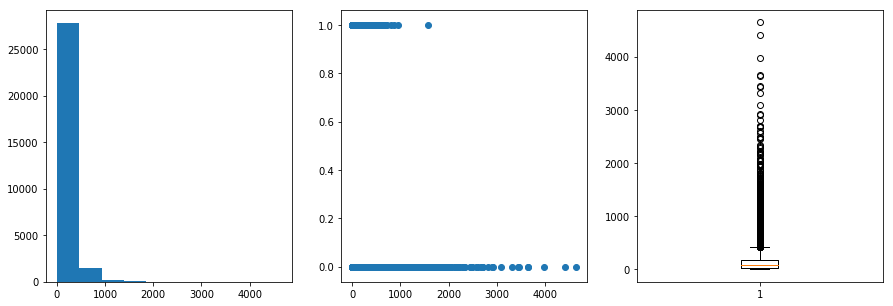

##################################################
loc_ic_t2f_mou_6
skewness is  10.608999362195068
count    29591.000000
mean        15.364982
std         45.945139
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          1.860000
75%         12.060000
90%         38.260000
95%         72.070000
99%        195.386000
max       1678.410000
Name: loc_ic_t2f_mou_6, dtype: float64


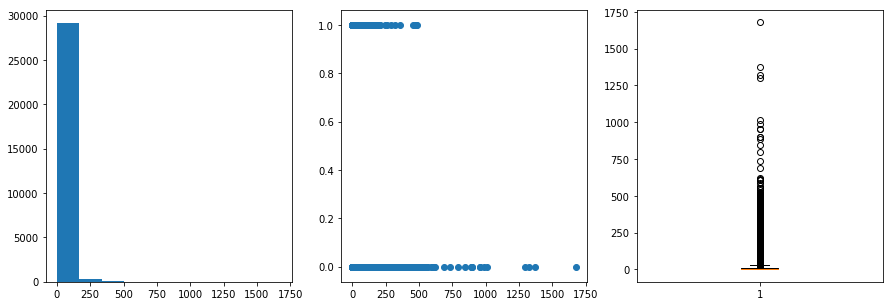

##################################################
loc_ic_t2f_mou_7
skewness is  11.210911802827997
count    29591.000000
mean        16.142087
std         49.414607
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          2.030000
75%         12.330000
90%         40.230000
95%         73.725000
99%        205.330000
max       1983.010000
Name: loc_ic_t2f_mou_7, dtype: float64


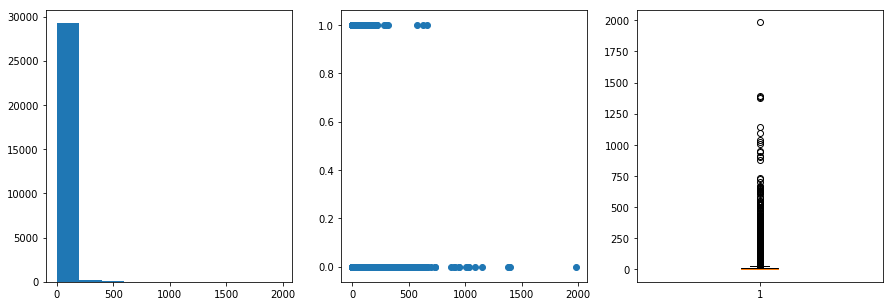

##################################################
loc_ic_t2f_mou_8
skewness is  10.889819295964182
count    29591.000000
mean        14.502485
std         43.440832
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          1.710000
75%         11.280000
90%         36.940000
95%         66.220000
99%        184.568000
max       1588.530000
Name: loc_ic_t2f_mou_8, dtype: float64


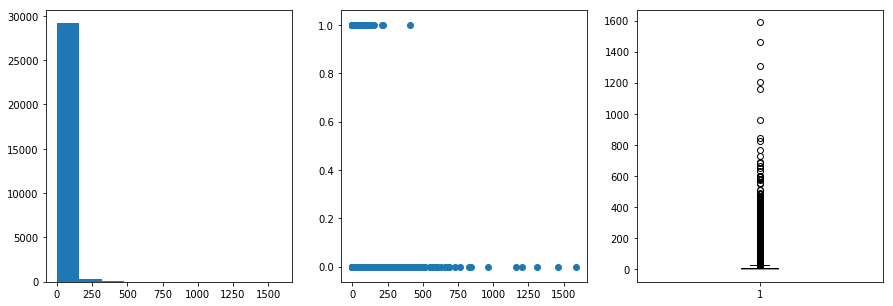

##################################################
loc_ic_mou_6
skewness is  4.525550987143526
count    29591.000000
mean       232.057254
std        315.101743
min          0.000000
1%           0.000000
5%           0.660000
25%         48.390000
50%        135.240000
75%        298.510000
90%        545.410000
95%        761.605000
99%       1478.645000
max       7454.630000
Name: loc_ic_mou_6, dtype: float64


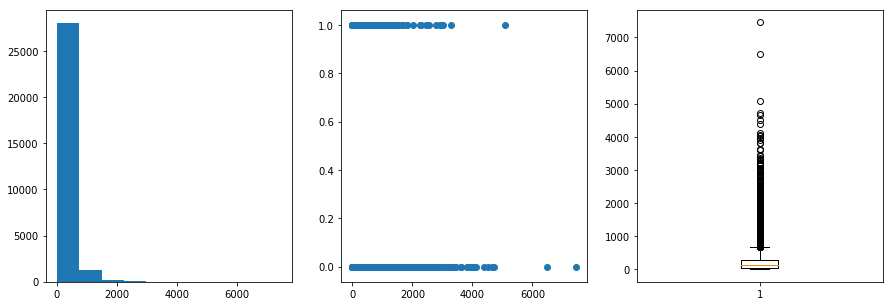

##################################################
loc_ic_mou_7
skewness is  4.375574141072117
count    29591.000000
mean       235.722806
std        317.308727
min          0.000000
1%           0.000000
5%           1.310000
25%         53.135000
50%        138.440000
75%        300.320000
90%        549.090000
95%        776.200000
99%       1511.825000
max       6466.740000
Name: loc_ic_mou_7, dtype: float64


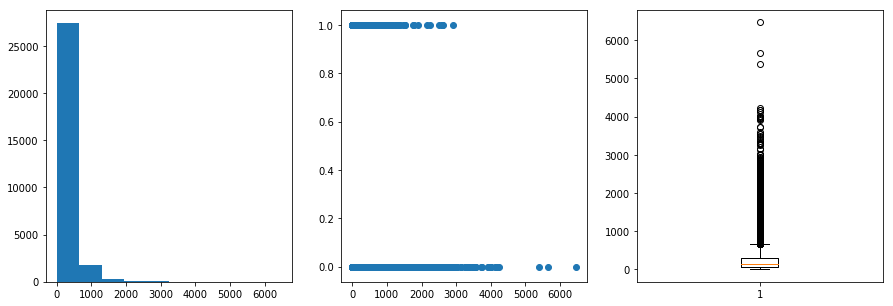

##################################################
loc_ic_mou_8
skewness is  4.16722013997681
count    29591.000000
mean       224.847524
std        309.631267
min          0.000000
1%           0.000000
5%           0.000000
25%         41.430000
50%        129.960000
75%        286.765000
90%        540.280000
95%        762.420000
99%       1458.937000
max       5388.740000
Name: loc_ic_mou_8, dtype: float64


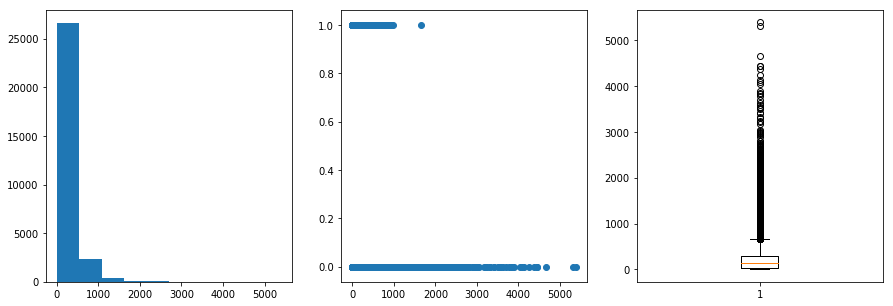

##################################################
std_ic_t2t_mou_6
skewness is  26.15314290325001
count    29591.000000
mean        14.983958
std         78.172757
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.400000
75%          8.260000
90%         31.310000
95%         60.695000
99%        209.887000
max       5459.560000
Name: std_ic_t2t_mou_6, dtype: float64


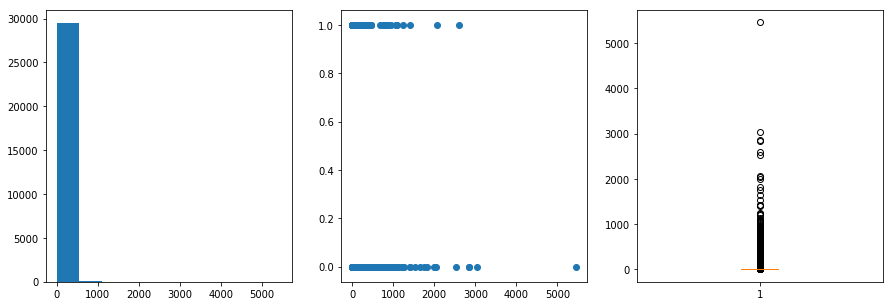

##################################################
std_ic_t2t_mou_7
skewness is  31.283564672887422
count    29591.000000
mean        15.521278
std         83.561372
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.460000
75%          8.685000
90%         32.460000
95%         62.330000
99%        225.160000
max       5800.930000
Name: std_ic_t2t_mou_7, dtype: float64


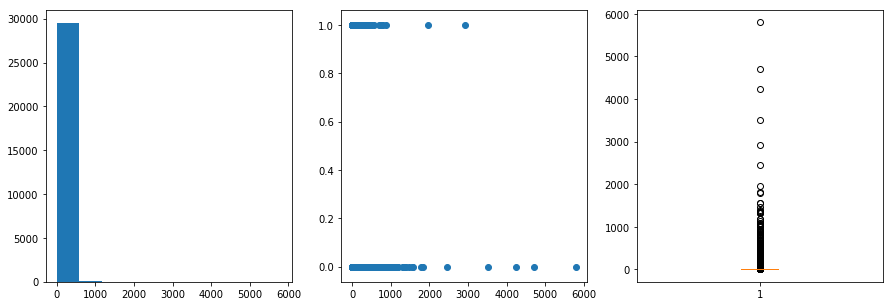

##################################################
std_ic_t2t_mou_8
skewness is  23.718881590496846
count    29591.000000
mean        14.001763
std         71.715815
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.130000
75%          7.130000
90%         28.490000
95%         56.610000
99%        214.605000
max       4309.290000
Name: std_ic_t2t_mou_8, dtype: float64


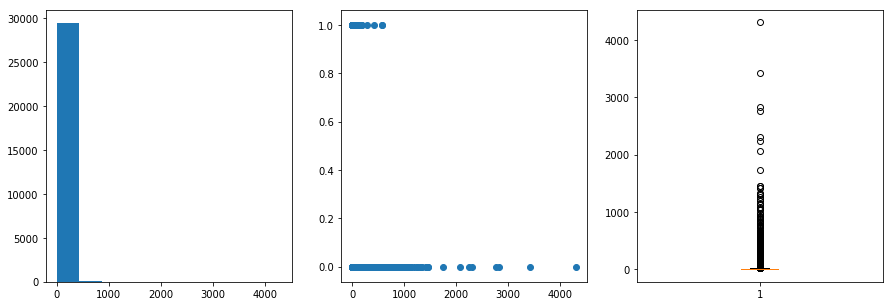

##################################################
std_ic_t2m_mou_6
skewness is  14.445355505999297
count    29591.000000
mean        29.347486
std         98.724068
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          5.060000
75%         23.740000
90%         67.740000
95%        121.125000
99%        367.688000
max       4630.230000
Name: std_ic_t2m_mou_6, dtype: float64


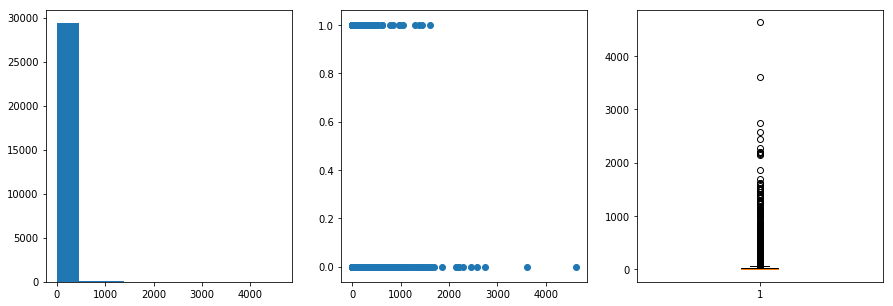

##################################################
std_ic_t2m_mou_7
skewness is  12.641177440262691
count    29591.000000
mean        31.027279
std        106.192130
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          5.260000
75%         25.130000
90%         69.880000
95%        123.030000
99%        390.619000
max       3470.380000
Name: std_ic_t2m_mou_7, dtype: float64


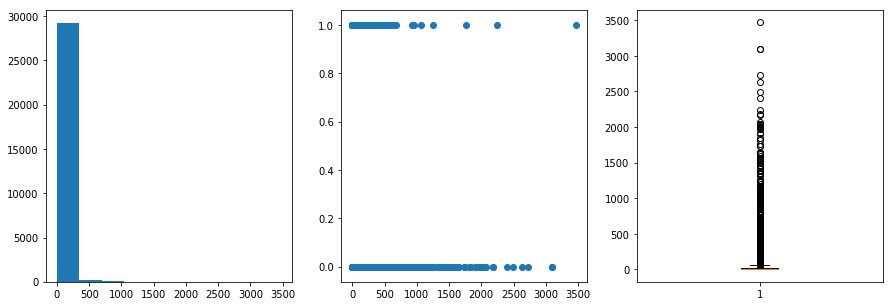

##################################################
std_ic_t2m_mou_8
skewness is  17.57880240220719
count    29591.000000
mean        28.079796
std        103.864814
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          3.780000
75%         21.980000
90%         63.340000
95%        114.610000
99%        356.954000
max       5645.860000
Name: std_ic_t2m_mou_8, dtype: float64


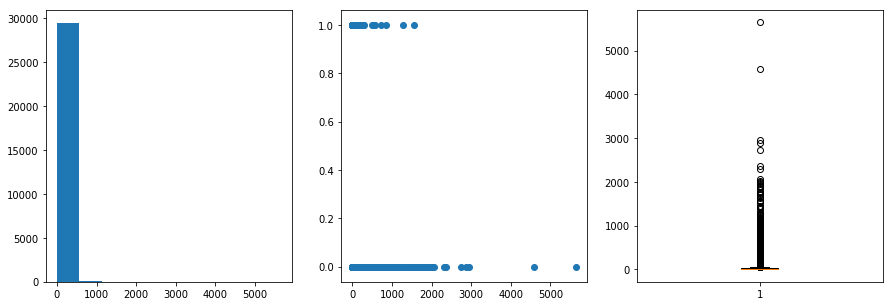

##################################################
std_ic_t2f_mou_6
skewness is  31.260742284844355
count    29591.000000
mean         2.714318
std         19.182517
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%          0.130000
90%          4.080000
95%         11.260000
99%         51.485000
max       1351.110000
Name: std_ic_t2f_mou_6, dtype: float64


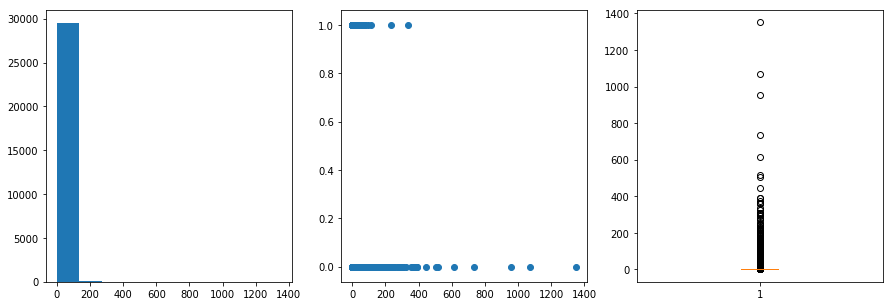

##################################################
std_ic_t2f_mou_7
skewness is  29.99017688133556
count    29591.000000
mean         2.819834
std         19.632393
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%          0.200000
90%          4.360000
95%         11.620000
99%         53.980000
max       1136.080000
Name: std_ic_t2f_mou_7, dtype: float64


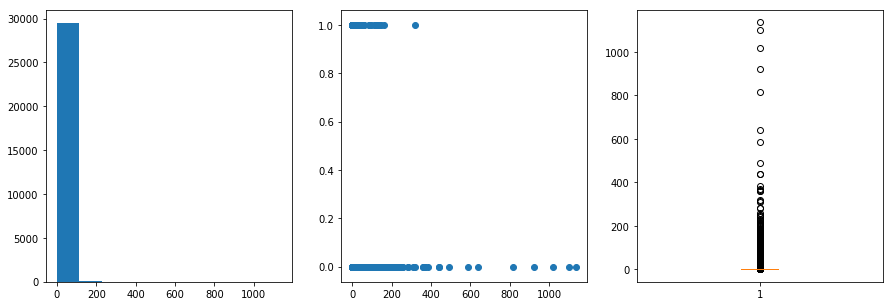

##################################################
std_ic_t2f_mou_8
skewness is  35.376618727265765
count    29591.000000
mean         2.587247
std         20.029574
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%          0.100000
90%          3.830000
95%         10.540000
99%         46.310000
max       1394.890000
Name: std_ic_t2f_mou_8, dtype: float64


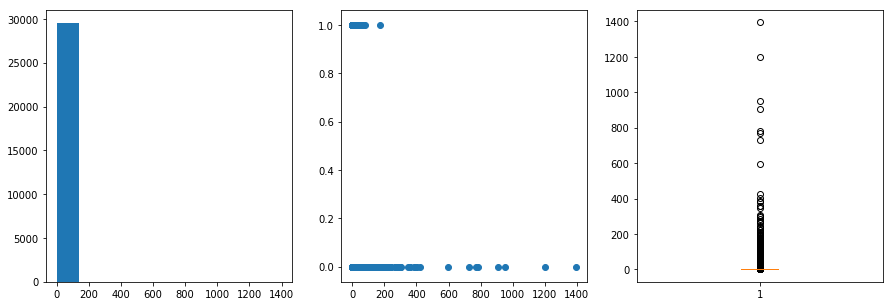

##################################################
std_ic_mou_6
skewness is  12.276266510466224
count    29591.000000
mean        47.049360
std        138.241059
min          0.000000
1%           0.000000
5%           0.000000
25%          1.060000
50%         11.490000
75%         41.710000
90%        107.680000
95%        186.525000
99%        555.854000
max       5459.630000
Name: std_ic_mou_6, dtype: float64


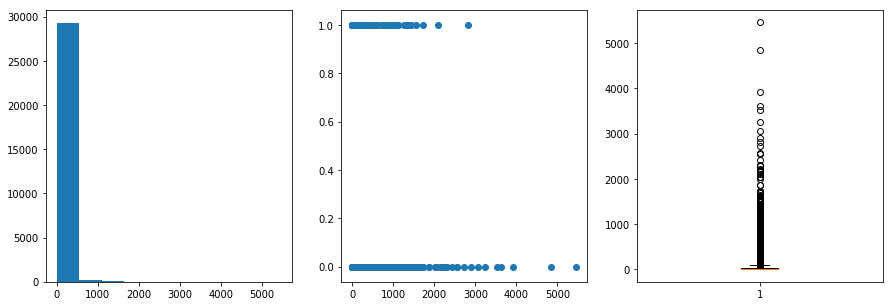

##################################################
std_ic_mou_7
skewness is  13.515461615600195
count    29591.000000
mean        49.372058
std        148.965580
min          0.000000
1%           0.000000
5%           0.000000
25%          1.080000
50%         12.230000
75%         44.110000
90%        110.580000
95%        195.025000
99%        592.957000
max       6745.760000
Name: std_ic_mou_7, dtype: float64


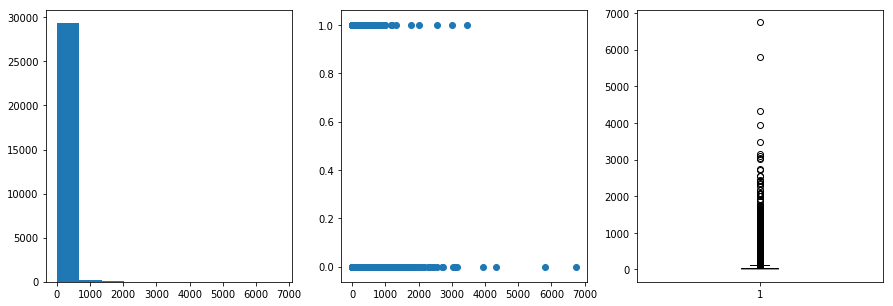

##################################################
std_ic_mou_8
skewness is  13.02683908157065
count    29591.000000
mean        44.672201
std        139.496745
min          0.000000
1%           0.000000
5%           0.000000
25%          0.430000
50%          9.440000
75%         38.735000
90%        100.440000
95%        182.070000
99%        540.720000
max       5957.140000
Name: std_ic_mou_8, dtype: float64


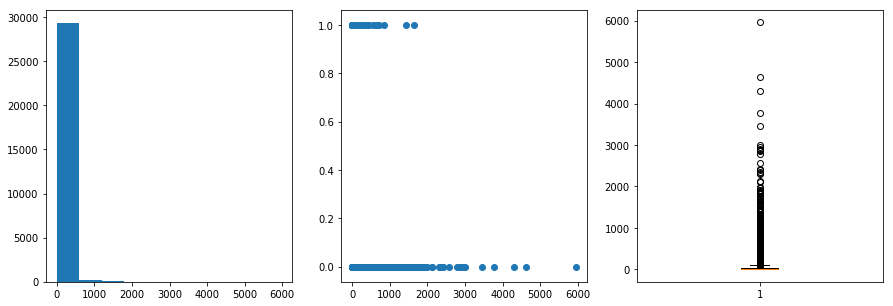

##################################################
total_ic_mou_6
skewness is  4.157930249935448
count    29591.000000
mean       291.089548
std        366.091565
min          0.000000
1%           0.000000
5%           1.495000
25%         73.550000
50%        184.590000
75%        373.490000
90%        666.410000
95%        924.540000
99%       1739.085000
max       7716.140000
Name: total_ic_mou_6, dtype: float64


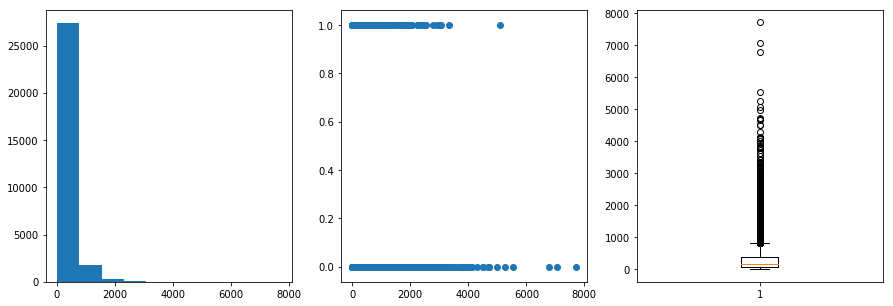

##################################################
total_ic_mou_7
skewness is  4.1832206131077
count    29591.000000
mean       298.544422
std        375.284543
min          0.000000
1%           0.000000
5%           2.780000
25%         79.780000
50%        188.760000
75%        379.435000
90%        678.010000
95%        932.765000
99%       1804.927000
max       7442.860000
Name: total_ic_mou_7, dtype: float64


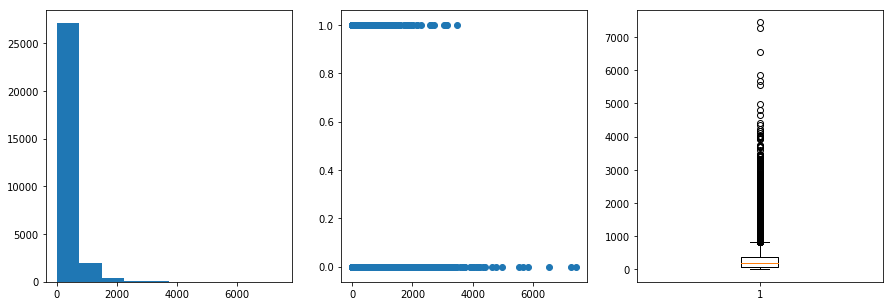

##################################################
total_ic_mou_8
skewness is  3.8343119439197624
count    29591.000000
mean       281.800680
std        362.571556
min          0.000000
1%           0.000000
5%           0.000000
25%         62.745000
50%        174.690000
75%        364.035000
90%        653.610000
95%        921.570000
99%       1737.118000
max       6066.630000
Name: total_ic_mou_8, dtype: float64


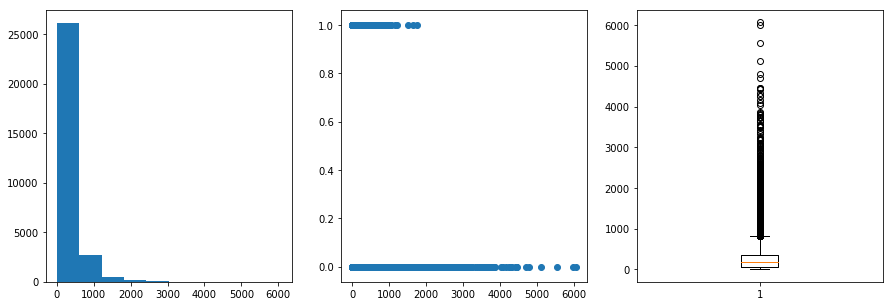

##################################################
spl_ic_mou_6
skewness is  41.54229098777388
count    29591.000000
mean         0.061039
std          0.188621
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%          0.000000
90%          0.250000
95%          0.410000
99%          0.640000
max         19.760000
Name: spl_ic_mou_6, dtype: float64


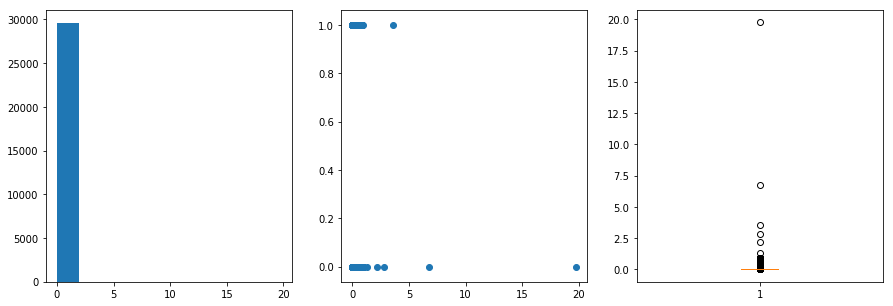

##################################################
spl_ic_mou_7
skewness is  72.45923038939225
count    29591.000000
mean         0.019649
std          0.182626
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%          0.000000
90%          0.000000
95%          0.110000
99%          0.490000
max         21.330000
Name: spl_ic_mou_7, dtype: float64


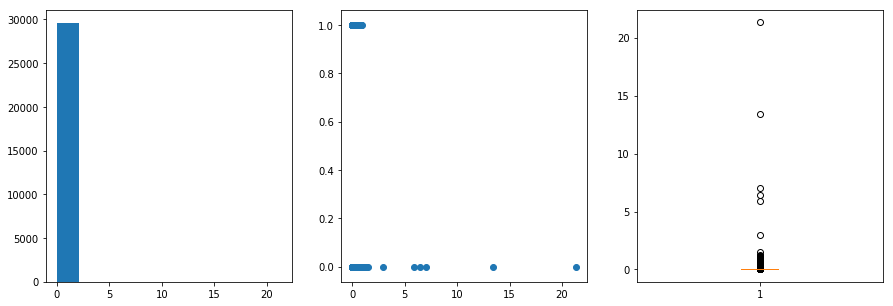

##################################################
spl_ic_mou_8
skewness is  10.09404557041689
count    29591.000000
mean         0.026569
std          0.110642
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%          0.000000
90%          0.000000
95%          0.250000
99%          0.540000
max          6.230000
Name: spl_ic_mou_8, dtype: float64


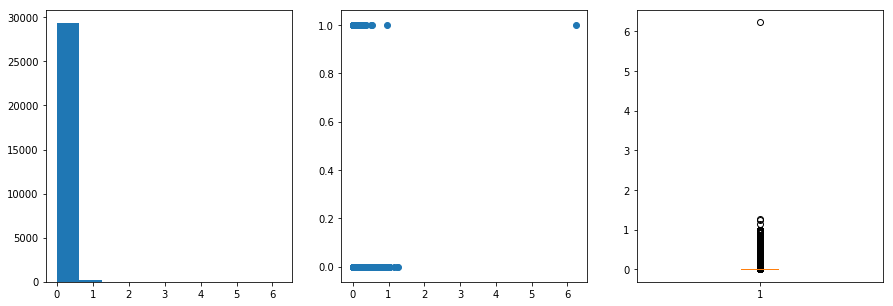

##################################################
isd_ic_mou_6
skewness is  34.69817650496373
count    29591.000000
mean        10.756097
std         76.949227
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%          0.000000
90%         13.360000
95%         41.810000
99%        223.558000
max       6789.410000
Name: isd_ic_mou_6, dtype: float64


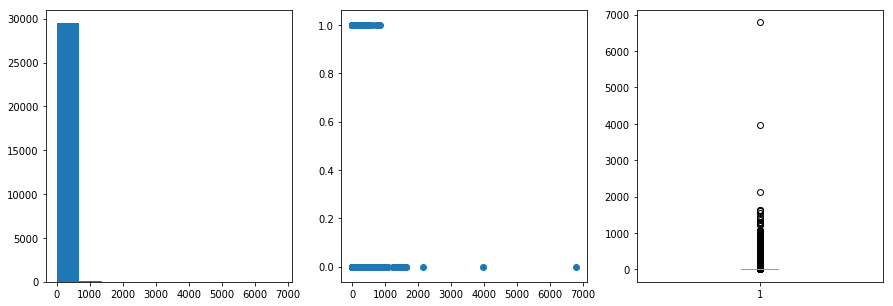

##################################################
isd_ic_mou_7
skewness is  24.406506558901516
count    29591.000000
mean        11.910115
std         80.523065
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%          0.000000
90%         15.880000
95%         46.730000
99%        235.379000
max       4747.910000
Name: isd_ic_mou_7, dtype: float64


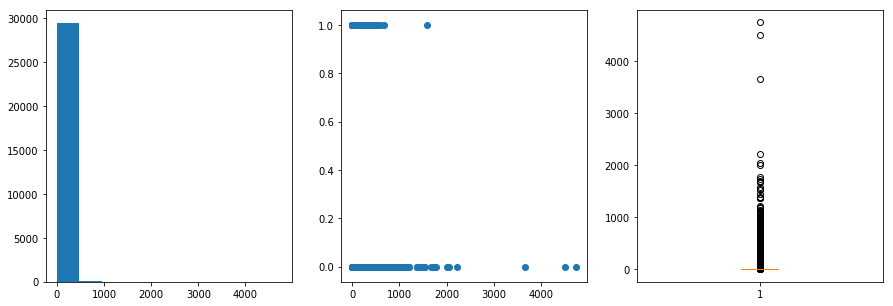

##################################################
isd_ic_mou_8
skewness is  17.418798086360823
count    29591.000000
mean        11.020605
std         70.582784
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%          0.000000
90%         13.660000
95%         42.560000
99%        238.240000
max       3432.880000
Name: isd_ic_mou_8, dtype: float64


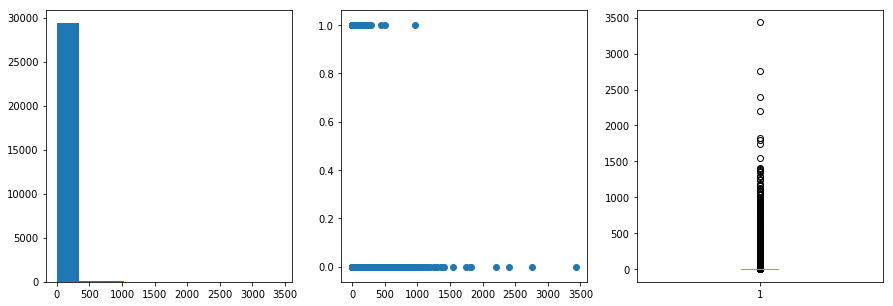

##################################################
ic_others_6
skewness is  58.47992968572424
count    29591.000000
mean         1.157676
std         14.068441
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%          0.050000
90%          1.080000
95%          3.420000
99%         19.933000
max       1344.140000
Name: ic_others_6, dtype: float64


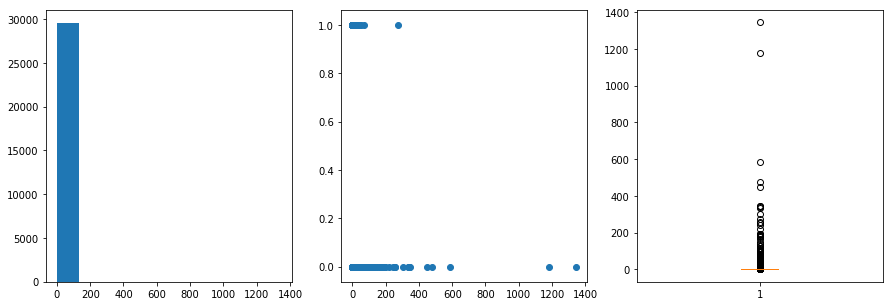

##################################################
ic_others_7
skewness is  44.1417667310119
count    29591.000000
mean         1.512217
std         16.102840
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%          0.000000
90%          1.480000
95%          4.630000
99%         25.801000
max       1495.940000
Name: ic_others_7, dtype: float64


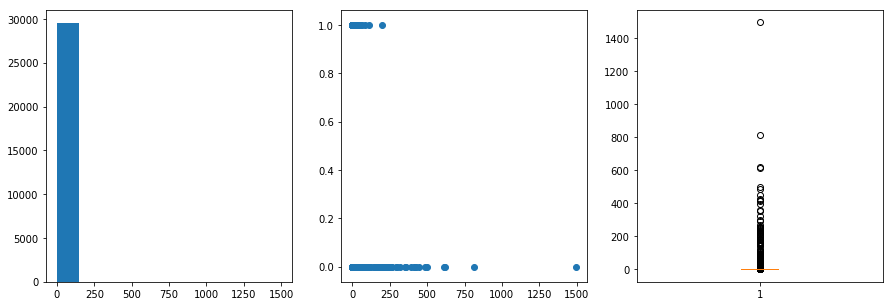

##################################################
ic_others_8
skewness is  46.94107969200921
count    29591.000000
mean         1.226436
std         12.846280
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%          0.000000
90%          1.150000
95%          3.780000
99%         21.501000
max       1209.860000
Name: ic_others_8, dtype: float64


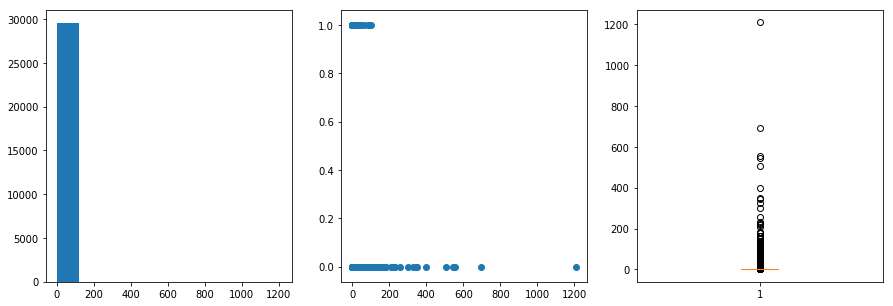

##################################################
total_rech_num_6
skewness is  3.7969742566203983
count    29591.000000
mean        11.876753
std          9.404606
min          0.000000
1%           1.000000
5%           3.000000
25%          6.000000
50%          9.000000
75%         15.000000
90%         23.000000
95%         29.000000
99%         47.000000
max        307.000000
Name: total_rech_num_6, dtype: float64


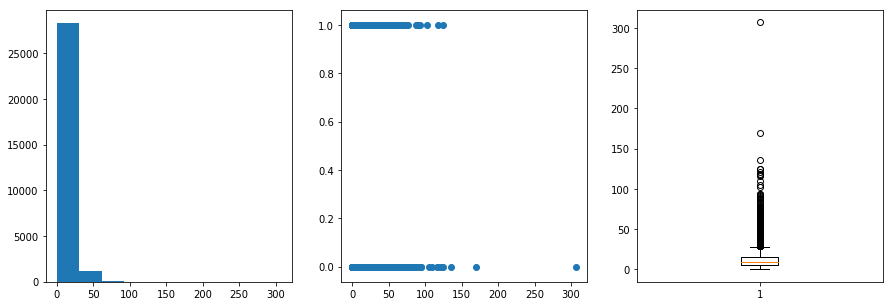

##################################################
total_rech_num_7
skewness is  2.7683776294680666
count    29591.000000
mean        11.770538
std          9.445015
min          0.000000
1%           1.000000
5%           3.000000
25%          6.000000
50%          9.000000
75%         15.000000
90%         23.000000
95%         29.000000
99%         48.000000
max        138.000000
Name: total_rech_num_7, dtype: float64


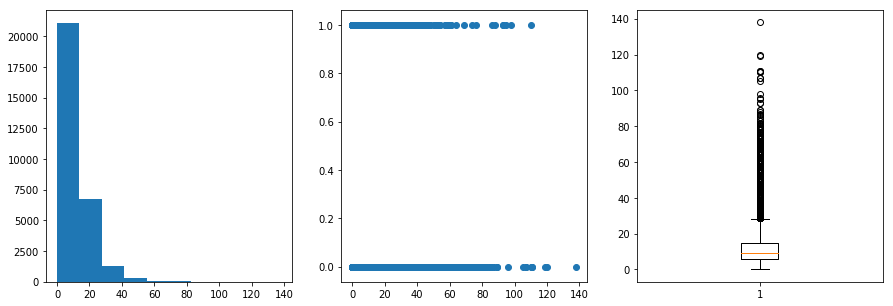

##################################################
total_rech_num_8
skewness is  2.935589623084166
count    29591.000000
mean        10.028759
std          9.285976
min          0.000000
1%           0.000000
5%           1.000000
25%          4.000000
50%          8.000000
75%         13.000000
90%         21.000000
95%         28.000000
99%         45.000000
max        196.000000
Name: total_rech_num_8, dtype: float64


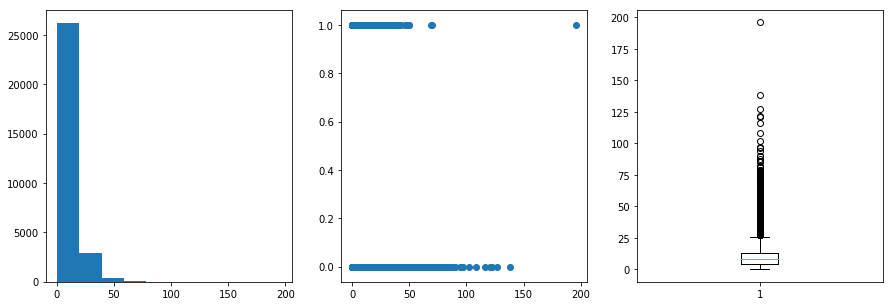

##################################################
total_rech_amt_6
skewness is  13.232979339628313
count    29591.000000
mean       662.394850
std        560.877238
min          0.000000
1%           0.000000
5%         124.000000
25%        362.000000
50%        567.000000
75%        836.000000
90%       1184.000000
95%       1480.000000
99%       2374.200000
max      35190.000000
Name: total_rech_amt_6, dtype: float64


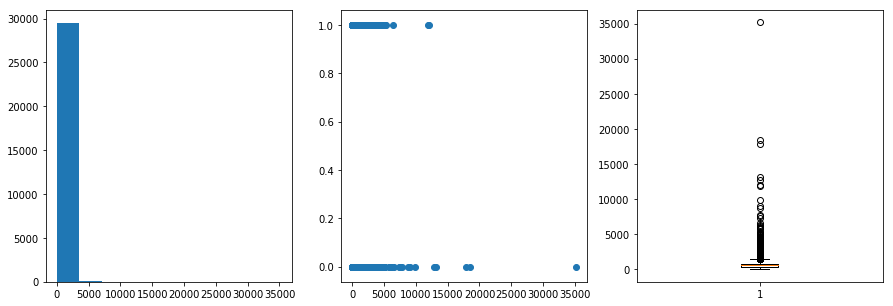

##################################################
total_rech_amt_7
skewness is  16.201712489081523
count    29591.000000
mean       663.449055
std        583.003236
min          0.000000
1%           0.000000
5%         114.000000
25%        355.000000
50%        565.000000
75%        834.500000
90%       1196.000000
95%       1512.000000
99%       2427.300000
max      40335.000000
Name: total_rech_amt_7, dtype: float64


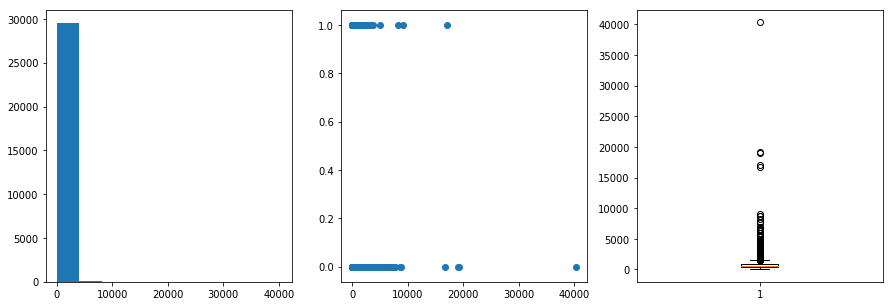

##################################################
total_rech_amt_8
skewness is  18.074055165473464
count    29591.000000
mean       587.912102
std        610.765134
min          0.000000
1%           0.000000
5%           0.000000
25%        252.000000
50%        495.000000
75%        780.000000
90%       1152.000000
95%       1495.500000
99%       2341.100000
max      45320.000000
Name: total_rech_amt_8, dtype: float64


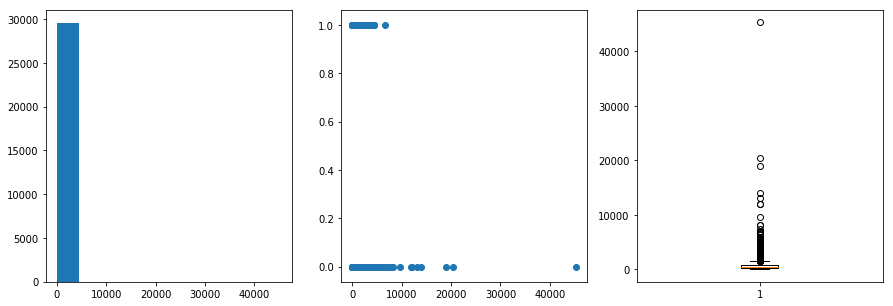

##################################################
max_rech_amt_6
skewness is  5.185473584032991
count    29591.000000
mean       168.817613
std        171.047071
min          0.000000
1%           0.000000
5%          25.000000
25%        110.000000
50%        120.000000
75%        200.000000
90%        274.000000
95%        459.000000
99%       1000.000000
max       3559.000000
Name: max_rech_amt_6, dtype: float64


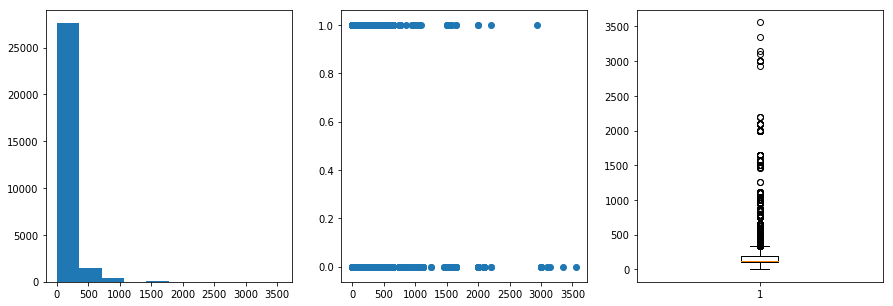

##################################################
max_rech_amt_7
skewness is  5.179868705309264
count    29591.000000
mean       171.819911
std        177.117967
min          0.000000
1%           0.000000
5%          25.000000
25%        110.000000
50%        128.000000
75%        200.000000
90%        274.000000
95%        459.000000
99%       1000.000000
max       3100.000000
Name: max_rech_amt_7, dtype: float64


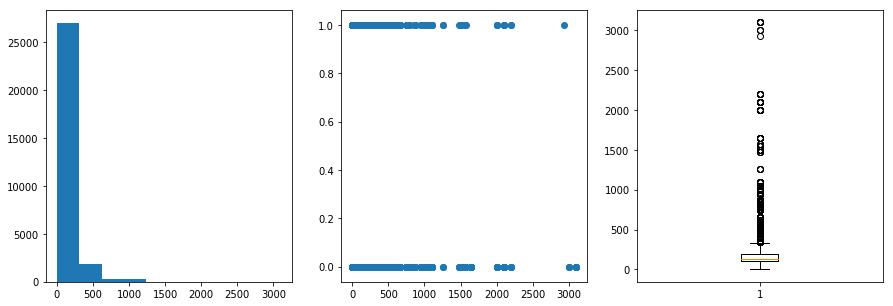

##################################################
max_rech_amt_8
skewness is  6.105373739105708
count    29591.000000
mean       160.719374
std        171.323529
min          0.000000
1%           0.000000
5%           0.000000
25%         50.000000
50%        130.000000
75%        198.000000
90%        252.000000
95%        449.000000
99%        951.000000
max       4449.000000
Name: max_rech_amt_8, dtype: float64


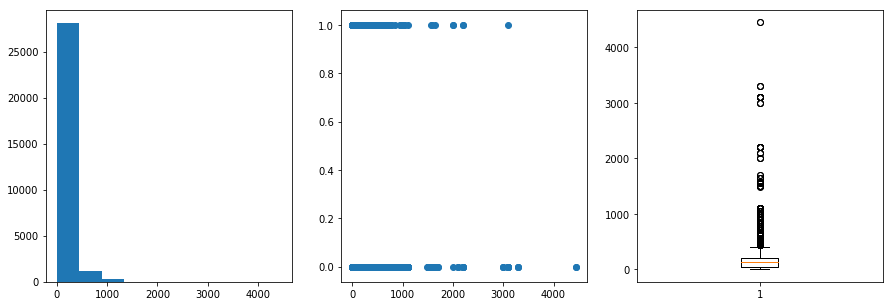

##################################################
date_of_last_rech_6
skewness is  -2.1346900741858854
count    29591.000000
mean        26.428205
std          4.802364
min          0.000000
1%           9.000000
5%          15.000000
25%         25.000000
50%         28.000000
75%         30.000000
90%         30.000000
95%         30.000000
99%         30.000000
max         30.000000
Name: date_of_last_rech_6, dtype: float64


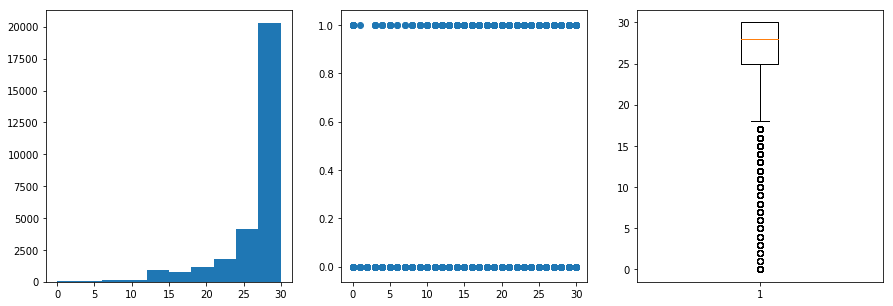

##################################################
date_of_last_rech_7
skewness is  -2.1094091452526906
count    29591.000000
mean        27.227299
std          4.776538
min          0.000000
1%          10.000000
5%          16.000000
25%         26.000000
50%         29.000000
75%         31.000000
90%         31.000000
95%         31.000000
99%         31.000000
max         31.000000
Name: date_of_last_rech_7, dtype: float64


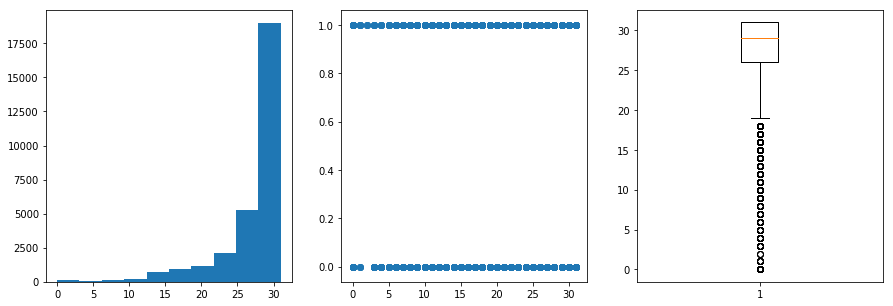

##################################################
date_of_last_rech_8
skewness is  -2.381526560624454
count    29591.000000
mean        26.239330
std          6.279604
min          0.000000
1%           0.000000
5%          12.000000
25%         25.000000
50%         28.000000
75%         30.000000
90%         31.000000
95%         31.000000
99%         31.000000
max         31.000000
Name: date_of_last_rech_8, dtype: float64


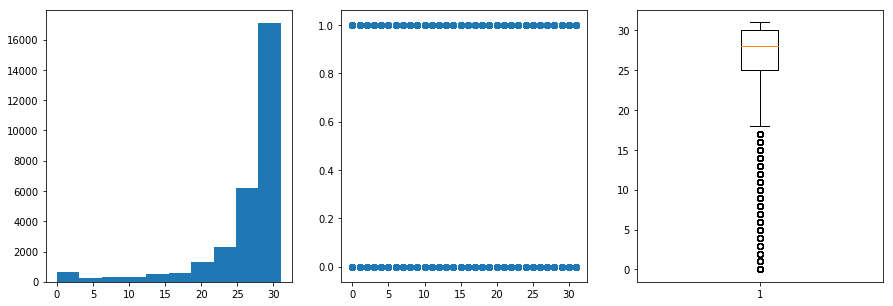

##################################################
last_day_rch_amt_6
skewness is  5.820075340977008
count    29591.000000
mean       100.318340
std        138.059479
min          0.000000
1%           0.000000
5%           0.000000
25%         25.000000
50%         67.000000
75%        120.000000
90%        250.000000
95%        252.000000
99%        655.000000
max       3350.000000
Name: last_day_rch_amt_6, dtype: float64


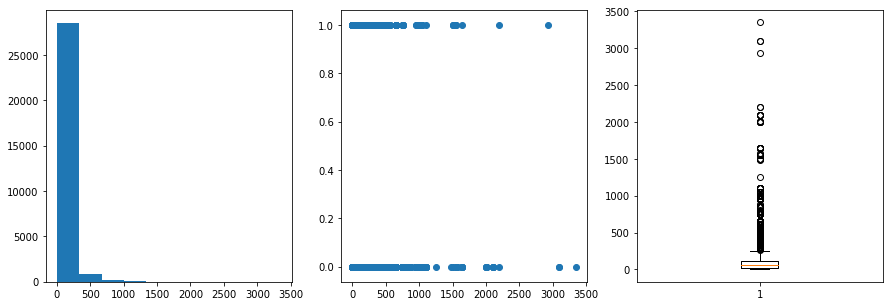

##################################################
last_day_rch_amt_7
skewness is  5.272195876535236
count    29591.000000
mean       100.101450
std        137.110343
min          0.000000
1%           0.000000
5%           0.000000
25%         20.000000
50%         50.000000
75%        130.000000
90%        250.000000
95%        252.000000
99%        655.000000
max       3100.000000
Name: last_day_rch_amt_7, dtype: float64


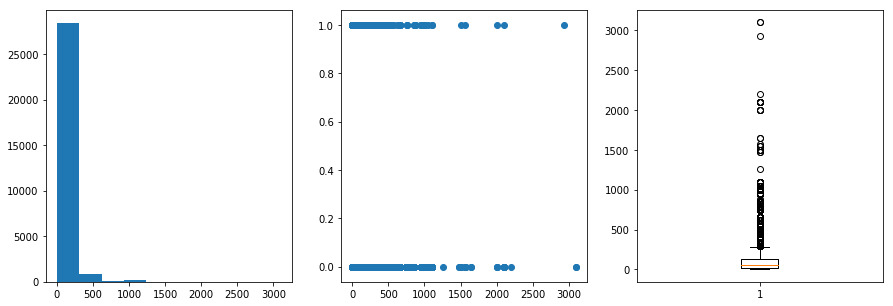

##################################################
last_day_rch_amt_8
skewness is  7.681915335609049
count    29591.000000
mean        92.533473
std        142.708095
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%         50.000000
75%        130.000000
90%        229.000000
95%        252.000000
99%        565.000000
max       4449.000000
Name: last_day_rch_amt_8, dtype: float64


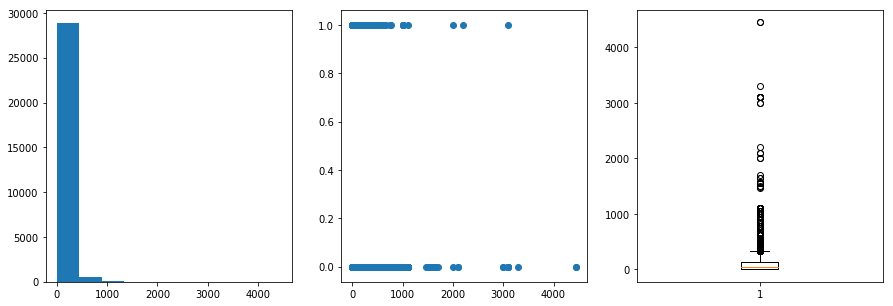

##################################################
date_of_last_rech_data_6
skewness is  0.35132347872107483
count    29591.000000
mean        11.333547
std         11.804716
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          7.000000
75%         24.000000
90%         28.000000
95%         30.000000
99%         30.000000
max         30.000000
Name: date_of_last_rech_data_6, dtype: float64


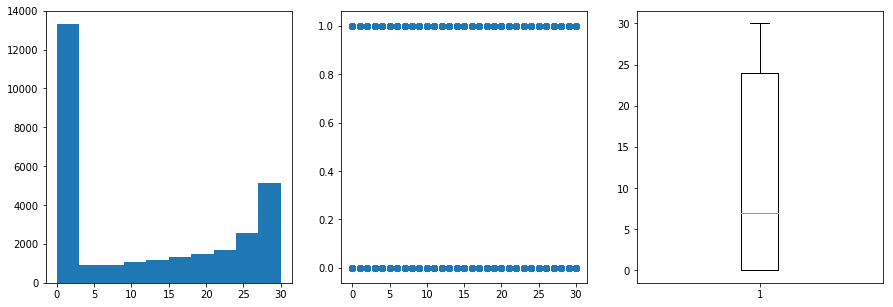

##################################################
date_of_last_rech_data_7
skewness is  0.29911142074354274
count    29591.000000
mean        12.059782
std         12.245428
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          9.000000
75%         25.000000
90%         29.000000
95%         30.000000
99%         31.000000
max         31.000000
Name: date_of_last_rech_data_7, dtype: float64


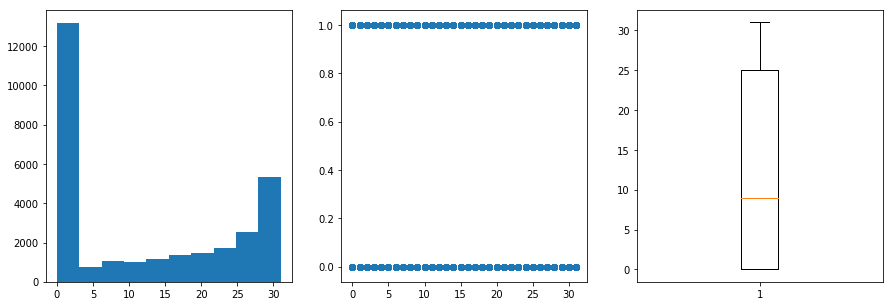

##################################################
date_of_last_rech_data_8
skewness is  0.47157049359699194
count    29591.000000
mean        10.889223
std         11.955175
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          5.000000
75%         23.000000
90%         29.000000
95%         30.000000
99%         31.000000
max         31.000000
Name: date_of_last_rech_data_8, dtype: float64


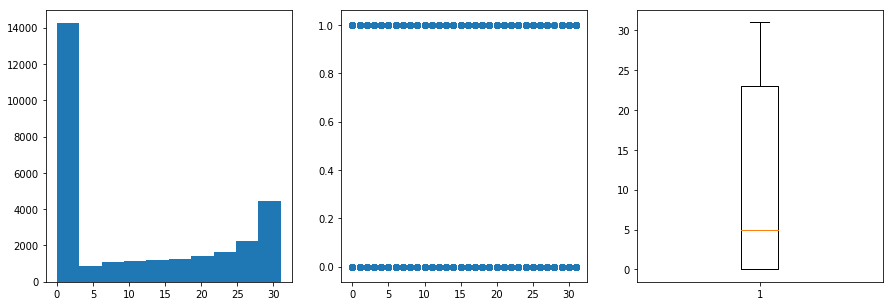

##################################################
max_rech_data_6
skewness is  2.7998991115351375
count    29591.000000
mean        78.460005
std        112.804345
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%         25.000000
75%        154.000000
90%        252.000000
95%        252.000000
99%        455.000000
max       1555.000000
Name: max_rech_data_6, dtype: float64


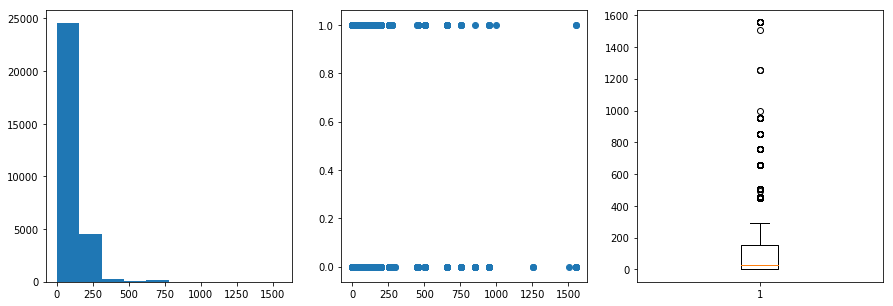

##################################################
max_rech_data_7
skewness is  2.851939379617061
count    29591.000000
mean        80.342334
std        114.488320
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%         25.000000
75%        154.000000
90%        252.000000
95%        252.000000
99%        455.000000
max       1555.000000
Name: max_rech_data_7, dtype: float64


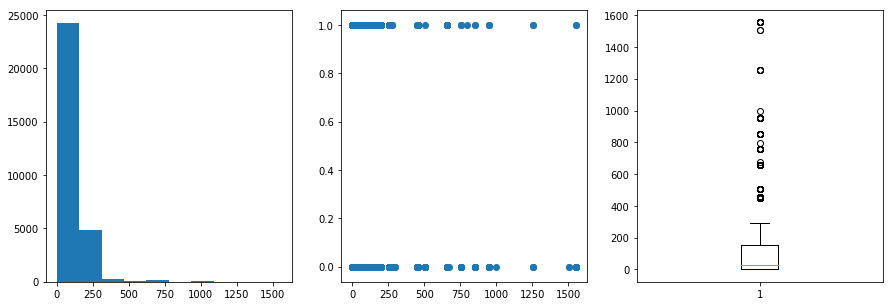

##################################################
max_rech_data_8
skewness is  2.790073519629462
count    29591.000000
mean        73.091210
std        110.924665
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%         23.000000
75%        154.000000
90%        252.000000
95%        252.000000
99%        455.000000
max       1555.000000
Name: max_rech_data_8, dtype: float64


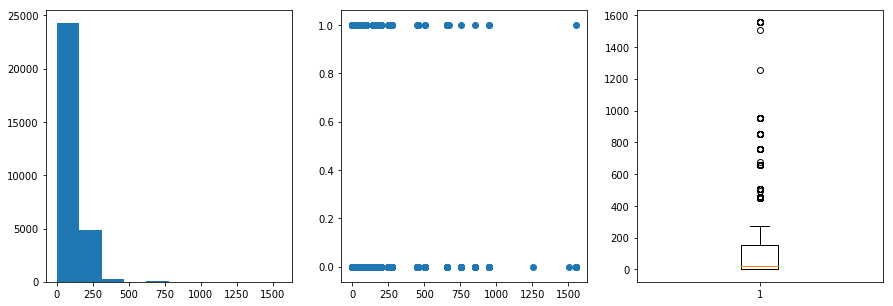

##################################################
count_rech_2g_6
skewness is  3.560230949972957
count    29591.000000
mean         1.247406
std          2.506536
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%          1.000000
90%          4.000000
95%          7.000000
99%         12.000000
max         42.000000
Name: count_rech_2g_6, dtype: float64


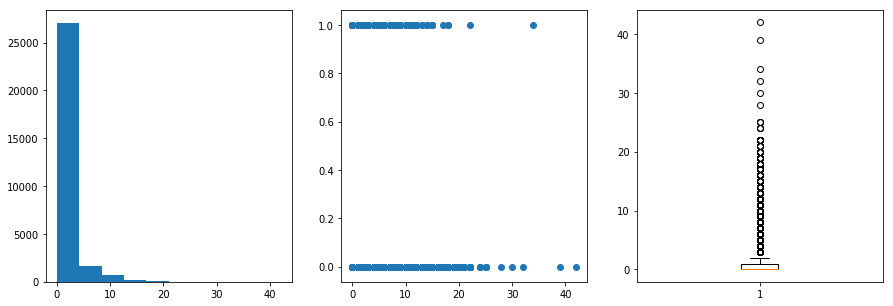

##################################################
count_rech_2g_7
skewness is  3.40073957054182
count    29591.000000
mean         1.407759
std          2.737138
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%          1.000000
90%          5.000000
95%          7.000000
99%         12.000000
max         48.000000
Name: count_rech_2g_7, dtype: float64


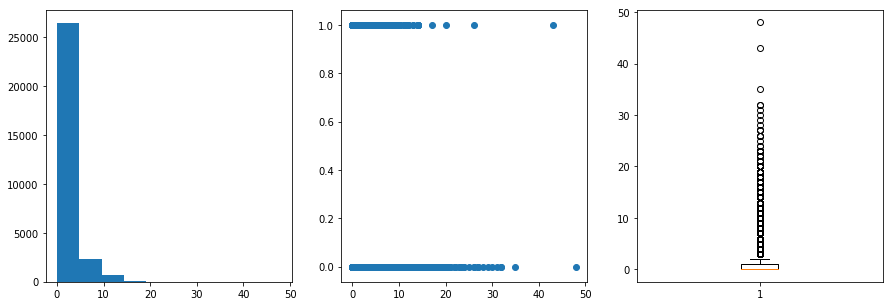

##################################################
count_rech_2g_8
skewness is  3.7583400544111987
count    29591.000000
mean         1.218850
std          2.548262
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%          1.000000
90%          4.000000
95%          6.000000
99%         12.000000
max         44.000000
Name: count_rech_2g_8, dtype: float64


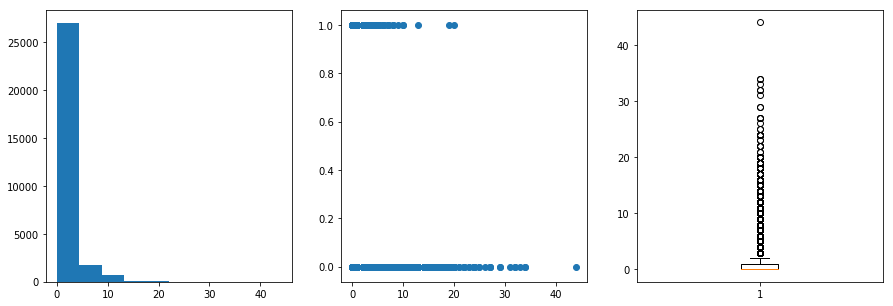

##################################################
count_rech_3g_6
skewness is  7.688246337954144
count    29591.000000
mean         0.429996
std          1.173014
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%          0.000000
90%          1.000000
95%          2.000000
99%          5.000000
max         29.000000
Name: count_rech_3g_6, dtype: float64


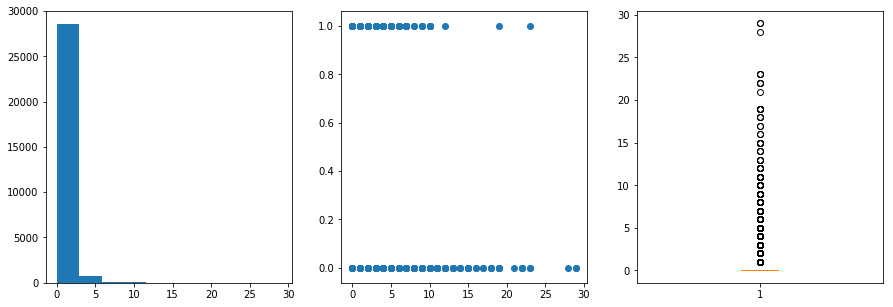

##################################################
count_rech_3g_7
skewness is  7.828762411672308
count    29591.000000
mean         0.460410
std          1.289982
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%          0.000000
90%          1.000000
95%          2.000000
99%          6.000000
max         35.000000
Name: count_rech_3g_7, dtype: float64


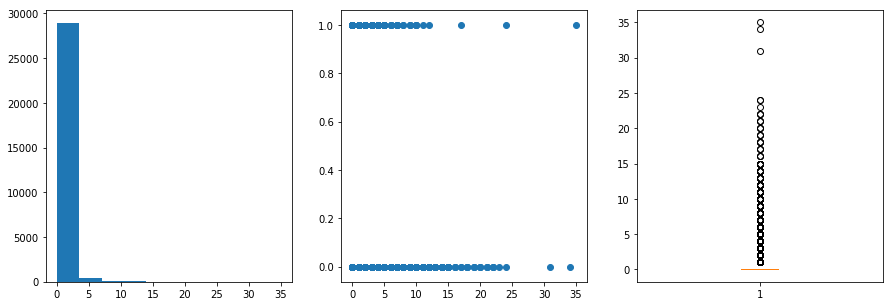

##################################################
count_rech_3g_8
skewness is  9.681876616024791
count    29591.000000
mean         0.417357
std          1.283446
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%          0.000000
90%          1.000000
95%          2.000000
99%          5.000000
max         45.000000
Name: count_rech_3g_8, dtype: float64


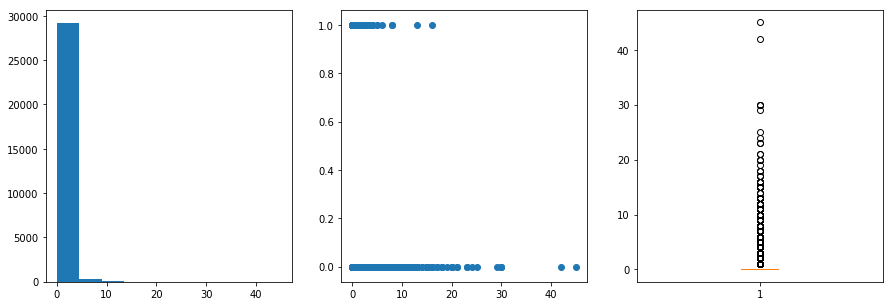

##################################################
vol_2g_mb_6
skewness is  6.368688300485684
count    29591.000000
mean       127.222019
std        331.192053
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.020000
75%         85.100000
90%        412.960000
95%        705.615000
99%       1549.742000
max      10285.900000
Name: vol_2g_mb_6, dtype: float64


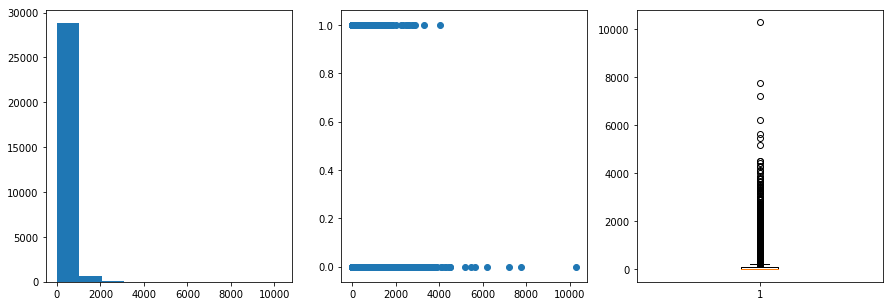

##################################################
vol_2g_mb_7
skewness is  5.8486949499415095
count    29591.000000
mean       126.025720
std        332.989801
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.100000
75%         79.920000
90%        403.270000
95%        693.775000
99%       1566.770000
max       7873.550000
Name: vol_2g_mb_7, dtype: float64


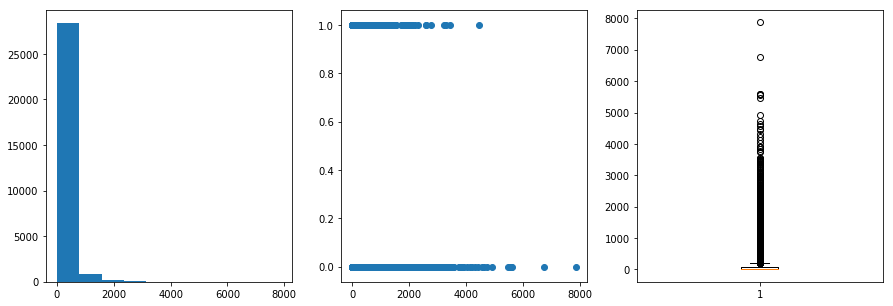

##################################################
vol_2g_mb_8
skewness is  7.715023668534692
count    29591.000000
mean       106.772790
std        314.566237
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%         53.090000
90%        322.450000
95%        616.605000
99%       1449.683000
max      11117.610000
Name: vol_2g_mb_8, dtype: float64


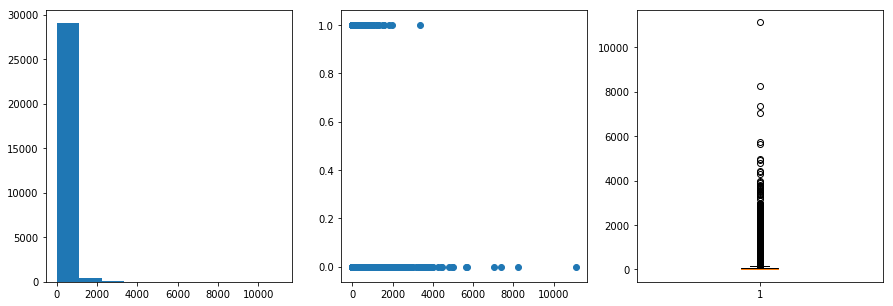

##################################################
vol_3g_mb_6
skewness is  10.781707665611659
count    29591.000000
mean       346.699412
std        917.890574
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%        365.095000
90%       1092.850000
95%       1720.870000
99%       3760.335000
max      45735.400000
Name: vol_3g_mb_6, dtype: float64


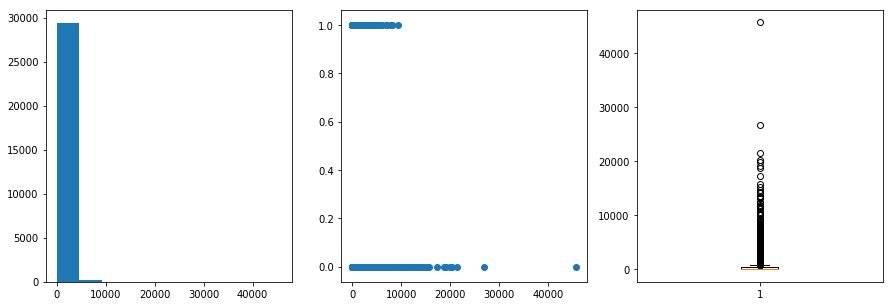

##################################################
vol_3g_mb_7
skewness is  7.5067341865981065
count    29591.000000
mean       373.279396
std        919.991837
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%        416.220000
90%       1179.950000
95%       1798.540000
99%       4068.049000
max      28144.120000
Name: vol_3g_mb_7, dtype: float64


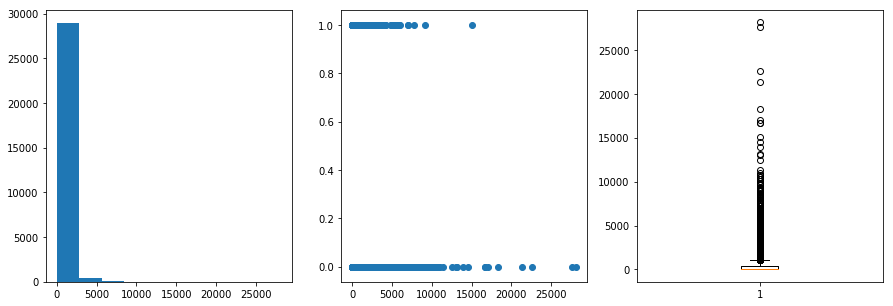

##################################################
vol_3g_mb_8
skewness is  8.78419771467664
count    29591.000000
mean       354.782810
std        923.674347
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%        365.325000
90%       1109.790000
95%       1743.875000
99%       3960.650000
max      30036.060000
Name: vol_3g_mb_8, dtype: float64


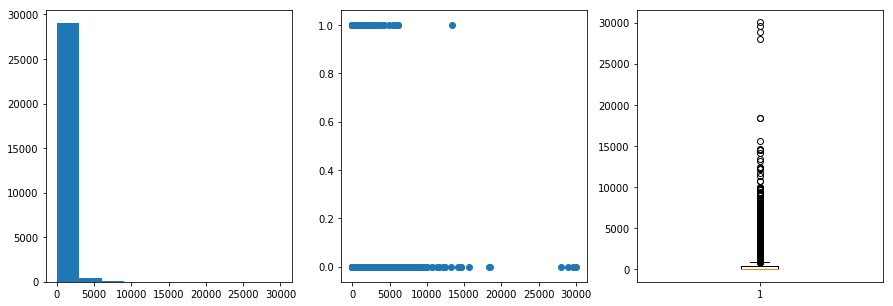

##################################################
arpu_3g_6
skewness is  6.807813260343959
count    29591.000000
mean        67.443130
std        179.907485
min        -30.280000
1%          -0.061000
5%           0.000000
25%          0.000000
50%          0.000000
75%         35.910000
90%        217.260000
95%        398.580000
99%        811.940000
max       6362.280000
Name: arpu_3g_6, dtype: float64


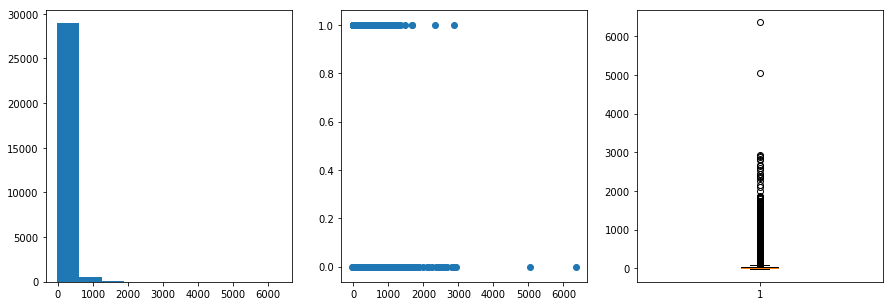

##################################################
arpu_3g_7
skewness is  5.91308222454604
count    29591.000000
mean        69.204350
std        184.009707
min        -26.040000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%         37.610000
90%        216.820000
95%        412.500000
99%        820.922000
max       4980.900000
Name: arpu_3g_7, dtype: float64


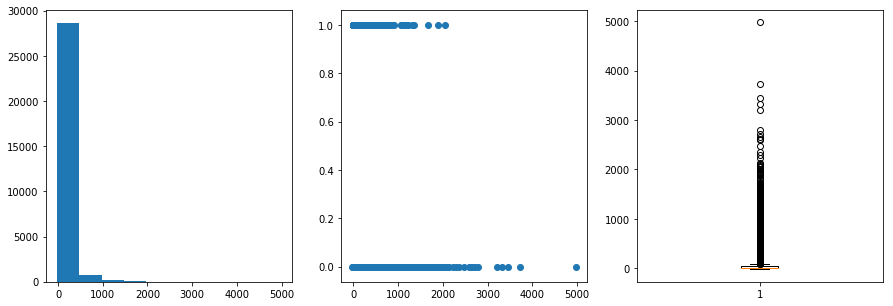

##################################################
arpu_3g_8
skewness is  5.465399972695786
count    29591.000000
mean        63.402098
std        170.984043
min        -24.490000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%         21.910000
90%        212.860000
95%        389.000000
99%        797.076000
max       3716.900000
Name: arpu_3g_8, dtype: float64


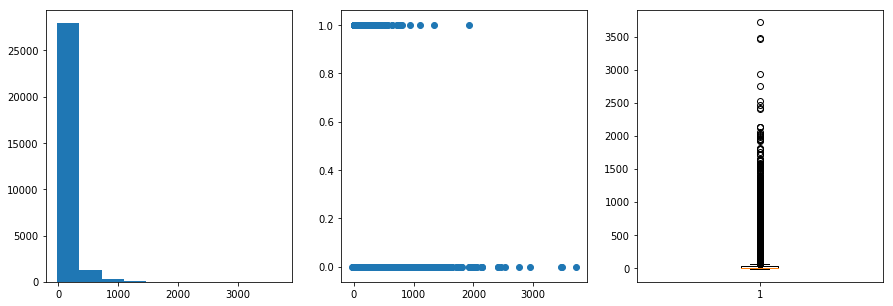

##################################################
arpu_2g_6
skewness is  7.527126885239079
count    29591.000000
mean        63.792143
std        161.584707
min        -15.320000
1%          -0.040000
5%           0.000000
25%          0.000000
50%          0.000000
75%         52.015000
90%        212.170000
95%        363.025000
99%        679.136000
max       6433.760000
Name: arpu_2g_6, dtype: float64


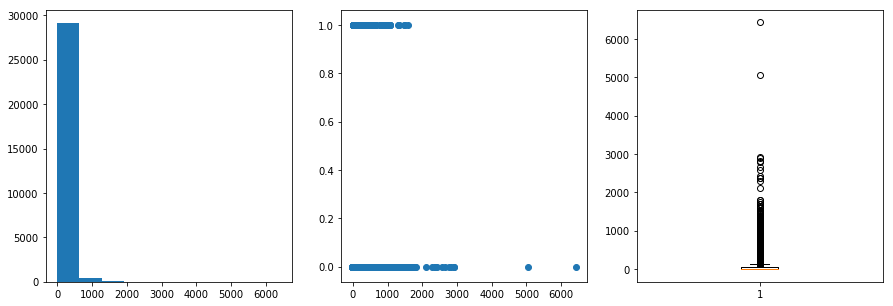

##################################################
arpu_2g_7
skewness is  6.108279927244205
count    29591.000000
mean        65.218178
std        166.031818
min        -15.480000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%         48.955000
90%        212.170000
95%        376.520000
99%        764.944000
max       4809.360000
Name: arpu_2g_7, dtype: float64


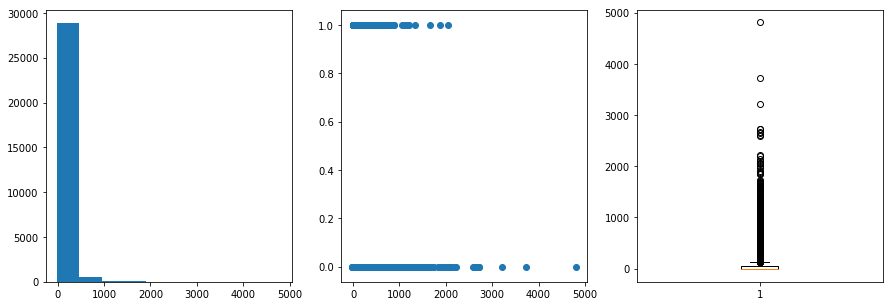

##################################################
arpu_2g_8
skewness is  5.407161685482511
count    29591.000000
mean        58.954241
std        153.197866
min        -24.430000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%         28.100000
90%        212.170000
95%        336.100000
99%        716.095000
max       3467.170000
Name: arpu_2g_8, dtype: float64


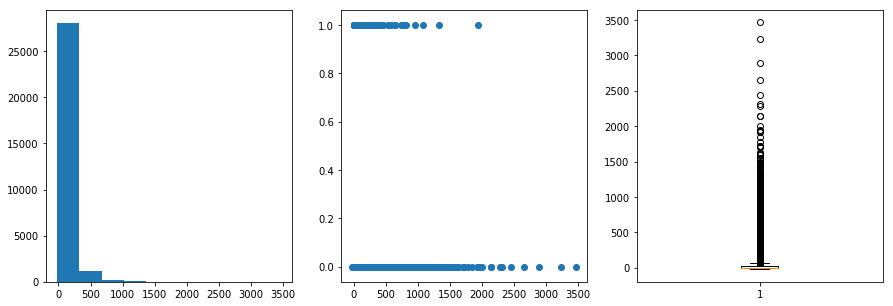

##################################################
night_pck_user_6
skewness is  8.393315680769303
count    29591.000000
mean         0.013619
std          0.115905
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%          0.000000
90%          0.000000
95%          0.000000
99%          1.000000
max          1.000000
Name: night_pck_user_6, dtype: float64


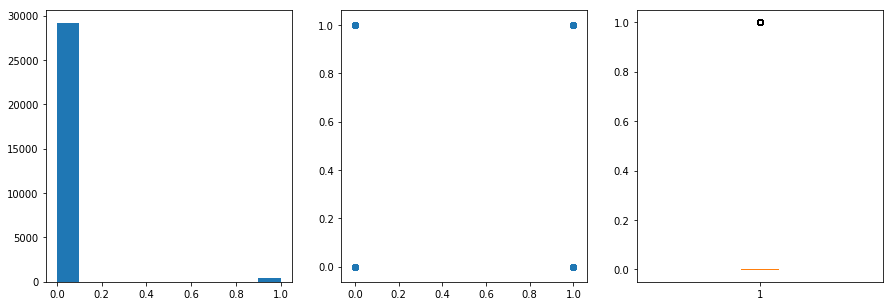

##################################################
night_pck_user_7
skewness is  8.725871925460467
count    29591.000000
mean         0.012639
std          0.111712
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%          0.000000
90%          0.000000
95%          0.000000
99%          1.000000
max          1.000000
Name: night_pck_user_7, dtype: float64


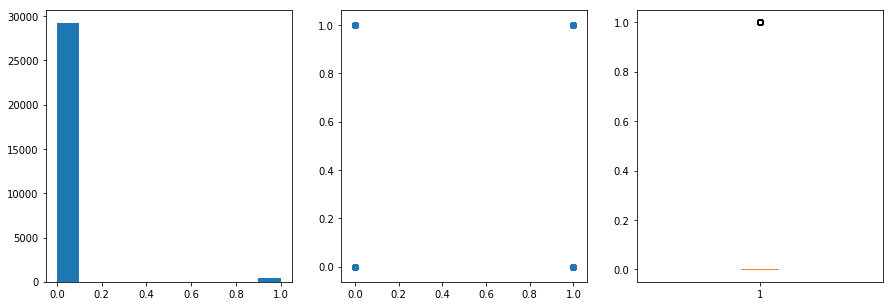

##################################################
night_pck_user_8
skewness is  9.168014932613882
count    29591.000000
mean         0.011490
std          0.106576
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%          0.000000
90%          0.000000
95%          0.000000
99%          1.000000
max          1.000000
Name: night_pck_user_8, dtype: float64


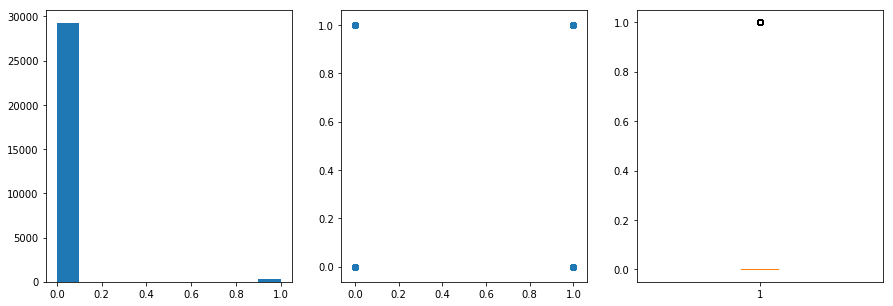

##################################################
monthly_2g_6
skewness is  2.6278959157879624
count    29591.000000
mean         0.175391
std          0.436108
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%          0.000000
90%          1.000000
95%          1.000000
99%          2.000000
max          4.000000
Name: monthly_2g_6, dtype: float64


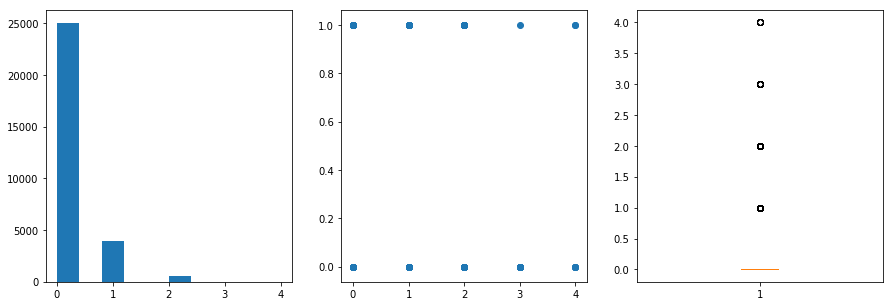

##################################################
monthly_2g_7
skewness is  2.613898215203217
count    29591.000000
mean         0.184313
std          0.451678
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%          0.000000
90%          1.000000
95%          1.000000
99%          2.000000
max          5.000000
Name: monthly_2g_7, dtype: float64


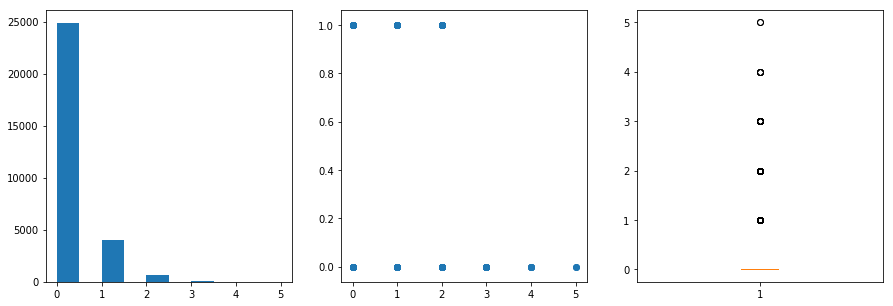

##################################################
monthly_2g_8
skewness is  2.909199720437048
count    29591.000000
mean         0.154405
std          0.407414
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%          0.000000
90%          1.000000
95%          1.000000
99%          2.000000
max          5.000000
Name: monthly_2g_8, dtype: float64


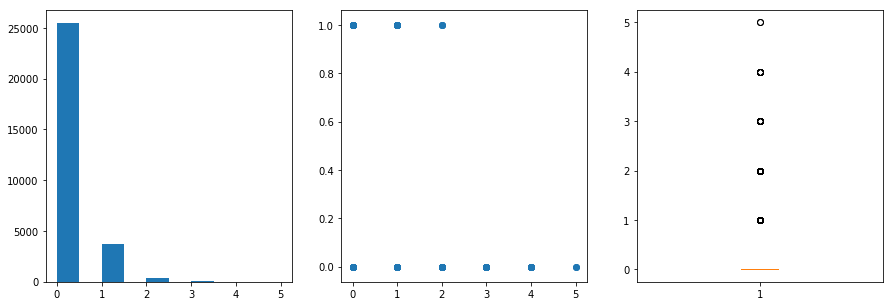

##################################################
sachet_2g_6
skewness is  3.6816084621841596
count    29591.000000
mean         1.072015
std          2.511868
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%          1.000000
90%          4.000000
95%          7.000000
99%         12.000000
max         42.000000
Name: sachet_2g_6, dtype: float64


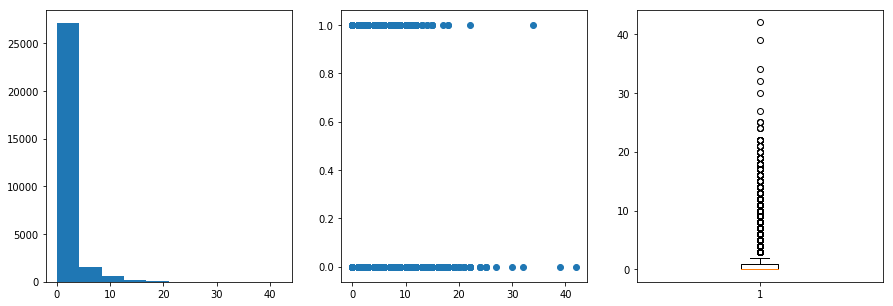

##################################################
sachet_2g_7
skewness is  3.4935215699478266
count    29591.000000
mean         1.223446
std          2.747481
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%          1.000000
90%          5.000000
95%          7.000000
99%         12.000000
max         48.000000
Name: sachet_2g_7, dtype: float64


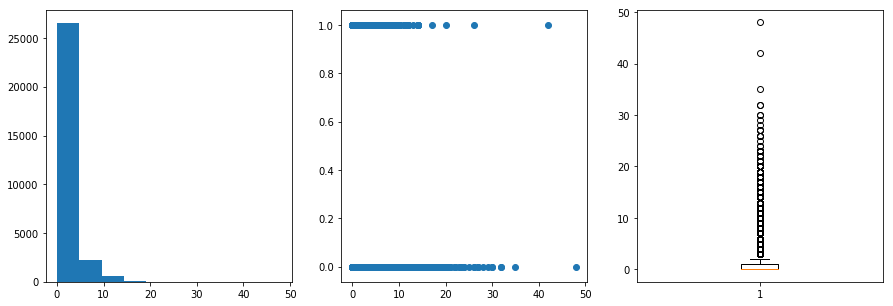

##################################################
sachet_2g_8
skewness is  3.8694430370060515
count    29591.000000
mean         1.064445
std          2.547249
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%          1.000000
90%          4.000000
95%          6.000000
99%         12.000000
max         44.000000
Name: sachet_2g_8, dtype: float64


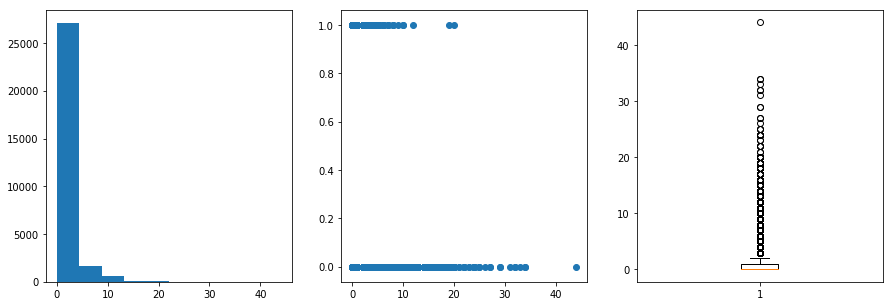

##################################################
monthly_3g_6
skewness is  4.64241057192576
count    29591.000000
mean         0.219121
std          0.615482
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%          0.000000
90%          1.000000
95%          1.000000
99%          3.000000
max         14.000000
Name: monthly_3g_6, dtype: float64


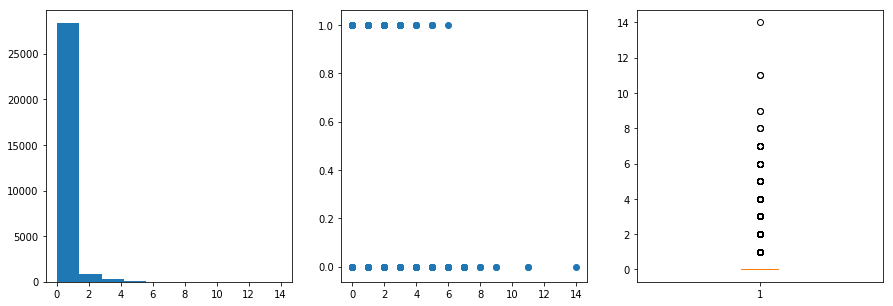

##################################################
monthly_3g_7
skewness is  5.2077919780032165
count    29591.000000
mean         0.231084
std          0.662363
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%          0.000000
90%          1.000000
95%          1.000000
99%          3.000000
max         16.000000
Name: monthly_3g_7, dtype: float64


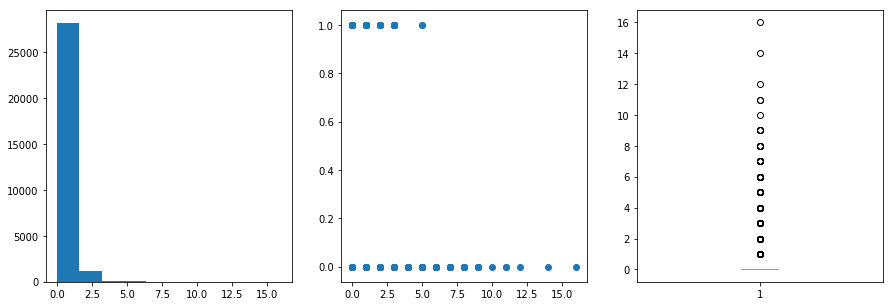

##################################################
monthly_3g_8
skewness is  4.855700221719803
count    29591.000000
mean         0.213308
std          0.620578
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%          0.000000
90%          1.000000
95%          1.000000
99%          3.000000
max         16.000000
Name: monthly_3g_8, dtype: float64


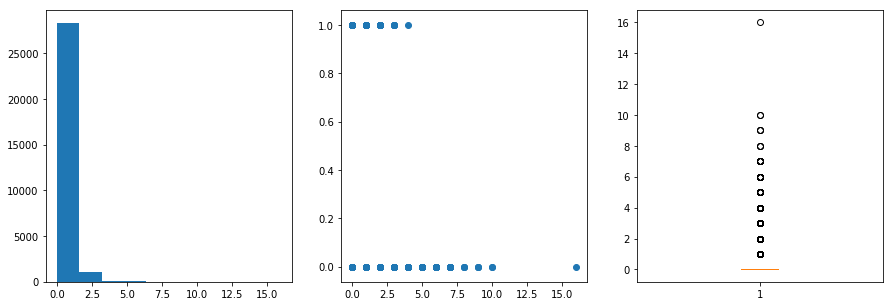

##################################################
sachet_3g_6
skewness is  11.500749684292572
count    29591.000000
mean         0.210875
std          0.990563
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%          0.000000
90%          1.000000
95%          1.000000
99%          4.000000
max         29.000000
Name: sachet_3g_6, dtype: float64


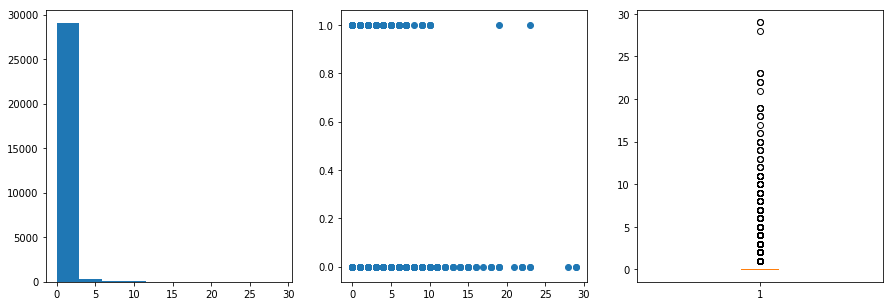

##################################################
sachet_3g_7
skewness is  11.24267933489101
count    29591.000000
mean         0.229326
std          1.096244
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%          0.000000
90%          1.000000
95%          1.000000
99%          5.000000
max         35.000000
Name: sachet_3g_7, dtype: float64


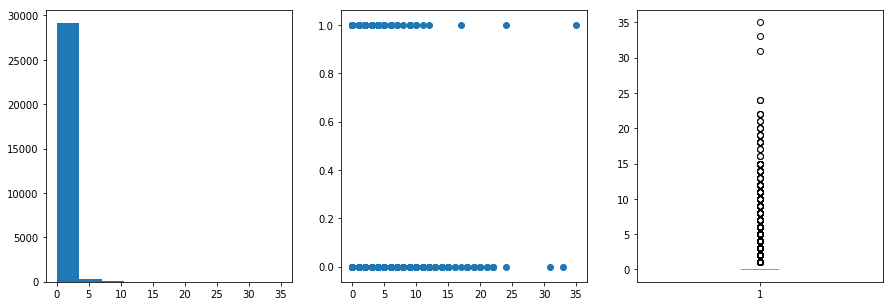

##################################################
sachet_3g_8
skewness is  13.017823177055465
count    29591.000000
mean         0.204049
std          1.106495
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%          0.000000
90%          0.000000
95%          1.000000
99%          5.000000
max         41.000000
Name: sachet_3g_8, dtype: float64


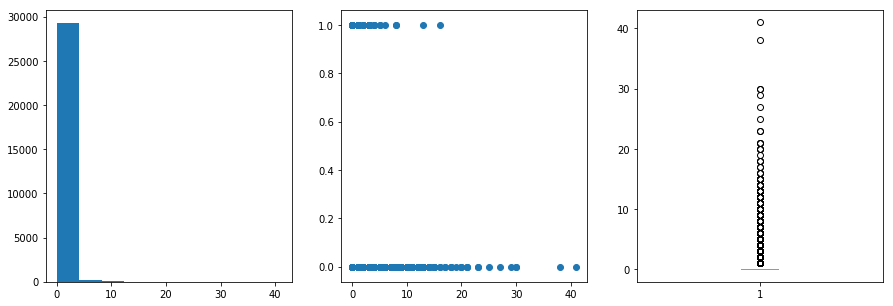

##################################################
fb_user_6
skewness is  -0.08097335498456087
count    29591.000000
mean         0.520226
std          0.499599
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          1.000000
75%          1.000000
90%          1.000000
95%          1.000000
99%          1.000000
max          1.000000
Name: fb_user_6, dtype: float64


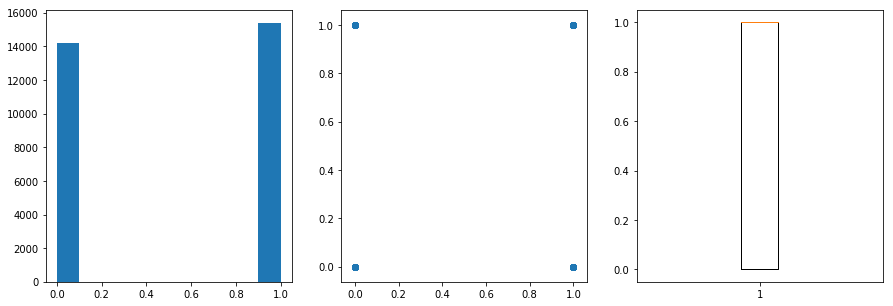

##################################################
fb_user_7
skewness is  -0.1082370190872007
count    29591.000000
mean         0.527018
std          0.499278
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          1.000000
75%          1.000000
90%          1.000000
95%          1.000000
99%          1.000000
max          1.000000
Name: fb_user_7, dtype: float64


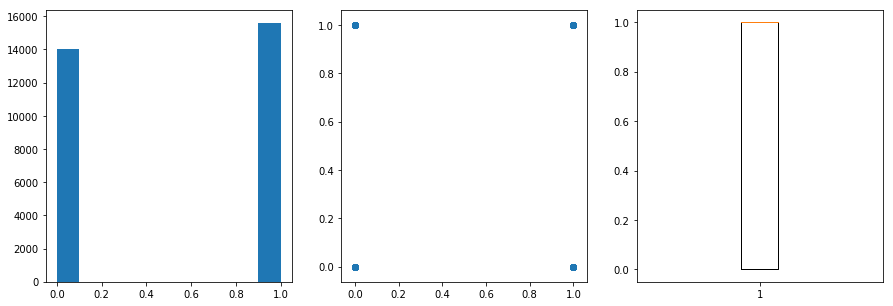

##################################################
fb_user_8
skewness is  0.0777212975428237
count    29591.000000
mean         0.480585
std          0.499631
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%          1.000000
90%          1.000000
95%          1.000000
99%          1.000000
max          1.000000
Name: fb_user_8, dtype: float64


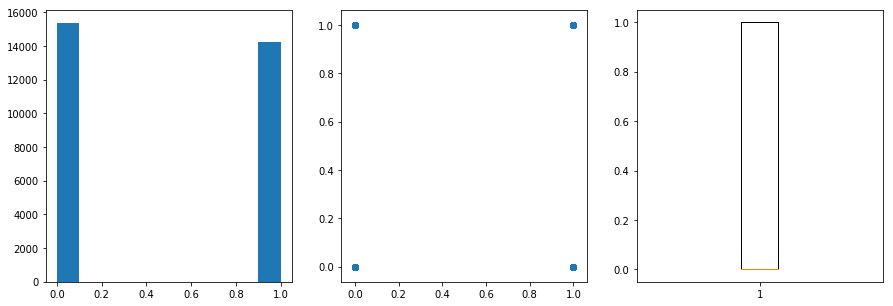

##################################################
aon
skewness is  0.9917751662698552
count    29591.000000
mean      1210.874083
std        957.545695
min        180.000000
1%         189.000000
5%         228.000000
25%        461.000000
50%        849.000000
75%       1759.500000
90%       2795.000000
95%       3140.000000
99%       3651.000000
max       4321.000000
Name: aon, dtype: float64


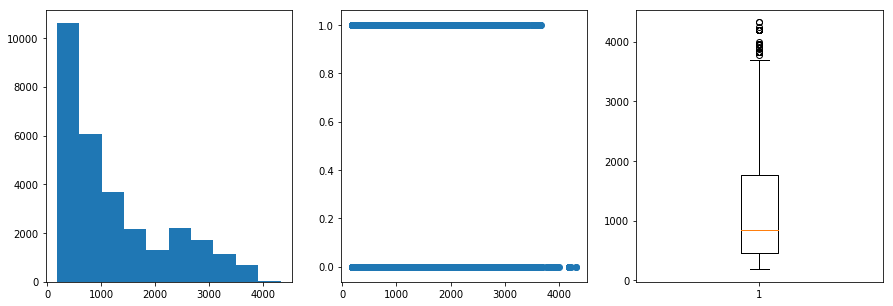

##################################################
vbc_3g_8
skewness is  5.472691295895197
count    29591.000000
mean       170.359143
std        422.220134
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%        132.170000
90%        585.060000
95%        940.800000
99%       1968.020000
max      12916.220000
Name: vbc_3g_8, dtype: float64


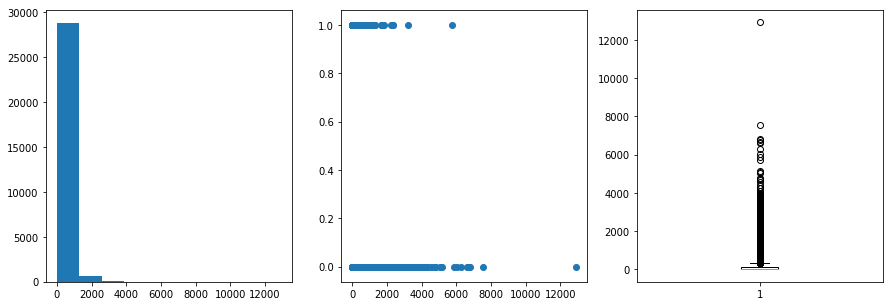

##################################################
vbc_3g_7
skewness is  5.059454221528322
count    29591.000000
mean       180.044807
std        444.592967
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%        140.505000
90%        614.740000
95%        988.580000
99%       2072.785000
max       9165.600000
Name: vbc_3g_7, dtype: float64


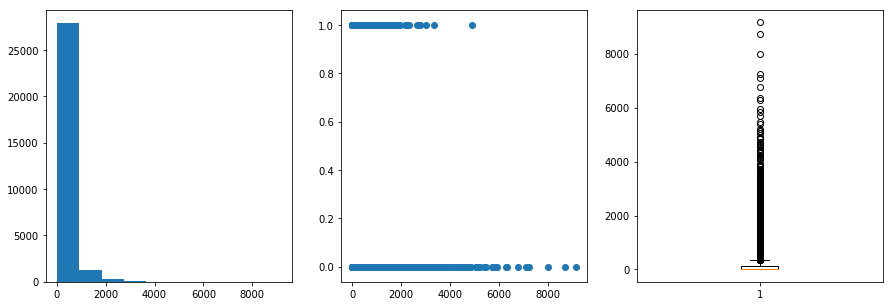

##################################################
vbc_3g_6
skewness is  5.680625751917847
count    29591.000000
mean       159.652917
std        418.136881
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%        101.250000
90%        536.090000
95%        887.855000
99%       1948.430000
max      11166.210000
Name: vbc_3g_6, dtype: float64


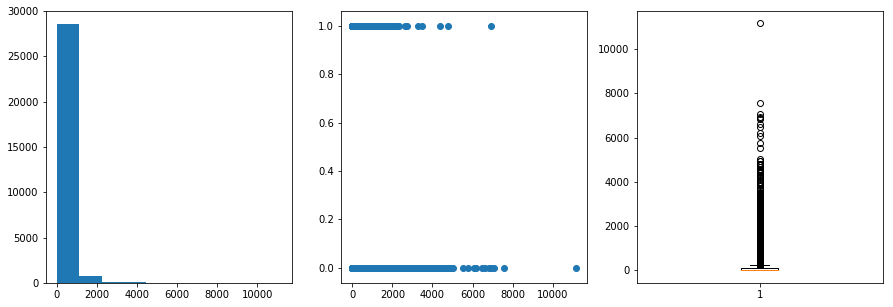

##################################################
total_data_amt_6
skewness is  22.640597697158356
count     29591.000000
mean        458.823182
std        1425.821018
min           0.000000
1%            0.000000
5%            0.000000
25%           0.000000
50%          98.000000
75%         400.000000
90%        1134.000000
95%        2080.000000
99%        5202.600000
max      105644.000000
Name: total_data_amt_6, dtype: float64


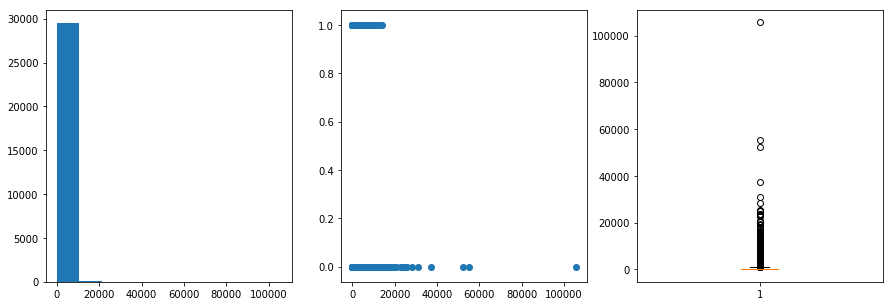

##################################################
total_data_amt_7
skewness is  10.919480484771203
count    29591.000000
mean       533.193545
std       1484.391784
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%        126.000000
75%        575.000000
90%       1374.000000
95%       2432.000000
99%       6272.100000
max      55080.000000
Name: total_data_amt_7, dtype: float64


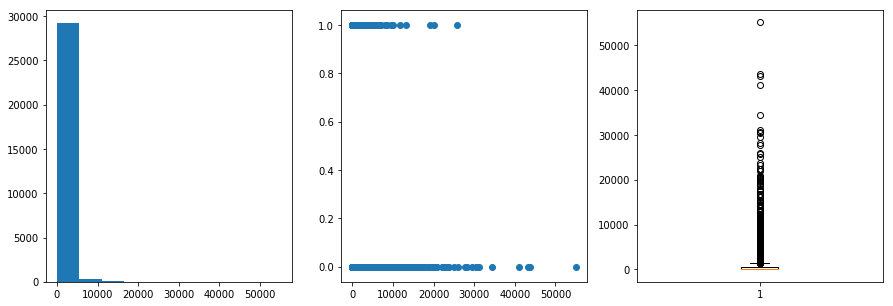

##################################################
total_data_amt_8
skewness is  19.06346005023212
count    29591.000000
mean       467.950072
std       1632.548021
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%         25.000000
75%        336.000000
90%       1105.000000
95%       2268.000000
99%       5766.300000
max      89106.500000
Name: total_data_amt_8, dtype: float64


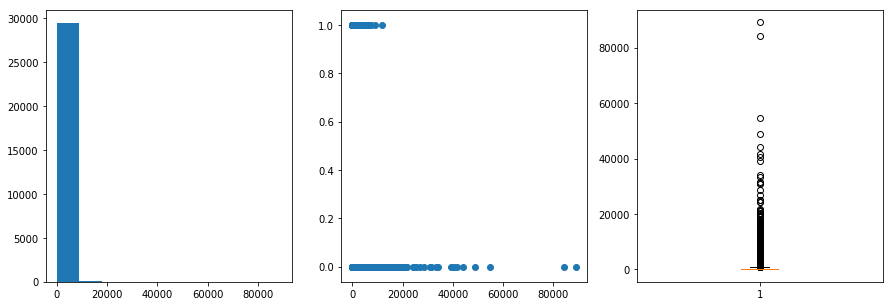

##################################################
total_rech_amt
skewness is  18.299228451357944
count    29591.000000
mean      1325.843905
std       1033.074221
min          0.000000
1%         198.000000
5%         355.000000
25%        820.000000
50%       1143.000000
75%       1598.000000
90%       2241.000000
95%       2818.000000
99%       4434.000000
max      75525.000000
Name: total_rech_amt, dtype: float64


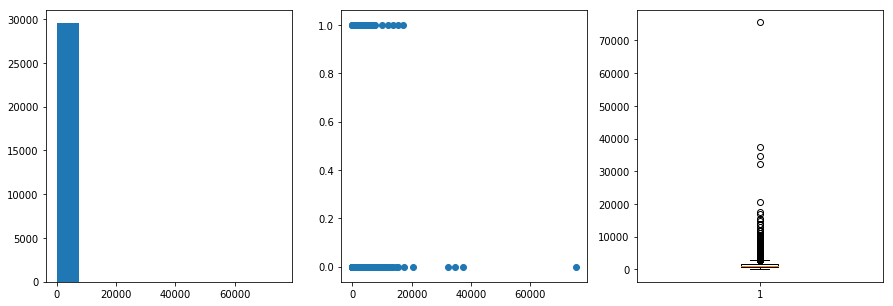

##################################################
total_data_amt
skewness is  11.260743737319894
count     29591.000000
mean        992.016726
std        2491.127218
min           0.000000
1%            0.000000
5%            0.000000
25%           0.000000
50%         308.000000
75%        1008.000000
90%        2476.000000
95%        4088.500000
99%       10251.900000
max      112959.000000
Name: total_data_amt, dtype: float64


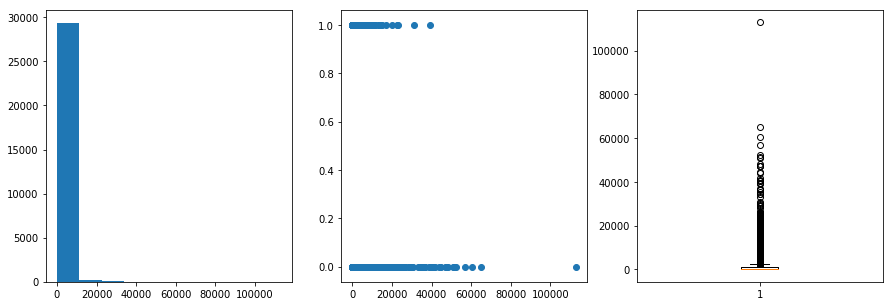

##################################################
total_rech
skewness is  10.983220888250827
count    29591.000000
mean      1158.930316
std       1365.816247
min        481.500000
1%         486.000000
5%         503.000000
25%        606.000000
50%        804.000000
75%       1214.500000
90%       2001.000000
95%       2815.500000
99%       6128.250000
max      61236.000000
Name: total_rech, dtype: float64


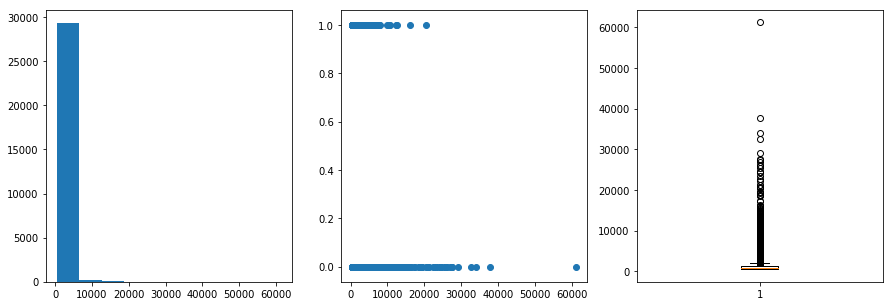

##################################################


In [75]:
#Checking the skewness of the data for all the columns in the DataFrame
skewness_list = []
df = telecom_hv.loc[ : , telecom_hv.columns != 'target_churn'] 
for i in df.columns:
    print(i)
    print('skewness is ', telecom_hv[i].skew())
    skewness_list.append(telecom_hv[i].skew())
    col_plots(i)
    print('#'*50)

In [76]:
#Printing the skewness for some of the columns from the dataframe
df_skew = pd.DataFrame(df.columns, columns = ['col name'])
df_skew['skew'] = skewness_list
df_skew.head(10)

col name       skew
0         arpu_6  12.115559
1         arpu_7  17.682516
2         arpu_8  15.418337
3    onnet_mou_6   4.031714
4    onnet_mou_7   4.229588
5    onnet_mou_8   5.057102
6   offnet_mou_6   3.380041
7   offnet_mou_7   3.627078
8   offnet_mou_8   4.985108
9  roam_ic_mou_6  11.523554

In [77]:
#We are taking that the columns that are having a skewness>10 are highly skewed and those outliers needs to be capped, as 
#for one column, we dont want to lose the remaining column data 
#from the dataframe
df_high_skew = df_skew[df_skew['skew'] >10]
df_high_skew.head()

col name       skew
0          arpu_6  12.115559
1          arpu_7  17.682516
2          arpu_8  15.418337
9   roam_ic_mou_6  11.523554
10  roam_ic_mou_7  17.265335

In [78]:
#Shape of highly skewed data
df_high_skew.shape

(67, 2)

In [79]:
#lets cap them, as they are highly skewed  
for i in df_high_skew['col name']:
    telecom_hv[i] = outliers_3sigma(i)

In [80]:
# Now lets take that if the Skewness is between 2 - 10 then its mediumly skewed data and these outliers can just be capped 
#to 3sigma (instead of dropping them all)
df_med_skew = df_skew[(df_skew['skew'] >2) & (df_skew['skew'] <10)]
df_med_skew.head()

col name      skew
3   onnet_mou_6  4.031714
4   onnet_mou_7  4.229588
5   onnet_mou_8  5.057102
6  offnet_mou_6  3.380041
7  offnet_mou_7  3.627078

In [81]:
#Capping the Mediumly Skewed Outliers
for i in df_med_skew['col name']:
    telecom_hv[i] = outliers_3sigma(i)

##  Visualization

In [82]:
#Lets define some functions for plots
# create box plot for  6th, 7th and 8th month
def plot_box_chart(attribute):
    plt.figure(figsize=(20,16))
    df = telecom_hv
    plt.subplot(2,3,1)
    sns.boxplot(data=df, y=attribute+"_6",x="target_churn",hue="target_churn",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,2)
    sns.boxplot(data=df, y=attribute+"_7",x="target_churn",hue="target_churn",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,3)
    sns.boxplot(data=df, y=attribute+"_8",x="target_churn",hue="target_churn",
                showfliers=False,palette=("plasma"))
    plt.show()

In [83]:
# create mean bar chart for  6th, 7th and 8th month
def plot_mean_bar_chart(df,columns_list):
    df_0 = df[df.target_churn==0].filter(columns_list)
    df_1 = df[df.target_churn==1].filter(columns_list)

    mean_df_0 = pd.DataFrame([df_0.mean()],index={'Non Churn'})
    mean_df_1 = pd.DataFrame([df_1.mean()],index={'Churn'})

    frames = [mean_df_0, mean_df_1]
    mean_bar = pd.concat(frames)

    mean_bar.T.plot.bar(figsize=(10,5),rot=0)
    plt.show()
    
    return mean_bar

In [84]:
#Filtering columns which consists recharge amount and visualizing them
recharge_amnt_columns =  telecom_hv.columns[telecom_hv.columns.str.contains('rech_amt')]
recharge_amnt_columns.tolist()

['total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'total_rech_amt']

#### Total Recharge Amount

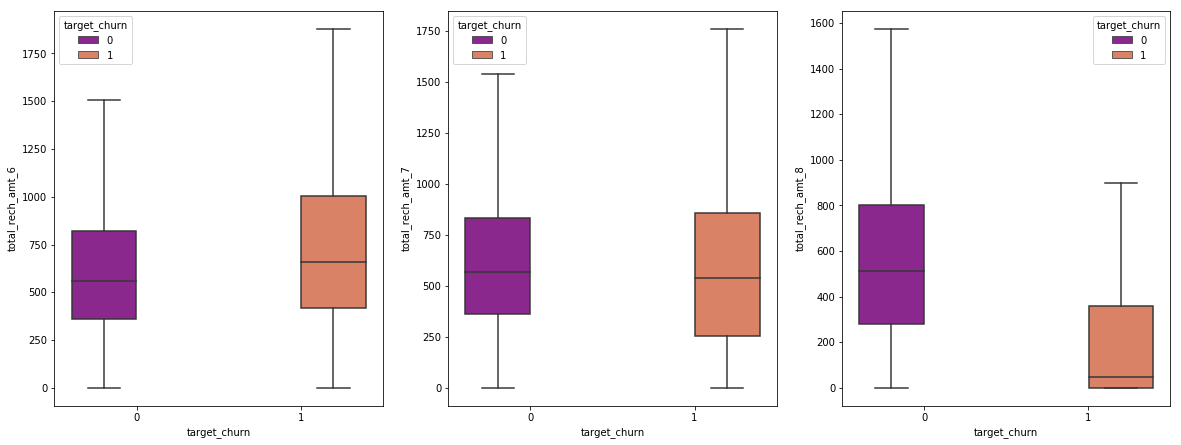

In [85]:
# Ploting for total recharge amount:
plot_box_chart('total_rech_amt')

We can see a drop in the total recharge amount for churned customers in the 8th Month (Action Phase).

#### Maximum Recharge Amount

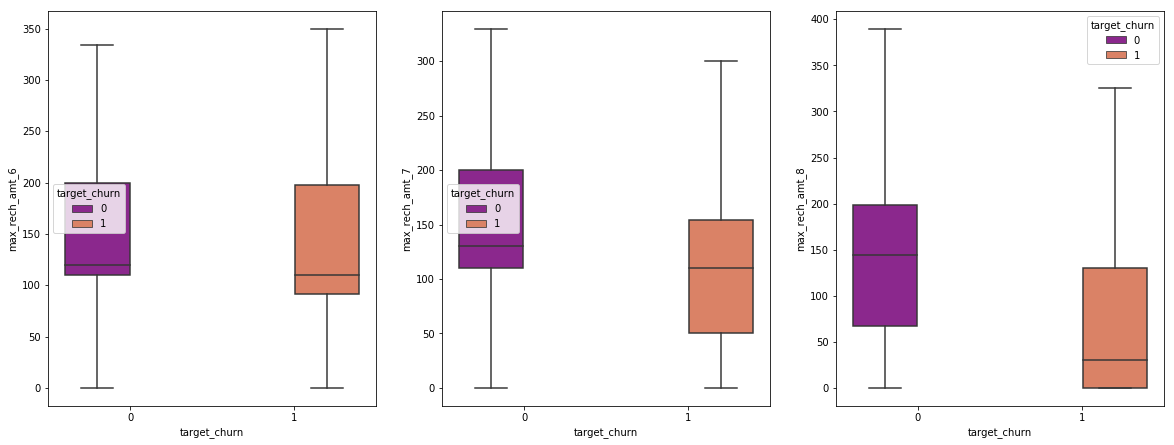

In [86]:
# Ploting for maximum recharge amount for data:
plot_box_chart('max_rech_amt')

We can see that there is a huge drop in maximum recharge amount for data in the 8th month (action phase) for churned customers.`

In [87]:
#Getting the last day recharge amount columns
last_day_rech_amt = telecom_hv.columns[telecom_hv.columns.str.contains('day')]

In [88]:
last_day_rech_amt.tolist()

['last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8']

#### Last Day Recharge Amount

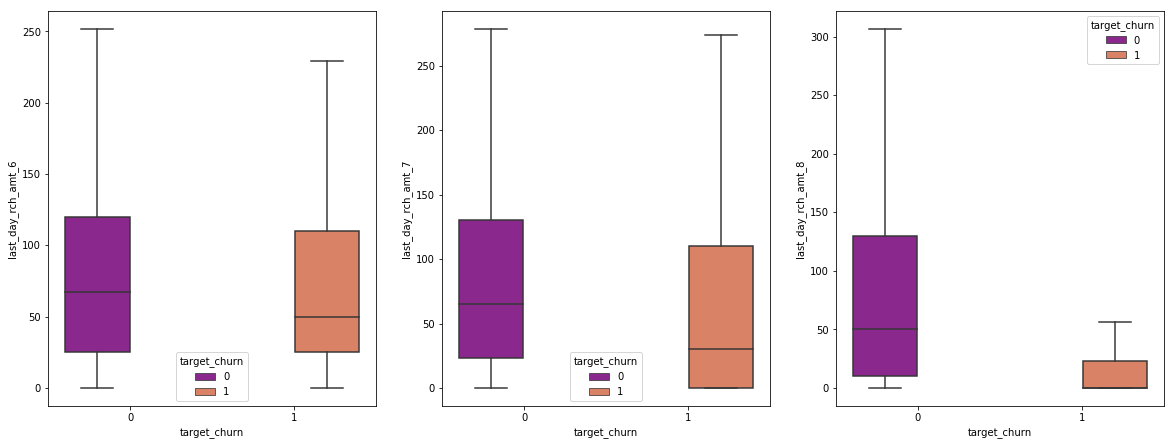

In [89]:
# Ploting for last day recharge amount:
plot_box_chart('last_day_rch_amt')

We are getting a huge drop in 8th month recharge amount for churned customers.

In [90]:
other_recharge = telecom_hv.columns[telecom_hv.columns.str.contains('rech_num|max_rech_data',regex=True)]
other_recharge.tolist()

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8']

#### Total Recharge Number

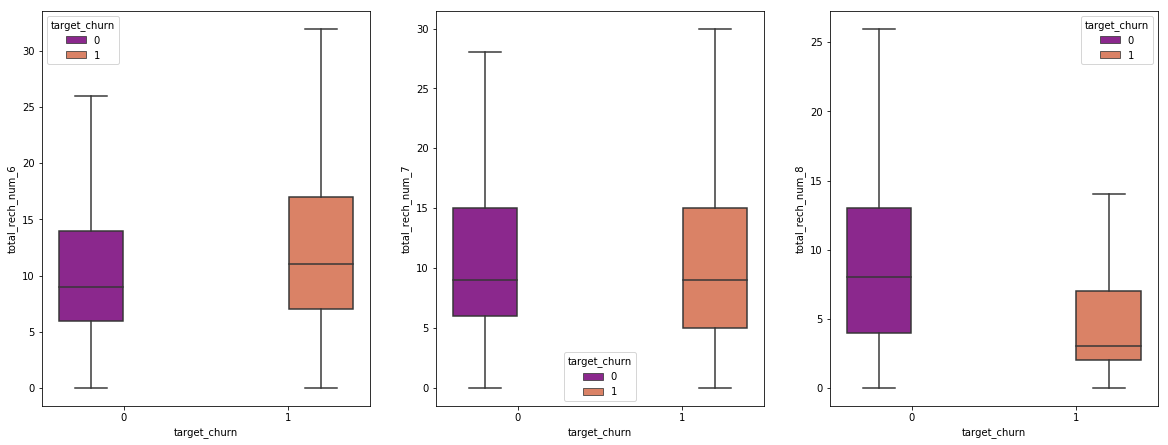

In [91]:
# Ploting for Total recharge for Number:
plot_box_chart('total_rech_num')

We can see that there is a huge drop in total recharge number also in the 8th month (action phase) for churned customers.

#### Maximum Recharge Data

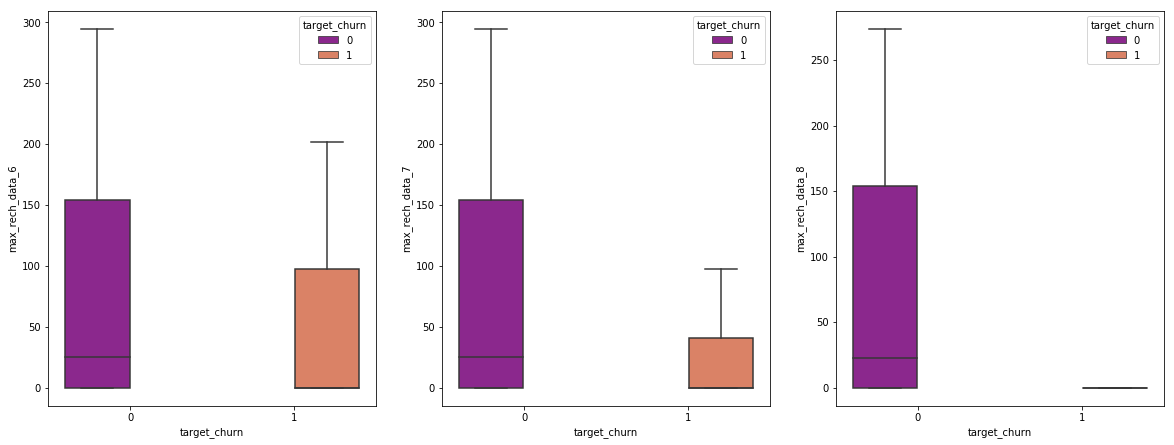

In [92]:
# Ploting for maximum recharge for data:
plot_box_chart('max_rech_data')

We can see that there is a huge drop in maximum recharge for data also in the 8th month (action phase) for churned customers.

 #### 2G and 3G usage related attributes

In [93]:
#Filtering the columns that are having 2g and 3g related columns
usage_2g_and_3g = telecom_hv.columns[telecom_hv.columns.str.contains('2g|3g',regex=True)]
usage_2g_and_3g.tolist()

['count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'vol_2g_mb_6',
 'vol_2g_mb_7',
 'vol_2g_mb_8',
 'vol_3g_mb_6',
 'vol_3g_mb_7',
 'vol_3g_mb_8',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8',
 'vbc_3g_8',
 'vbc_3g_7',
 'vbc_3g_6']

#### Volume of 2G usage

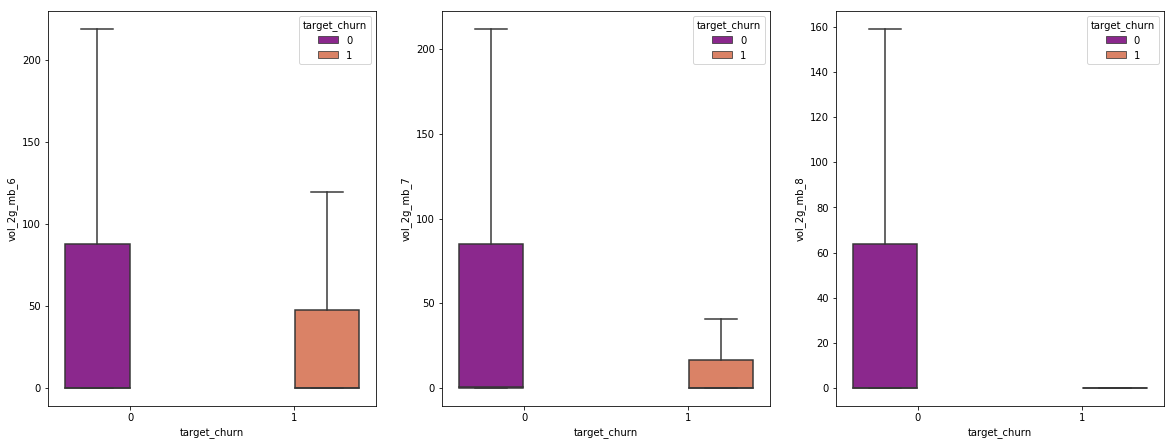

In [94]:
# Ploting for volume of 2G usage columns:
plot_box_chart('vol_2g_mb')

#### Volume of 3G usage 

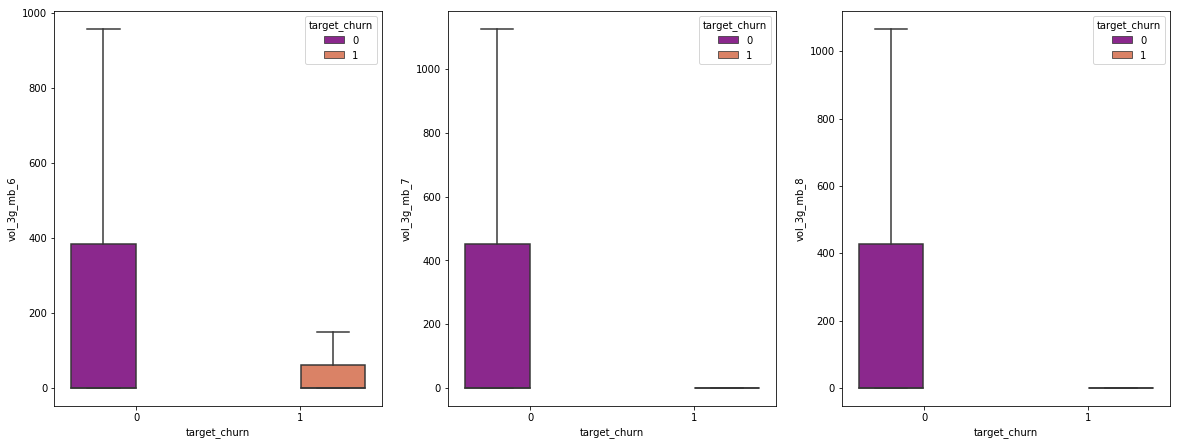

In [95]:
plot_box_chart('vol_3g_mb')

We have two observations from above:
1. 2G and 3G usage for churned customers drops in 8th month
2. We also see that 2G/3G usage is higher for non-churned customers indicating that churned customers might be from areas where 2G/3G service is not properly available.

#### 2G Recharge Count

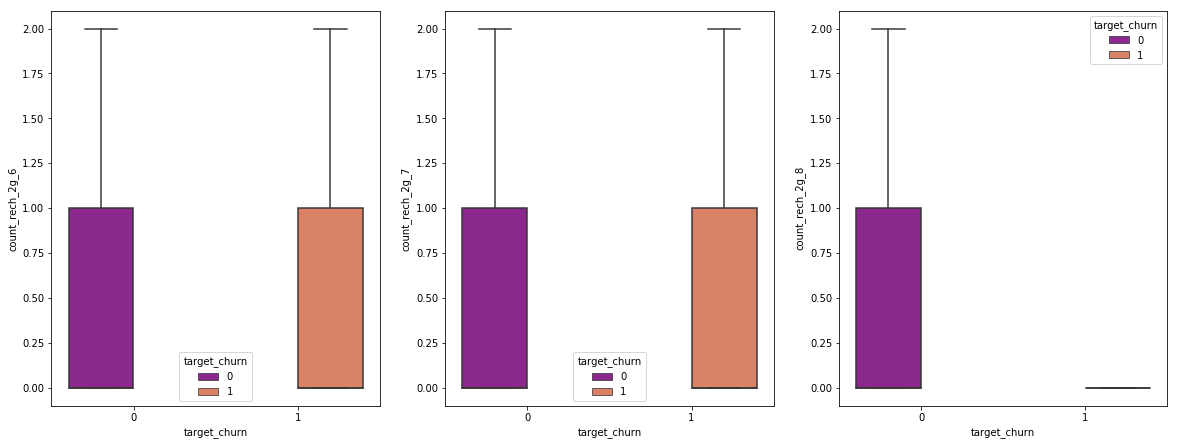

In [96]:
plot_box_chart('count_rech_2g')

#### 3G Recharge Count

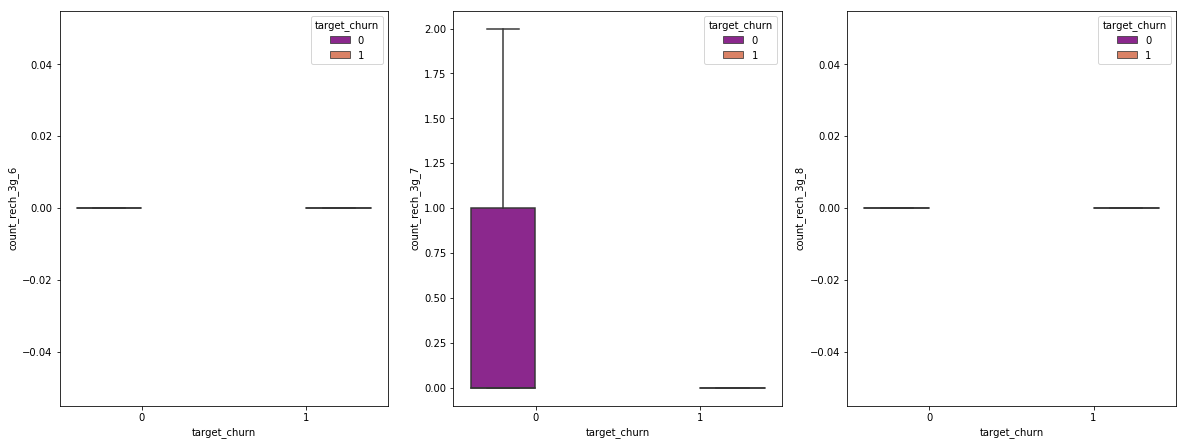

In [97]:
plot_box_chart('count_rech_3g')

In [98]:
# let's check monthly 2G/3G service schemes
monthly_subcription_2g_3g = telecom_hv.columns[telecom_hv.columns.str.contains('monthly_2g|monthly_3g',regex=True)]
monthly_subcription_2g_3g.tolist()

['monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8']

#### Monthly Subscription of 2G and 3G

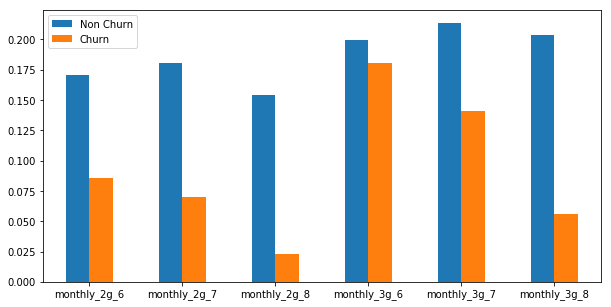

monthly_2g_6  monthly_2g_7  monthly_2g_8  monthly_3g_6  \
Non Churn      0.170536      0.180774      0.154493      0.199678   
Churn          0.085423      0.069867      0.023113      0.180832   

           monthly_3g_7  monthly_3g_8  
Non Churn      0.213582      0.203307  
Churn          0.140835      0.055700

In [99]:
plot_mean_bar_chart(telecom_hv, monthly_subcription_2g_3g)

We can see a drop in monthly subscription for churned customers in 8th Month.

#### Volume Based Cost 3G

In [100]:
# let's check Volume based cost 
vbc_column = telecom_hv.columns[telecom_hv.columns.str.contains('vbc_',regex=True)]
vbc_column.tolist()

['vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6']

In [101]:
vbc_column = telecom_hv.columns[telecom_hv.columns.str.contains('vbc_3g',regex=True)]
sorted(vbc_column.tolist())

['vbc_3g_6', 'vbc_3g_7', 'vbc_3g_8']

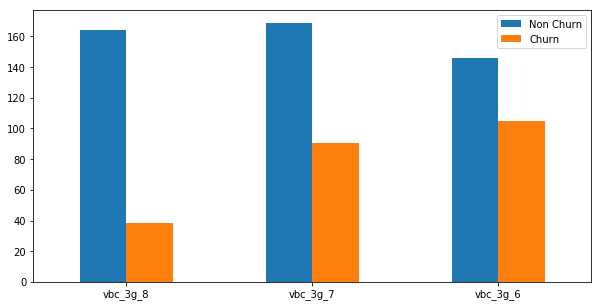

vbc_3g_8    vbc_3g_7    vbc_3g_6
Non Churn  163.96621  168.661027  145.912800
Churn       38.08715   90.481417  104.720272

In [102]:
plot_mean_bar_chart(telecom_hv, vbc_column)

Significantly it showing that volume based cost for 3G is much lower for Churned customers as compared to Non-Churned Customers and also there is a drop in vbc in 8th month

#### ARPU (Average Revenue Per User)

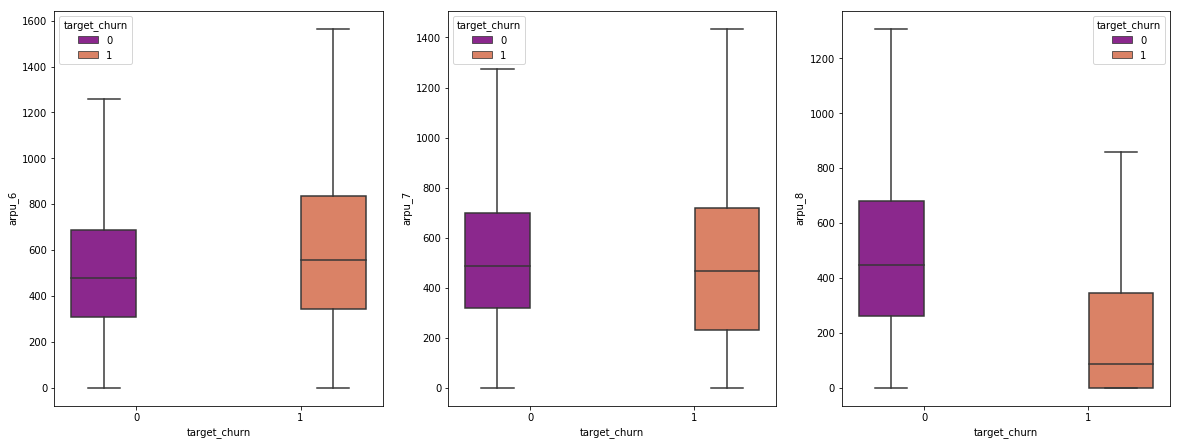

In [103]:
# Checking columns for average revenue per user
arpu_cols = telecom_hv.columns[telecom_hv.columns.str.contains('arpu_')]

# Plotting arpu
plot_box_chart('arpu')

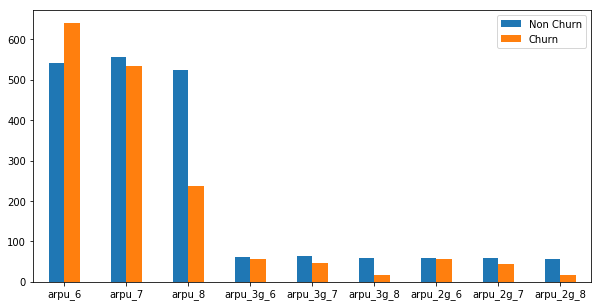

arpu_6      arpu_7      arpu_8  arpu_3g_6  arpu_3g_7  \
Non Churn  542.603826  555.950680  523.877455  60.674083  63.027175   
Churn      640.657174  534.279551  238.276040  57.723673  45.552624   

           arpu_3g_8  arpu_2g_6  arpu_2g_7  arpu_2g_8  
Non Churn  59.773788  57.956030  59.800097  55.902336  
Churn      16.788549  56.900992  44.305212  16.060521

In [104]:
plot_mean_bar_chart(telecom_hv, arpu_cols)

We can see that huge drops for Arpu in 8th month for churned customers

#### Offnet Usage

In [105]:
#Offnet Usage
offnet_usage_service_col = telecom_hv.columns[telecom_hv.columns.str.contains('offnet.*mou',regex=True)]


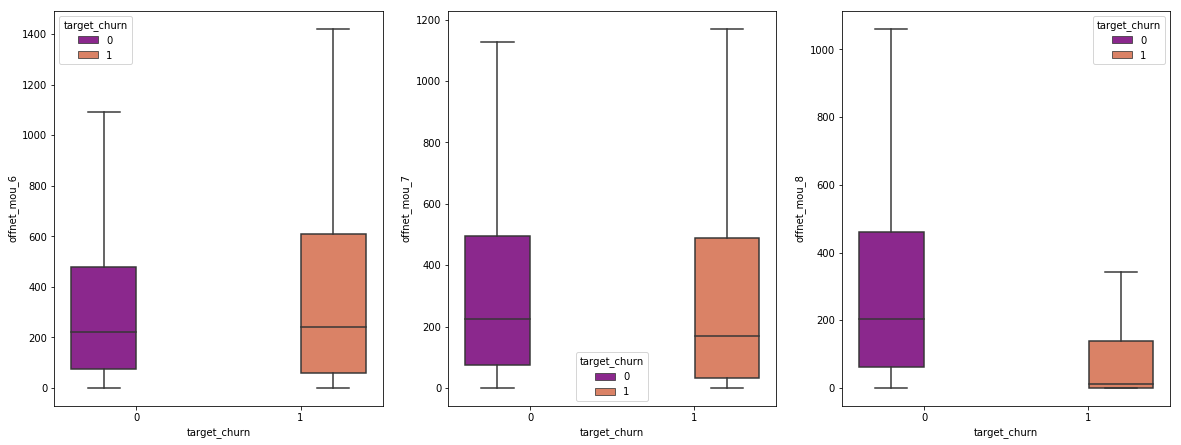

In [106]:
# Offnet mou values for churned and non churned customers
plot_box_chart('offnet_mou')

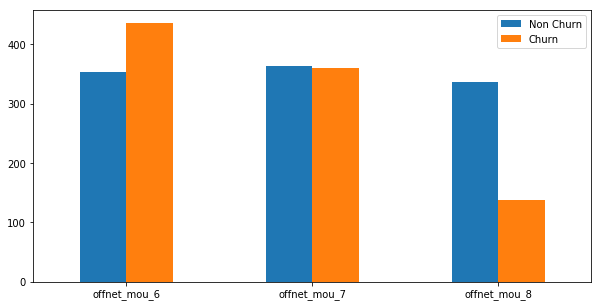

offnet_mou_6  offnet_mou_7  offnet_mou_8
Non Churn    352.673268    363.795187    336.483980
Churn        435.568299    359.683739    137.239385

In [107]:
plot_mean_bar_chart(telecom_hv, offnet_usage_service_col)

We can see the drop for offnet mou services in the 8th month

#### Onnet Usage

In [108]:
#Onnet Usage
onnet_usage_service =  telecom_hv.columns[telecom_hv.columns.str.contains('^onnet.*mou',regex=True)]

In [109]:
onnet_usage_service

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8'], dtype='object')

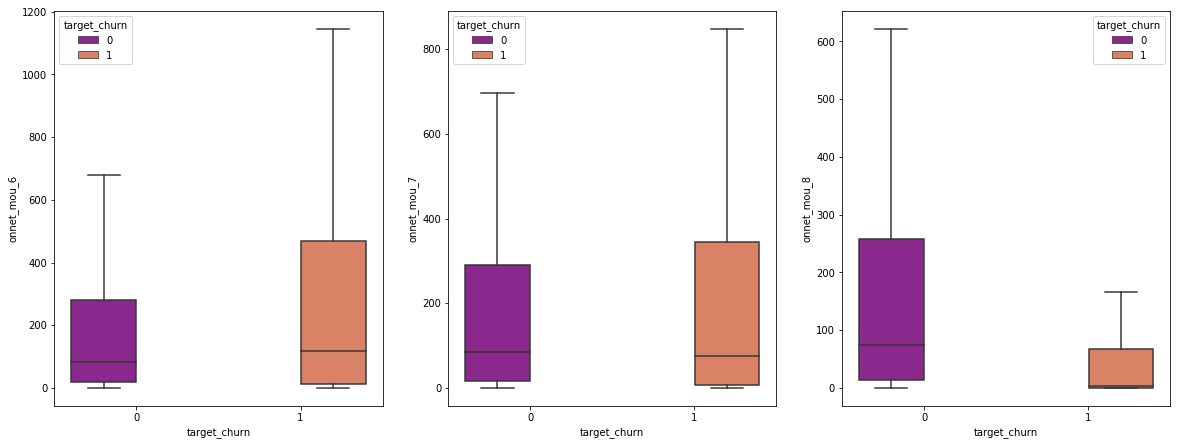

In [110]:
# Plotting onnet
plot_box_chart('onnet_mou')

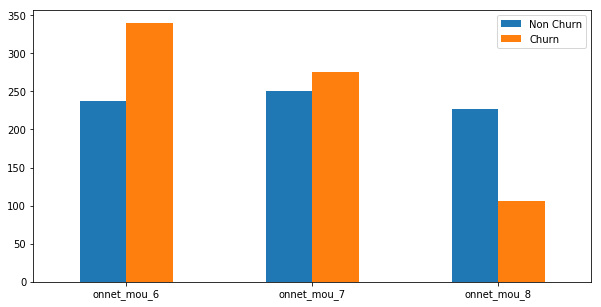

onnet_mou_6  onnet_mou_7  onnet_mou_8
Non Churn   237.656228   250.783699   227.306377
Churn       339.548600   275.123987   106.658725

In [111]:
plot_mean_bar_chart(telecom_hv, onnet_usage_service)

We also see that there is a drop in Onnet usage in the 8th month for churned customers

In [112]:
#Function to show the labels for the plots
def labels(fig):
 rects1 = fig.patches
 for rect in rects1:
    y_height=rect.get_height()
    fig.text(rect.get_x()+rect.get_width()/2,1*y_height, int(y_height),ha='center',va='bottom',fontsize=10)

In [113]:
def plot_with_default_rate(x=None, types = 'h'):
    fig,axes = plt.subplots(3,1,figsize = (15,15))
    
    x1 = x + '_6'
    x2 = x + '_7'
    x3 = x + '_8'
    
    ax1=sns.countplot(x=x1,data=telecom_hv,ax= axes[0])
    labels(ax1)
    ax1.title.set_text('Distribution of '+x)

    ax2=sns.countplot(x=x2,data=telecom_hv,ax= axes[1])
    labels(ax2)
    ax2.title.set_text('Distribution of '+x)
    
    ax3=sns.countplot(x=x3,data=telecom_hv,ax= axes[2])
    labels(ax3)
    ax3.title.set_text('Distribution of '+x)
    

    plt.show()

#### Date of Last Recharge

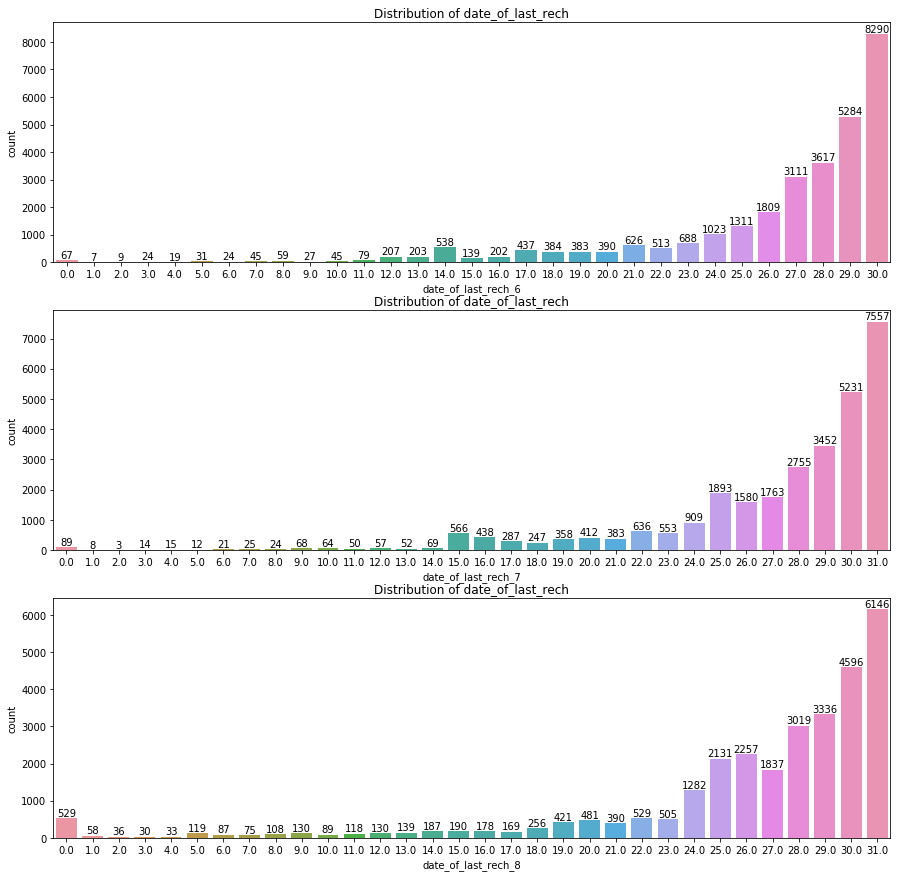

In [114]:
plot_with_default_rate('date_of_last_rech')

We observe that majority of the people recharge in the last week of the month, we also observe that very few people donot recharge for calling. 

#### date_of_last_rech_data

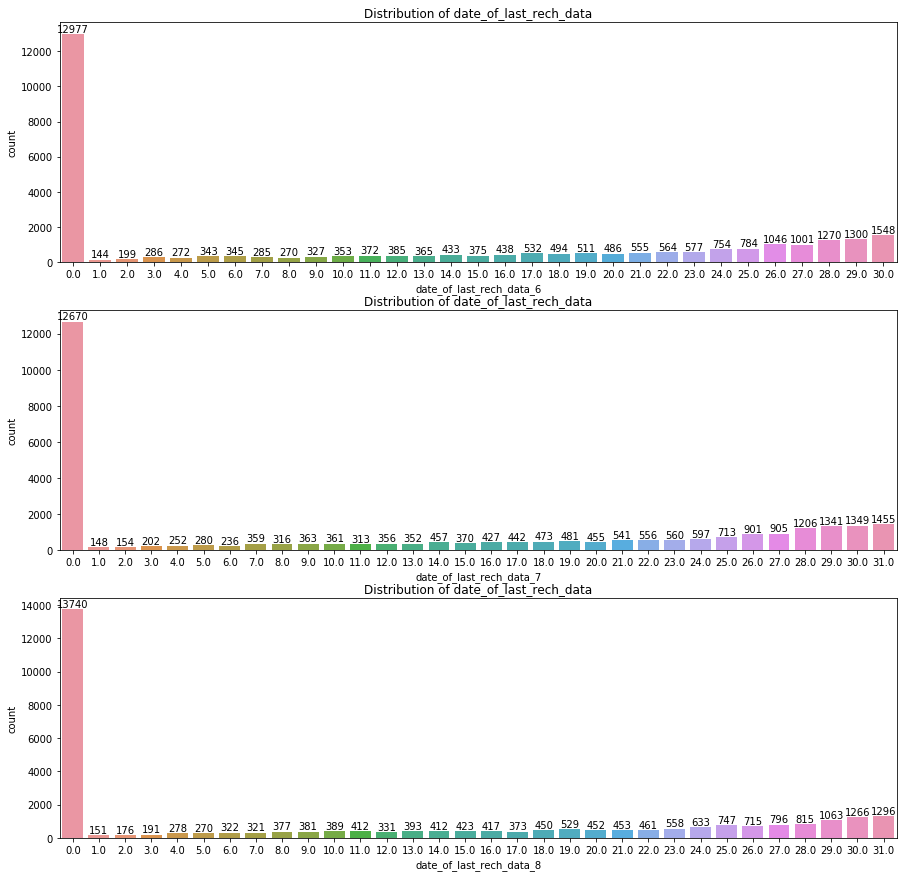

In [115]:
plot_with_default_rate('date_of_last_rech_data')

we observe that a lot of people recharge in the last week of the month , with steady inc as days pass, we see that a lot of people dont recharge for data(indicated by 0). 

#### AON (Age on Network)

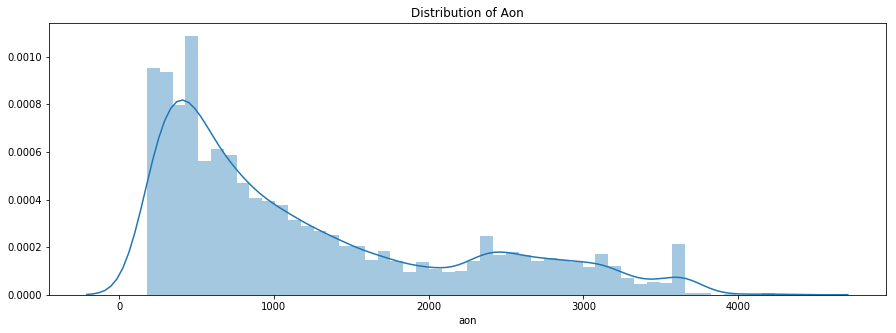

In [116]:
fig,axes = plt.subplots(figsize = (15,5))
ax2=sns.distplot(telecom_hv['aon'])

ax2.title.set_text('Distribution of Aon')

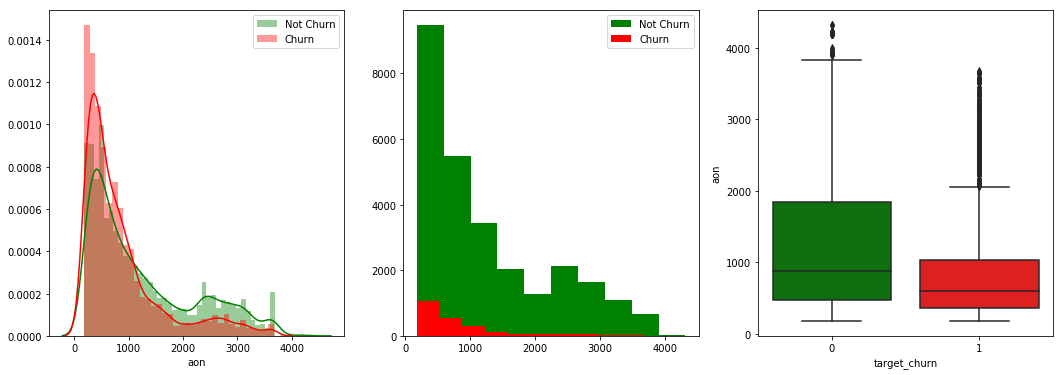

In [117]:
# Data Distribution
plt.figure(figsize = (18,6))
plt.subplot(1,3,1)
sns.distplot(telecom_hv.loc[telecom_hv['target_churn']==0,'aon'],hist=True, color = 'g')
sns.distplot(telecom_hv.loc[telecom_hv['target_churn']==1,'aon'],hist=True, color='r')
plt.legend(['Not Churn','Churn'])


plt.subplot(1,3,2)
plt.hist(telecom_hv.loc[telecom_hv['target_churn']==0,'aon'],color = 'g')
plt.hist(telecom_hv.loc[telecom_hv['target_churn']==1,'aon'],color = 'r')
plt.legend(['Not Churn','Churn'])

plt.subplot(1,3,3)
sns.boxplot(y='aon', data=telecom_hv, x='target_churn',palette =['g','r'])
plt.show()


we observe that most of the churn happen in the first 1000 days, and maximum customers are in between 2000 days. It is observed that once the customers pass the 1000 days mark they are way more likely to stay. 

In [118]:
#Correlation Matrix for the Dataframe
corr_matrix=telecom_hv.corr().abs()
corr_matrix

arpu_6    arpu_7    arpu_8  onnet_mou_6  \
arpu_6                    1.000000  0.603050  0.512789     0.425678   
arpu_7                    0.603050  1.000000  0.701050     0.281563   
arpu_8                    0.512789  0.701050  1.000000     0.201255   
onnet_mou_6               0.425678  0.281563  0.201255     1.000000   
onnet_mou_7               0.277653  0.418099  0.301048     0.781392   
onnet_mou_8               0.243578  0.358214  0.450214     0.663647   
offnet_mou_6              0.601725  0.412845  0.321854     0.111338   
offnet_mou_7              0.401079  0.585591  0.442269     0.059274   
offnet_mou_8              0.356377  0.490650  0.628846     0.057904   
roam_ic_mou_6             0.155899  0.134334  0.131895     0.029533   
roam_ic_mou_7             0.127680  0.150235  0.115179     0.052807   
roam_ic_mou_8             0.135839  0.152590  0.154121     0.069907   
roam_og_mou_6             0.200350  0.158703  0.156658     0.076277   
roam_og_mou_7             0.159784  0.190009  0.133523     0.100603   
roam_og_mou_8             0.161620  0.189413  0.202685     0.108831   
loc_og_t2t_mou_6          0.275819  0.192001  0.181910     0.399437   
loc_og_t2t_mou_7          0.219369  0.271425  0.234143     0.327571   
loc_og_t2t_mou_8          0.203233  0.240803  0.319175     0.282326   
loc_og_t2m_mou_6          0.422739  0.290073  0.284273     0.034199   
loc_og_t2m_mou_7          0.323689  0.395613  0.354505     0.005731   
loc_og_t2m_mou_8          0.290606  0.339375  0.466005     0.004167   
loc_og_t2f_mou_6          0.204060  0.166828  0.185683     0.036551   
loc_og_t2f_mou_7          0.166888  0.203598  0.200282     0.049979   
loc_og_t2f_mou_8          0.156801  0.179306  0.242533     0.051022   
loc_og_t2c_mou_6          0.073518  0.015478  0.004290     0.059729   
loc_og_t2c_mou_7          0.004433  0.068634  0.028879     0.035357   
loc_og_t2c_mou_8          0.014794  0.045681  0.098508     0.047092   
loc_og_mou_6              0.437242  0.302140  0.289365     0.231272   
loc_og_mou_7              0.340496  0.420100  0.369493     0.176267   
loc_og_mou_8              0.303952  0.358735  0.483854     0.140206   
std_og_t2t_mou_6          0.319438  0.205970  0.125836     0.865319   
std_og_t2t_mou_7          0.193654  0.318363  0.214204     0.675428   
std_og_t2t_mou_8          0.165842  0.273103  0.338405     0.576720   
std_og_t2m_mou_6          0.362219  0.247424  0.147913     0.118975   
std_og_t2m_mou_7          0.223846  0.374409  0.248085     0.069797   
std_og_t2m_mou_8          0.192652  0.313488  0.385118     0.075316   
std_og_t2f_mou_6          0.099283  0.079829  0.086827     0.034361   
std_og_t2f_mou_7          0.078905  0.102286  0.097659     0.037314   
std_og_t2f_mou_8          0.072478  0.088490  0.122192     0.034959   
std_og_mou_6              0.461589  0.303477  0.181299     0.637732   
std_og_mou_7              0.279548  0.469379  0.312358     0.479778   
std_og_mou_8              0.233485  0.385878  0.478901     0.416870   
isd_og_mou_6              0.215157  0.141037  0.136935     0.037467   
isd_og_mou_7              0.146833  0.218611  0.166966     0.039632   
isd_og_mou_8              0.144552  0.170317  0.223226     0.032949   
spl_og_mou_6              0.148373  0.059353  0.028871     0.117219   
spl_og_mou_7              0.063007  0.144900  0.072443     0.098278   
spl_og_mou_8              0.061384  0.116990  0.175517     0.093042   
og_others_6               0.152048  0.062856  0.027556     0.125727   
og_others_7               0.004646  0.010721  0.016457     0.005226   
og_others_8               0.011781  0.016942  0.019640     0.000941   
total_og_mou_6            0.664882  0.442724  0.323685     0.706819   
total_og_mou_7            0.436836  0.657526  0.481967     0.536435   
total_og_mou_8            0.371212  0.535383  0.684677     0.445700   
loc_ic_t2t_mou_6          0.185267  0.119551  0.125028     0.157018   
loc_ic_t2t_mou_7          0.145905  0.178210  0.1689

In [119]:
upper_triangle = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool)))

In [120]:
highly_correlated_features = [column for column in upper_triangle.columns if any (upper_triangle[column]>0.80)]

In [121]:
print("list of highly correlated features from the above plot-\n\n", highly_correlated_features)
print("\n\nTotal features with high correlation- ",len(highly_correlated_features))

list of highly correlated features from the above plot-

 ['onnet_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'total_rech_amt', 'total_data_amt', 'total_rech']


Total features with high correlation-  48


## Derived Metrics

In [122]:
# Custom Function to derive new good phase columns and drop the original columns 
def derive_good_action_phase(col):
    
    col_6 = col + "_6"
    col_7 = col + "_7"
    col_8 = col + "_8"
    rate_col = col + "_rate"
    #action_phase_col = col + "_action_phase"
    
    a  = (telecom_hv[col_6] + telecom_hv[col_7])/2
    b = telecom_hv[col_8]
    telecom_hv[rate_col] = (a - b)
    
    return telecom_hv[rate_col]

In [123]:
# Creating features for good phase and action phase column : 

cols = ["arpu",
        "onnet_mou",
        "offnet_mou",
        "total_og_mou",
        "total_ic_mou",
        "total_rech_num",
        "total_rech_amt",
        ]

for col in cols :
    new_col = i + '_change'
    telecom_hv[new_col] = derive_good_action_phase(col)
    print(col)

arpu
onnet_mou
offnet_mou
total_og_mou
total_ic_mou
total_rech_num
total_rech_amt


In [124]:
#Finding the Total Roaming Calls for the Good Phase (6 and 7 months)
telecom_hv['total_roam_calls_good_phase'] = (telecom_hv["roam_ic_mou_6"] + telecom_hv["roam_og_mou_6"]+telecom_hv["roam_ic_mou_7"] + telecom_hv["roam_og_mou_7"])/2

In [125]:
#Finding the Total Roaming Calls for Action Phase (8th month)
telecom_hv['total_roam_calls_action_phase'] = (telecom_hv["roam_ic_mou_8"] + telecom_hv["roam_og_mou_8"])

In [126]:
# Since these variables are now aggregared as part of the Derived Variables we are dropping them now
telecom_hv.drop(['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','roam_og_mou_6','roam_og_mou_7','roam_og_mou_8'],inplace=True, axis = 1)

In [127]:
#Checking the shape
telecom_hv.shape

(29591, 162)

In [128]:
#Finding the Total Minutes of Usage- voice calls for the Good and Action Phase
telecom_hv['total_mou_good_phase'] = (telecom_hv["total_og_mou_6"] + telecom_hv["total_og_mou_7"]+telecom_hv["total_ic_mou_6"] + telecom_hv["total_ic_mou_7"])/2
telecom_hv['total_mou_action_phase'] = (telecom_hv["total_ic_mou_8"] + telecom_hv["total_og_mou_8"])

In [129]:
# Since these variables are now aggregared as part of the Derived Variables we are dropping them now
telecom_hv.drop(['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','total_og_mou_6','total_og_mou_7','total_og_mou_8'],inplace=True, axis = 1)

## Train Test Split

In [130]:
#Final check at the shape of the dataframe
telecom_hv.shape

(29591, 158)

In [131]:
#Double checking that there are no nulls in the dataframe
telecom_hv.isnull().sum()

arpu_6                           0
arpu_7                           0
arpu_8                           0
onnet_mou_6                      0
onnet_mou_7                      0
onnet_mou_8                      0
offnet_mou_6                     0
offnet_mou_7                     0
offnet_mou_8                     0
loc_og_t2t_mou_6                 0
loc_og_t2t_mou_7                 0
loc_og_t2t_mou_8                 0
loc_og_t2m_mou_6                 0
loc_og_t2m_mou_7                 0
loc_og_t2m_mou_8                 0
loc_og_t2f_mou_6                 0
loc_og_t2f_mou_7                 0
loc_og_t2f_mou_8                 0
loc_og_t2c_mou_6                 0
loc_og_t2c_mou_7                 0
loc_og_t2c_mou_8                 0
loc_og_mou_6                     0
loc_og_mou_7                     0
loc_og_mou_8                     0
std_og_t2t_mou_6                 0
std_og_t2t_mou_7                 0
std_og_t2t_mou_8                 0
std_og_t2m_mou_6                 0
std_og_t2m_mou_7    

In [132]:
# Putting response variable to y
y = telecom_hv['target_churn'] 
y.head()

0     1
7     1
8     0
21    0
23    0
Name: target_churn, dtype: int64

In [133]:
# Putting feature variable to X
X = telecom_hv.loc[ : , telecom_hv.columns != 'target_churn'] 
X.head()

arpu_6    arpu_7       arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0    197.385   214.816   213.803000         0.00         0.00         0.00   
7   1069.180  1349.850  2018.170713        57.84        54.68        52.29   
8    378.721   492.223   137.362000       413.69       351.03        35.08   
21   514.453   597.753   637.760000       102.41       132.11        85.14   
23    74.350   193.897   366.966000        48.96        50.66        33.58   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  loc_og_t2t_mou_6  \
0           0.00          0.00          0.00              0.00   
7         453.43        567.16        325.91             51.39   
8          94.66         80.63        136.48            297.13   
21        757.93        896.68        983.39              4.48   
23         85.41         89.36        205.89             48.96   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0               0.00              0.00              0.00              0.00   
7              31.38             40.28            308.63            447.38   
8             217.59             12.49             80.96             70.58   
21              6.16             23.34             91.81             87.93   
23             50.66             33.58             82.94             83.01   

    loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0               0.00              0.00              0.00              0.00   
7             162.28             62.13             55.14             53.23   
8              50.54              0.00              0.00              0.00   
21            104.81              0.75              0.00              1.58   
23            148.56              0.00              0.00              0.00   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0                0.0               0.0              0.00          0.00   
7                0.0               0.0              0.00        422.16   
8                0.0               0.0              7.15        378.09   
21               0.0               0.0              0.00         97.04   
23               0.0               0.0             17.71        131.91   

    loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0           0.00          0.00              0.00              0.00   
7         533.91        255.79              4.30             23.29   
8         288.18         63.04            116.56            133.43   
21         94.09        129.74             97.93            125.94   
23        133.68        182.14              0.00              0.00   

    std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
0               0.00              0.00              0.00              0.00   
7              12.01             49.89             31.76             49.14   
8              22.58             13.69             10.04             75.69   
21             61.79            665.36            808.74            876.99   
23              0.00              2.36              6.35             39.61   

    std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_mou_6  \
0               0.00              0.00              0.00          0.00   
7               6.66             20.08             16.68         60.86   
8               0.00              0.00              0.00        130.26   
21              0.00              0.00              0.00        763.29   
23              0.00              0.00              0.00          2.36   

    std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  \
0           0.00          0.00           0.0          0.00          0.00   
7          75.14         77.84           0.0          0.18         10.01   
8         143.48         98.28           0.0          0.00          0.00   
21        934.69        938.79           0.0          0.00          0.00   
23          6.35         39.61           0

In [134]:
#Splitting the Data into Test and Train sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state = 100, stratify=y)

print('X Train shape:',X_train.shape)
print('Y Train shape:',y_train.shape)
print('X Test shape:',X_test.shape)
print('Y Test shape:',y_test.shape)

X Train shape: (20713, 157)
Y Train shape: (20713,)
X Test shape: (8878, 157)
Y Test shape: (8878,)


In [135]:
# Having a look at the X_train data
X_train.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
54640   479.584   418.625   330.419       626.03       349.04       413.24   
82518   492.045   915.625   530.365        50.26        36.88        47.16   
6422    410.120   397.421   463.444        17.13        18.04        24.74   
15664  1231.114  1140.364  1015.453       276.03       334.03       315.74   
58340   333.855   232.870   269.428        53.54        12.64         4.26   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  loc_og_t2t_mou_6  \
54640        403.21        233.31        383.66             30.46   
82518        494.89        338.53        409.79             46.94   
6422         208.78        186.54        286.51             12.99   
15664        430.39        356.86        371.33            274.23   
58340        122.94         50.83         69.89             53.54   

       loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
54640             13.96              7.13             12.34              7.59   
82518             36.88             47.16            476.24            328.36   
6422              14.59             23.29            201.39            174.58   
15664            327.88            311.81            420.49            348.74   
58340             12.64              4.26            110.24             41.28   

       loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
54640             12.61              0.00              0.00              0.00   
82518            382.66             14.19              1.09              3.11   
6422             283.83              0.00              0.00              2.33   
15664            344.24              8.49              4.89              3.78   
58340             68.28              0.00              9.54              0.00   

       loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
54640               0.0              0.00              7.61         42.81   
82518               0.0              0.00              0.00        537.39   
6422                0.0              3.08              0.00        214.39   
15664               0.0              0.00              3.58        703.23   
58340               0.0              0.00              0.00        163.79   

       loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
54640         21.56         19.74            586.11            225.63   
82518        366.34        432.94              3.31              0.00   
6422         189.18        309.46              4.13              3.44   
15664        681.53        659.84              1.80              6.14   
58340         63.48         72.54              0.00              0.00   

       std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
54640            406.11            354.06            171.58            363.43   
82518              0.00              0.00              9.06             24.01   
6422               1.44              7.38              5.53              0.35   
15664              3.93              0.75              3.21             19.71   
58340              0.00              5.73              0.00              0.00   

       std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_mou_6  \
54640              0.00               0.0               0.0        940.18   
82518              4.45               0.0               0.0          7.76   
6422               0.00               0.0               0.0         11.51   
15664              0.00               0.0               0.0          2.55   
58340              0.00               0.0               0.0          5.73   

       std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  \
54640        397.21        769.54           0.0           0.0           0.0   
82518          9.06         24.01           0.0           0.0           0.0   
6422           8.98          1.79           0.0           0.0 

## Feature Standardisation

In [136]:
#Using the StandardScaler function to standardize the data values into a standard format
scaler = StandardScaler()

In [137]:
#Applying the Standard Scalar on X_train dataset
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled,columns =X_train.columns)
X_train_scaled.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0 -0.200425 -0.377799 -0.446014     1.020998     0.248922     0.550856   
1 -0.165517  0.999711  0.074999    -0.526168    -0.556559    -0.481732   
2 -0.395020 -0.436570 -0.099381    -0.615193    -0.605173    -0.544971   
3  1.904900  1.622609  1.339027     0.080504     0.210191     0.275842   
4 -0.608668 -0.892647 -0.604942    -0.517354    -0.619107    -0.602739   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  loc_og_t2t_mou_6  \
0      0.111290     -0.313479      0.163346         -0.322869   
1      0.338660     -0.058473      0.231098         -0.199517   
2     -0.370904     -0.426828     -0.088552         -0.453630   
3      0.178698     -0.014049      0.131376          1.501731   
4     -0.583790     -0.755728     -0.650220         -0.150117   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0         -0.446250         -0.483299         -0.713199         -0.752066   
1         -0.277221         -0.168931          1.602758          0.866460   
2         -0.441604         -0.356390          0.230607          0.090524   
3          1.868831          1.909453          1.324433          0.969293   
4         -0.455985         -0.505838         -0.224447         -0.582075   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0         -0.694491         -0.427767         -0.432217         -0.429286   
1          1.243378          0.681921         -0.348281         -0.166760   
2          0.725827         -0.427767         -0.432217         -0.232603   
3          1.042181          0.236169         -0.055657         -0.110203   
4         -0.402960         -0.427767          0.302422         -0.429286   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0         -0.356318         -0.348854          1.504464     -0.654896   
1         -0.356318         -0.348854         -0.353901      0.971892   
2         -0.356318          0.321303         -0.353901     -0.090530   
3         -0.356318         -0.348854          0.520337      1.517378   
4         -0.356318         -0.348854         -0.353901     -0.256965   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0     -0.738864     -0.708351          1.369355          0.195562   
1      0.406418      0.712603         -0.467979         -0.480564   
2     -0.182068      0.287968         -0.465394         -0.470255   
3      1.453408      1.492890         -0.472740         -0.462164   
4     -0.599615     -0.526777         -0.478415         -0.480564   

   std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
0          0.919272          0.615010          0.006778          0.768233   
1         -0.445104         -0.518548         -0.486704         -0.399081   
2         -0.440266         -0.494920         -0.497423         -0.480451   
3         -0.431901         -0.516147         -0.504468         -0.413869   
4         -0.445104         -0.500203         -0.514215         -0.481655   

   std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_mou_6  \
0         -0.242125         -0.234263         -0.234999      1.163742   
1          0.615595         -0.234263         -0.234999     -0.616167   
2         -0.242125         -0.234263         -0.234999     -0.609009   
3         -0.242125         -0.234263         -0.234999     -0.626113   
4         -0.242125         -0.234263         -0.234999     -0.620042   

   std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  \
0      0.092152      0.963035     -0.122569     -0.124258     -0.110929   
1     -0.616115     -0.530028     -0.122569     -0.124258     -0.110929   
2     -0.616261     -0.574528     -0.122569     -0.124258     -0.110929   
3     -0.615568     -0.530769     -0.122569     -0.124258     -0.110929   
4     -0.632647     -0.578113     -0.122569     -0.124258     -0.110929   

   spl_og_mou_6  spl_og_mou_7  spl_o

In [138]:
#Looking at the statistic of X_train_scaled dataset
X_train_scaled.describe()

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  2.071300e+04  2.071300e+04  2.071300e+04  2.071300e+04  2.071300e+04   
mean   1.614441e-17 -3.848502e-18  6.284099e-17 -2.144012e-19 -2.055786e-16   
std    1.000024e+00  1.000024e+00  1.000024e+00  1.000024e+00  1.000024e+00   
min   -1.543924e+00 -1.538082e+00 -1.307009e+00 -6.612231e-01 -6.517226e-01   
25%   -6.698443e-01 -6.686454e-01 -6.949403e-01 -6.150583e-01 -6.093791e-01   
50%   -1.828739e-01 -1.944133e-01 -1.808950e-01 -4.310976e-01 -4.340445e-01   
75%    4.219675e-01  4.099589e-01  4.217022e-01  1.290338e-01  1.062802e-01   
max    3.899166e+00  4.016752e+00  3.951878e+00  3.761156e+00  3.770834e+00   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  2.071300e+04  2.071300e+04  2.071300e+04  2.071300e+04   
mean   1.032824e-16 -1.078492e-16  1.216422e-16  1.646038e-16   
std    1.000024e+00  1.000024e+00  1.000024e+00  1.000024e+00   
min   -6.147546e-01 -8.886861e-01 -8.789174e-01 -8.314356e-01   
25%   -5.835581e-01 -7.089081e-01 -7.069423e-01 -7.043071e-01   
50%   -4.265318e-01 -3.337527e-01 -3.420283e-01 -3.502503e-01   
75%    7.605397e-02  3.188199e-01  3.139057e-01  3.047871e-01   
max    3.938843e+00  3.619515e+00  3.670739e+00  3.780116e+00   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
count      2.071300e+04      2.071300e+04      2.071300e+04      2.071300e+04   
mean      -1.485291e-16     -2.386553e-17     -1.315137e-16      2.619983e-17   
std        1.000024e+00      1.000024e+00      1.000024e+00      1.000024e+00   
min       -5.508594e-01     -5.492016e-01     -5.392936e-01     -7.748046e-01   
25%       -5.183749e-01     -5.142453e-01     -5.182467e-01     -6.789013e-01   
50%       -3.690506e-01     -3.653491e-01     -3.742951e-01     -3.852506e-01   
75%        3.244071e-02      3.952454e-02      3.030837e-02      2.728924e-01   
max        5.241595e+00      5.433761e+00      5.463858e+00      3.783701e+00   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
count      2.071300e+04      2.071300e+04      2.071300e+04      2.071300e+04   
mean       6.324835e-17     -1.706098e-17      1.860533e-16      3.618395e-16   
std        1.000024e+00      1.000024e+00      1.000024e+00      1.000024e+00   
min       -7.903634e-01     -7.605271e-01     -4.277675e-01     -4.322174e-01   
25%       -6.857145e-01     -6.882072e-01     -4.277675e-01     -4.322174e-01   
50%       -3.857444e-01     -3.966235e-01     -4.277675e-01     -4.237467e-01   
75%        2.732311e-01      2.824294e-01     -9.697229e-02     -9.801018e-02   
max        3.688958e+00      3.690958e+00      5.274680e+00      5.156757e+00   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
count      2.071300e+04      2.071300e+04      2.071300e+04      2.071300e+04   
mean      -4.416164e-16     -3.495865e-16      1.266039e-16     -3.094238e-16   
std        1.000024e+00      1.000024e+00      1.000024e+00      1.000024e+00   
min       -4.292859e-01     -3.563185e-01     -3.488537e-01     -3.539009e-01   
25%       -4.292859e-01     -3.563185e-01     -3.488537e-01     -3.539009e-01   
50%       -4.292859e-01     -3.563185e-01     -3.488537e-01     -3.539009e-01   
75%       -1.009179e-01     -3.563185e-01     -3.249195e-01     -3.465748e-01   
max        5.031174e+00      5.207925e+00      6.054578e+00      5.312973e+00   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
count  2.071300e+04  2.071300e+04  2.071300e+04      2.071300e+04   
mean   4.024311e-17 -1.034593e-16  1.982461e-16      3.529687e-16   
std    1.000024e+00  1.000024e+00  1.000024e+00      1.000024e+00   
min   -7.957079e-01 -8.104816e-01 -7.762348e-01     -4.784146e-01   
25%   -6.901894e-01 -6.939205e-01 -6.957989e-01     -4.784146e-01   
50%   -3.833041e-01 -3.800459e-01 -3.901149e-01     -4.693351e-01   
75%    3.002310e-01  3.119795e-01  3.00932

In [139]:
#Applying the Standard Scalar on X_test dataset
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)
X_test_scaled.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0 -1.543924  4.016752  3.951878    -0.661223    -0.569719    -0.405236   
1  2.841008 -0.606879  0.533649     3.300111    -0.051327    -0.074936   
2 -0.439783  0.487609 -0.570515    -0.623899    -0.569513    -0.583925   
3  0.088292  0.096932 -0.689638    -0.427148    -0.307995    -0.482099   
4  0.871825 -0.203601  0.311384     0.122988    -0.089568    -0.264118   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  loc_og_t2t_mou_6  \
0     -0.888686     -0.495681      0.273284         -0.550859   
1      1.126792      0.359953      1.645639         -0.449588   
2     -0.428416      0.447104     -0.282836         -0.446894   
3     -0.154371      0.020729     -0.429203         -0.370173   
4     -0.280432     -0.098558     -0.434311          1.304878   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0         -0.398535         -0.299846         -0.774805         -0.674765   
1         -0.516679         -0.376808          0.840025         -0.177657   
2         -0.314242         -0.453457          0.106747          1.896955   
3         -0.350600         -0.359531          0.282378          0.221714   
4          1.028552         -0.135947         -0.037483         -0.115595   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0         -0.174846         -0.427767          2.294575          1.390666   
1         -0.436056         -0.100882         -0.232001         -0.407338   
2          0.334692          0.057868          0.451815         -0.362599   
3         -0.313778         -0.193943         -0.204279         -0.145657   
4         -0.497484          0.282308          0.625079         -0.067153   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0         -0.356318         -0.348854         -0.353901     -0.795708   
1          5.207925          3.537184          1.125954      0.326512   
2         -0.356318         -0.348854         -0.353901     -0.148749   
3         -0.356318         -0.348854         -0.353901     -0.009878   
4         -0.285885         -0.348854         -0.302619      0.535477   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0     -0.548859     -0.212564         -0.478415         -0.446582   
1     -0.383833     -0.491047          3.882098          0.203443   
2      1.102662     -0.016650         -0.478415         -0.480564   
3     -0.044879     -0.392522         -0.279927         -0.162084   
4      0.390041     -0.412089         -0.339984         -0.468847   

   std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
0         -0.298020         -0.518548         -0.260884          0.481753   
1          0.128316          0.897807          0.607082          2.569004   
2         -0.445104         -0.509615         -0.504923         -0.481655   
3         -0.392761         -0.258162         -0.019305         -0.423086   
4         -0.441745         -0.236135          0.015735         -0.243700   

   std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_mou_6  \
0         -0.242125         -0.234263         -0.234999     -0.630981   
1         -0.242125         -0.234263         -0.234999      3.001797   
2         -0.242125         -0.234263          0.120921     -0.625655   
3         -0.242125         -0.234263         -0.234999     -0.355543   
4         -0.242125         -0.234263         -0.234999     -0.378756   

   std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  \
0     -0.459700      0.070577     -0.122569     10.870080      3.004194   
1      0.457700      1.540189     -0.122569     -0.124258     -0.110929   
2     -0.627064     -0.574849     -0.122569     -0.124258     -0.110929   
3     -0.141285     -0.512805     -0.122569     -0.124258     -0.110929   
4     -0.307043     -0.437544     -0.122569     -0.124258     -0.057034   

   spl_og_mou_6  spl_og_mou_7  spl_o

## Running the models on the original scaled data  with imbalance handling

In [140]:
#Function to find the model metrics
def classification_algo_metrics(y_actual, y_pred):

    accuracy = round(accuracy_score(y_actual, y_pred),4)
    precision = round(precision_score(y_actual, y_pred),4)
    recall = round(recall_score(y_actual, y_pred),4)
    f1 = round(f1_score(y_actual, y_pred),4)
    conf_matrix = confusion_matrix(y_actual, y_pred) # confusion matrix
    model_roc_auc = round(roc_auc_score(y_actual, y_pred),4) # roc_auc_score
    
    print("Accuracy Score   : ", accuracy)
    print("Precision Score  : ", precision)
    print("Recall Score     : ", recall) 
    print("F1 Score         : ", f1)  
    print("Area under curve : ", model_roc_auc,"\n")
      
    return (accuracy, precision, recall, f1, model_roc_auc)

In [141]:
df_metrics = []

### Imbalance Handling With Smote 

In [142]:
#Finding the count of Churn and Non Churn in the dataset
y_train.value_counts(normalize = True)*100

0    92.087095
1     7.912905
Name: target_churn, dtype: float64

In [143]:
#We see that there is a lot of imbalance in the dataset
# we will handle it using SMOTE 

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()

X_train_smote, y_train_smote = smt.fit_resample(X_train_scaled, y_train)

counter = Counter(y_train_smote)
print('After',counter)

y_train_smote = pd.DataFrame(y_train_smote)
X_train_smote = pd.DataFrame(X_train_smote, columns = X_train.columns)



Before Counter({0: 19074, 1: 1639})
After Counter({0: 19074, 1: 19074})


In [144]:
X_train_smote.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0 -0.200425 -0.377799 -0.446014     1.020998     0.248922     0.550856   
1 -0.165517  0.999711  0.074999    -0.526168    -0.556559    -0.481732   
2 -0.395020 -0.436570 -0.099381    -0.615193    -0.605173    -0.544971   
3  1.904900  1.622609  1.339027     0.080504     0.210191     0.275842   
4 -0.608668 -0.892647 -0.604942    -0.517354    -0.619107    -0.602739   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  loc_og_t2t_mou_6  \
0      0.111290     -0.313479      0.163346         -0.322869   
1      0.338660     -0.058473      0.231098         -0.199517   
2     -0.370904     -0.426828     -0.088552         -0.453630   
3      0.178698     -0.014049      0.131376          1.501731   
4     -0.583790     -0.755728     -0.650220         -0.150117   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0         -0.446250         -0.483299         -0.713199         -0.752066   
1         -0.277221         -0.168931          1.602758          0.866460   
2         -0.441604         -0.356390          0.230607          0.090524   
3          1.868831          1.909453          1.324433          0.969293   
4         -0.455985         -0.505838         -0.224447         -0.582075   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0         -0.694491         -0.427767         -0.432217         -0.429286   
1          1.243378          0.681921         -0.348281         -0.166760   
2          0.725827         -0.427767         -0.432217         -0.232603   
3          1.042181          0.236169         -0.055657         -0.110203   
4         -0.402960         -0.427767          0.302422         -0.429286   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0         -0.356318         -0.348854          1.504464     -0.654896   
1         -0.356318         -0.348854         -0.353901      0.971892   
2         -0.356318          0.321303         -0.353901     -0.090530   
3         -0.356318         -0.348854          0.520337      1.517378   
4         -0.356318         -0.348854         -0.353901     -0.256965   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0     -0.738864     -0.708351          1.369355          0.195562   
1      0.406418      0.712603         -0.467979         -0.480564   
2     -0.182068      0.287968         -0.465394         -0.470255   
3      1.453408      1.492890         -0.472740         -0.462164   
4     -0.599615     -0.526777         -0.478415         -0.480564   

   std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
0          0.919272          0.615010          0.006778          0.768233   
1         -0.445104         -0.518548         -0.486704         -0.399081   
2         -0.440266         -0.494920         -0.497423         -0.480451   
3         -0.431901         -0.516147         -0.504468         -0.413869   
4         -0.445104         -0.500203         -0.514215         -0.481655   

   std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_mou_6  \
0         -0.242125         -0.234263         -0.234999      1.163742   
1          0.615595         -0.234263         -0.234999     -0.616167   
2         -0.242125         -0.234263         -0.234999     -0.609009   
3         -0.242125         -0.234263         -0.234999     -0.626113   
4         -0.242125         -0.234263         -0.234999     -0.620042   

   std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  \
0      0.092152      0.963035     -0.122569     -0.124258     -0.110929   
1     -0.616115     -0.530028     -0.122569     -0.124258     -0.110929   
2     -0.616261     -0.574528     -0.122569     -0.124258     -0.110929   
3     -0.615568     -0.530769     -0.122569     -0.124258     -0.110929   
4     -0.632647     -0.578113     -0.122569     -0.124258     -0.110929   

   spl_og_mou_6  spl_og_mou_7  spl_o

### Logistic Regression with Class Weight  

In [145]:
lm = LogisticRegression()
lm.fit(X_train_scaled, y_train)

rfe = RFE(lm, 50)             
rfe = rfe.fit(X_train_scaled, y_train)

list(zip(X_train_scaled.columns,rfe.support_,rfe.ranking_))

[('arpu_6', False, 21),
 ('arpu_7', False, 101),
 ('arpu_8', False, 91),
 ('onnet_mou_6', False, 96),
 ('onnet_mou_7', False, 18),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 66),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', False, 80),
 ('loc_og_t2t_mou_6', False, 78),
 ('loc_og_t2t_mou_7', False, 41),
 ('loc_og_t2t_mou_8', False, 77),
 ('loc_og_t2m_mou_6', False, 65),
 ('loc_og_t2m_mou_7', True, 1),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 49),
 ('loc_og_t2f_mou_7', False, 20),
 ('loc_og_t2f_mou_8', False, 48),
 ('loc_og_t2c_mou_6', False, 59),
 ('loc_og_t2c_mou_7', False, 99),
 ('loc_og_t2c_mou_8', False, 57),
 ('loc_og_mou_6', True, 1),
 ('loc_og_mou_7', False, 19),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_6', True, 1),
 ('std_og_t2t_mou_7', True, 1),
 ('std_og_t2t_mou_8', False, 38),
 ('std_og_t2m_mou_6', False, 37),
 ('std_og_t2m_mou_7', True, 1),
 ('std_og_t2m_mou_8', True, 1),
 ('std_og_t2f_mou_6', False, 53),
 ('std_og_t2f_mou_7', False, 70),


In [146]:
#Using RFE for the choosen columns
col = X_train_scaled.columns[rfe.support_]
col

Index(['onnet_mou_8', 'offnet_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_mou_6', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_mou_6', 'std_og_mou_8',
       'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_8',
       'loc_ic_mou_6', 'loc_ic_mou_7', 'std_ic_t2t_mou_7', 'std_ic_t2f_mou_8',
       'std_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_6',
       'date_of_last_rech_8', 'last_day_rch_amt_8', 'date_of_last_rech_data_8',
       'count_rech_2g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'vol_2g_mb_8',
       'vol_3g_mb_7', 'vol_3g_mb_8', 'arpu_3g_8', 'arpu_2g_7', 'monthly_3g_8',
       'sachet_3g_7', 'sachet_3g_8', 'fb_user_8', 'aon', 'vbc_3g_8',
       'vbc_3g_7', 'total_data_amt_8', 'total_rech_amt', 'vbc_3g_6_change',
       'onnet_mou_rate', 'offnet_mou_rate', 'total_rech_num_rate',
       'total_roam_calls_action_phase'],
 

In [147]:
X_train_rfe = X_train_scaled[col]
X_test_rfe = X_test_scaled[col]

y_train_rfe =  y_train
y_test_rfe =  y_test

In [148]:
'''
##penalty using GridSearchCV
lr = LogisticRegression(n_jobs = -1, random_state = 100)

params = {
    'penalty': ['l2'],
    'C': [0.01,0.1, 1, 10, 100, 500, 1000]
}

gc = GridSearchCV(estimator = lr, param_grid = params, scoring = 'recall', n_jobs = 15, cv = 5, verbose = 2)
gc = gc.fit(X_train_rfe, y_train_rfe)

# scores of GridSearch CV
scores = gc.cv_results_    

# Get the best value
gc.best_params_

'''

"\n##penalty using GridSearchCV\nlr = LogisticRegression(n_jobs = -1, random_state = 100)\n\nparams = {\n    'penalty': ['l2'],\n    'C': [0.01,0.1, 1, 10, 100, 500, 1000]\n}\n\ngc = GridSearchCV(estimator = lr, param_grid = params, scoring = 'recall', n_jobs = 15, cv = 5, verbose = 2)\ngc = gc.fit(X_train_rfe, y_train_rfe)\n\n# scores of GridSearch CV\nscores = gc.cv_results_    \n\n# Get the best value\ngc.best_params_\n\n"

In [149]:
'''
Fitting 5 folds for each of 7 candidates, totalling 35 fits
{'C': 1, 'penalty': 'l2'}


'''

"\nFitting 5 folds for each of 7 candidates, totalling 35 fits\n{'C': 1, 'penalty': 'l2'}\n\n\n"

In [150]:
lr = LogisticRegression(penalty = 'l2', C = 1, n_jobs = -1, random_state = 100,  class_weight={0:0.1, 1:0.9})
lm = lr.fit(X_train_rfe, y_train_rfe)

In [151]:
#Making predictions on the Train data
y_train_pred = lm.predict(X_train_rfe)
y_train_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [152]:
print("Evaluation on training data set: \n")
classification_algo_metrics(y_train_rfe, y_train_pred)

Evaluation on training data set: 

Accuracy Score   :  0.8615
Precision Score  :  0.3426
Recall Score     :  0.817
F1 Score         :  0.4828
Area under curve :  0.8411 



(0.8615, 0.3426, 0.817, 0.4828, 0.8411)

In [153]:
#Making predictions on the Test Data
y_test_pred = lm.predict(X_test_rfe)

print("Evaluation on test data set: \n")
accuracy, precision, recall, f1, model_roc_auc =  classification_algo_metrics(y_test_rfe, y_test_pred)

Evaluation on test data set: 

Accuracy Score   :  0.8607
Precision Score  :  0.3429
Recall Score     :  0.8293
F1 Score         :  0.4852
Area under curve :  0.8463 



In [154]:
y_train_prob = lm.predict_proba(X_train_rfe)
y_train_prob = pd.DataFrame(y_train_prob, columns = ['churn', 'churn_prob'])

In [155]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_prob[i]= y_train_prob.churn_prob.map(lambda x: 1 if x > i else 0)
y_train_prob.head()

churn  churn_prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0  0.626967    0.373033    1    1    1    1    0    0    0    0    0    0
1  0.988208    0.011792    1    0    0    0    0    0    0    0    0    0
2  0.868230    0.131770    1    1    0    0    0    0    0    0    0    0
3  0.998663    0.001337    1    0    0    0    0    0    0    0    0    0
4  0.874415    0.125585    1    1    0    0    0    0    0    0    0    0

In [156]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','recall','precision'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_rfe, y_train_prob[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    precision = cm1[1,1]/(cm1[1,1]+cm1[0,1])
    recall = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[i,accuracy,recall,precision]
print(cutoff_df)

     prob  accuracy    recall  precision
0.0   0.0  0.079129  1.000000   0.079129
0.1   0.1  0.505142  0.971324   0.134972
0.2   0.2  0.658282  0.940207   0.180847
0.3   0.3  0.753150  0.901159   0.229776
0.4   0.4  0.819485  0.865162   0.287277
0.5   0.5  0.861488  0.816962   0.342631
0.6   0.6  0.892000  0.763270   0.403548
0.7   0.7  0.913243  0.677242   0.466779
0.8   0.8  0.926133  0.513728   0.534603
0.9   0.9  0.929899  0.295912   0.619413


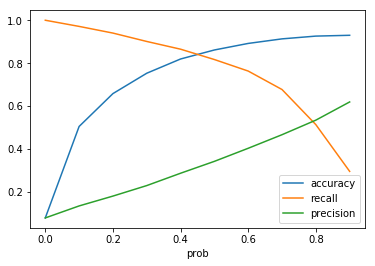

In [157]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','recall','precision'])
plt.show()

In [158]:
y_train_prob['pred']= y_train_prob.churn_prob.map(lambda x: 1 if x > 0.4 else 0)
y_train_prob.head()

churn  churn_prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  \
0  0.626967    0.373033    1    1    1    1    0    0    0    0    0    0   
1  0.988208    0.011792    1    0    0    0    0    0    0    0    0    0   
2  0.868230    0.131770    1    1    0    0    0    0    0    0    0    0   
3  0.998663    0.001337    1    0    0    0    0    0    0    0    0    0   
4  0.874415    0.125585    1    1    0    0    0    0    0    0    0    0   

   pred  
0     0  
1     0  
2     0  
3     0  
4     0

In [159]:
print("Evaluation on training data set: \n")
accuracy, precision, recall, f1, model_roc_auc =  classification_algo_metrics(y_train_rfe, y_train_prob.pred)

Evaluation on training data set: 

Accuracy Score   :  0.8195
Precision Score  :  0.2873
Recall Score     :  0.8652
F1 Score         :  0.4313
Area under curve :  0.8404 



In [160]:
y_test_prob = lm.predict_proba(X_test_rfe)
y_test_prob = pd.DataFrame(y_test_prob, columns = ['churn', 'churn_prob'])

y_test_prob['pred']= y_test_prob.churn_prob.map(lambda x: 1 if x > 0.4 else 0)

In [161]:
print("Evaluation on testing data set: \n")
accuracy, precision, recall, f1, model_roc_auc =  classification_algo_metrics(y_test_rfe, y_test_prob.pred)

Evaluation on testing data set: 

Accuracy Score   :  0.8126
Precision Score  :  0.2793
Recall Score     :  0.8649
F1 Score         :  0.4222
Area under curve :  0.8365 



In [162]:
df_metrics.append(['LR using class weight', accuracy, precision, recall, f1,  model_roc_auc])

In [163]:
coeff_values = pd.DataFrame(X_train_rfe.columns, columns = ['Feature Name'])
coeff_values['LR_coef'] =lm.coef_.T
coeff_values.head()

Feature Name   LR_coef
0       onnet_mou_8 -0.178316
1      offnet_mou_7  0.267216
2  loc_og_t2m_mou_7 -0.213533
3  loc_og_t2m_mou_8 -0.440320
4      loc_og_mou_6 -0.221028

In [164]:
#Finding the coefficient values
coeff_values = coeff_values.sort_values(by = 'LR_coef')

<BarContainer object of 50 artists>

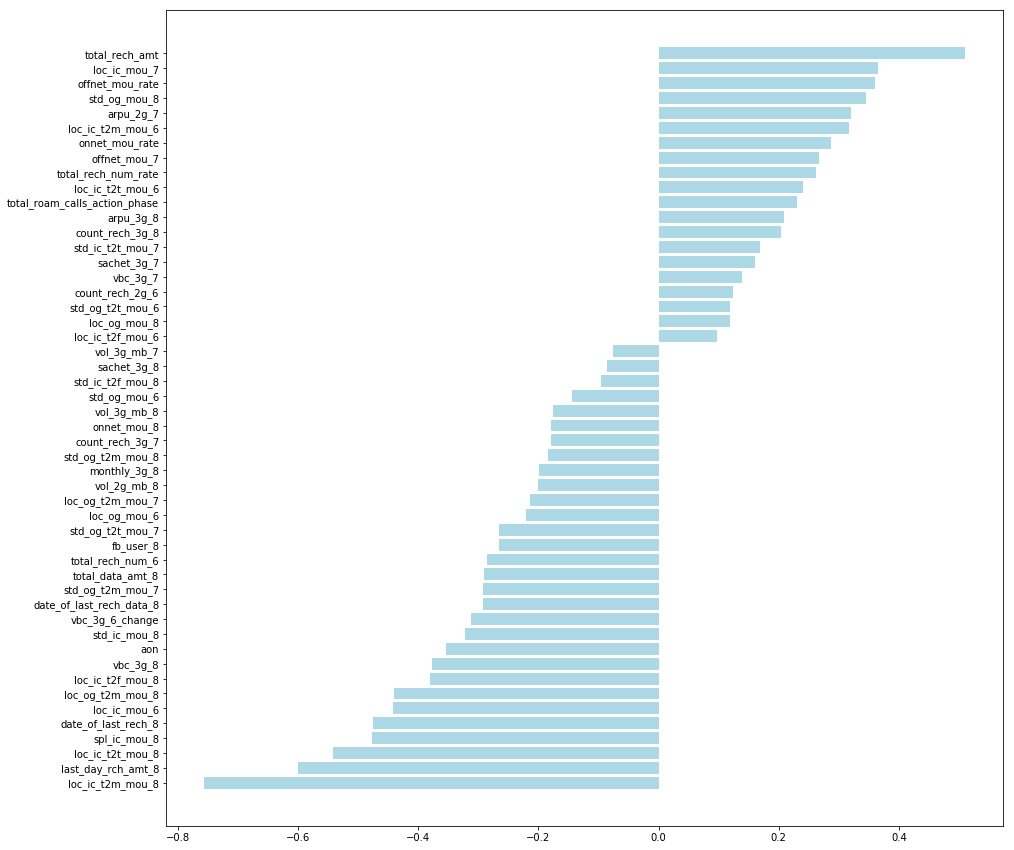

In [165]:
#A plot which indicates the coefficient values based on which we can select our top indicators of churn
fig = plt.figure(figsize=(15,15))
plt.barh(coeff_values['Feature Name'], coeff_values['LR_coef'], color ='#ADD8E6')

<BarContainer object of 15 artists>

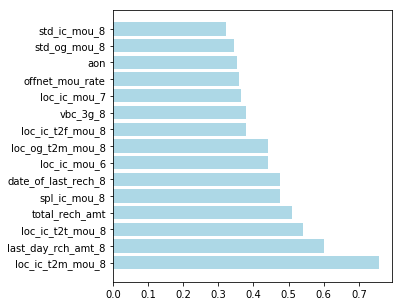

In [166]:
#Finding the absolute values of the coefficients for the ease of analysing
coeff_values['sign'] = coeff_values['LR_coef'].apply(lambda x : 'positive' if x >= 0 else 'negative')
coeff_values['coef'] = coeff_values['LR_coef'].apply(lambda x: abs(x) )
coeff_values = coeff_values.sort_values(by=['coef'], ascending=False)
fig = plt.figure(figsize=(5,5))
plt.barh(coeff_values['Feature Name'][:15], coeff_values['coef'][:15], color ='#ADD8E6')

#### Top features for customer churn from Logistic Regression(with class weight) model

From the graph we infer that the top features are 
- loc_ic_t2m_mou_8
- last_day_rch_amt_8
- loc_ic_t2t_mou_8 
- total_rech_amt 
- spl_ic_mou_8

### Running Random Forest without pca,without imbalance handling

In [167]:
## Running the random forest with default parameters.
rf = RandomForestClassifier(random_state=42, n_estimators=10, max_depth=3)
#Fit
rf.fit(X_train, y_train)
#Make predictions on Train set
y_train_pred = rf.predict(X_train_scaled)
classification_algo_metrics(y_train, y_train_pred)

Accuracy Score   :  0.7983
Precision Score  :  0.2205
Recall Score     :  0.6107
F1 Score         :  0.324
Area under curve :  0.7126 



(0.7983, 0.2205, 0.6107, 0.324, 0.7126)

In [168]:
#Make predictions on Test set
y_test_pred = rf.predict(X_test_scaled)
classification_algo_metrics(y_test, y_test_pred)

Accuracy Score   :  0.8028
Precision Score  :  0.2356
Recall Score     :  0.6643
F1 Score         :  0.3479
Area under curve :  0.7395 



(0.8028, 0.2356, 0.6643, 0.3479, 0.7395)

### Hyper Parameter Tuning on the original dataset (no pca no imbalance handling)

In [169]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50,100],
    'max_features': [2,3,4],
    'n_estimators': [10,30, 50, 100, 200]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "recall")

In [170]:
#%%time
#grid_search.fit(X_train, y_train)
#grid_search.best_estimator_
#rf_best = grid_search.best_estimator_
#evaluate_model(rf_best)

In [171]:
#values got after hpt 
rf_hpt = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

rf_hpt.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, max_features=4, min_samples_leaf=5,
                       n_estimators=200, n_jobs=-1, random_state=42)

In [172]:
#Make predictions on Train set
y_train_pred = rf_hpt.predict(X_train)
classification_algo_metrics(y_train, y_train_pred)

Accuracy Score   :  0.951
Precision Score  :  0.8184
Recall Score     :  0.4893
F1 Score         :  0.6124
Area under curve :  0.74 



(0.951, 0.8184, 0.4893, 0.6124, 0.74)

In [173]:
##Make predictions on Test set
y_test_pred = rf_hpt.predict(X_test)
accuracy, precision, recall, f1,  model_roc_auc = classification_algo_metrics(y_test, y_test_pred)

Accuracy Score   :  0.9458
Precision Score  :  0.7489
Recall Score     :  0.4751
F1 Score         :  0.5814
Area under curve :  0.7307 



In [174]:
#For final table creation with all models and their metrics
df_metrics.append(['Random Forest with no pca, no imbalance ', accuracy, precision, recall, f1,  model_roc_auc])

## Random Forest with Smote

In [175]:
#Running random forest with Smote
rf = RandomForestClassifier(random_state=42, n_estimators=10, max_depth=3)
#Fit the model
rf.fit(X_train_smote, y_train_smote)
#Making prediction on Train Set
y_train_pred = rf.predict(X_train_smote)
classification_algo_metrics(y_train_smote, y_train_pred)

Accuracy Score   :  0.8538
Precision Score  :  0.8875
Recall Score     :  0.8103
F1 Score         :  0.8471
Area under curve :  0.8538 



(0.8538, 0.8875, 0.8103, 0.8471, 0.8538)

In [176]:
#Making predictions on Test Set
y_test_pred = rf.predict(X_test_scaled)
accuracy, precision, recall, f1, model_roc_auc = classification_algo_metrics(y_test, y_test_pred)

Accuracy Score   :  0.8854
Precision Score  :  0.3866
Recall Score     :  0.761
F1 Score         :  0.5127
Area under curve :  0.8286 



In [177]:
df_metrics.append(['Random Forest using Smote', accuracy, precision, recall, f1,  model_roc_auc])

In [178]:
## Tuning it with HPT
#classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Create the parameter grid based on the results of random search 
#params = {
#    'max_depth': [1, 2, 5, 10, 20],
#    'min_samples_leaf': [5, 10, 20, 50,100],
#    'max_features': [2,3,4],
#    'n_estimators': [10,30, 50, 100, 200]
#}

# Instantiate the grid search model
#grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
#                          cv=4, n_jobs=-1, verbose=1, scoring = "recall")


#%%time
#grid_search.fit(X_train_smote, y_train_smote)
#grid_search.best_estimator_
#rf_best = grid_search.best_estimator_
#evaluate_model(rf_best)

In [179]:
#values got after hpt 
rf_hpt = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={0:0.1, 1:0.9},
                       criterion='gini', max_depth=10, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

rf_hpt.fit(X_train_smote, y_train_smote)

RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_depth=10,
                       max_features=4, min_samples_leaf=5, n_estimators=200,
                       n_jobs=-1, random_state=42)

In [180]:
#Making predictions on train set with HPT
y_train_pred = rf_hpt.predict(X_train_smote)
classification_algo_metrics(y_train_smote, y_train_pred)

Accuracy Score   :  0.8573
Precision Score  :  0.778
Recall Score     :  0.9999
F1 Score         :  0.8751
Area under curve :  0.8573 



(0.8573, 0.778, 0.9999, 0.8751, 0.8573)

In [181]:
#Making predictions on Test Set with HPT
y_test_pred = rf_hpt.predict(X_test_scaled)
accuracy, precision, recall, f1, model_roc_auc = classification_algo_metrics(y_test, y_test_pred)

Accuracy Score   :  0.7145
Precision Score  :  0.2057
Recall Score     :  0.9104
F1 Score         :  0.3355
Area under curve :  0.804 



In [182]:
##For final table creation with all models and their metrics
df_metrics.append(['Random Forest using Smote and HPT', accuracy, precision, recall, f1,  model_roc_auc])

In [183]:
#Important Features of radom forest with hyper parameter tuning
rf_hpt.feature_importances_

array([2.98546073e-03, 3.58489081e-03, 8.24433314e-03, 2.92103340e-03,
       3.38472364e-03, 3.90699907e-03, 3.45274260e-03, 3.39068223e-03,
       7.78057374e-03, 3.04072649e-03, 3.71093038e-03, 1.52046215e-02,
       4.96751825e-03, 5.59097465e-03, 2.14075427e-02, 3.21253330e-03,
       3.74772547e-03, 9.19503385e-03, 1.57083235e-03, 2.38788241e-03,
       1.63730238e-03, 5.40610446e-03, 4.57340053e-03, 2.08714425e-02,
       4.63201434e-03, 8.96891476e-03, 5.09875372e-03, 3.93862523e-03,
       6.50057879e-03, 5.31911500e-03, 9.30623858e-04, 9.61732930e-04,
       1.73237016e-03, 3.96775325e-03, 7.08550087e-03, 6.43856411e-03,
       1.83182390e-03, 1.56311628e-03, 1.12357964e-03, 2.83814588e-03,
       4.45347685e-03, 4.86203759e-03, 1.69123399e-03, 2.35005010e-05,
       1.28409425e-05, 4.23991606e-03, 3.81208972e-03, 1.83207857e-02,
       6.87885257e-03, 6.14440227e-03, 2.87675203e-02, 4.14464670e-03,
       5.09586156e-03, 1.27209975e-02, 7.02661680e-03, 8.22749772e-03,
      

In [184]:
# Coefficients and their values of random forest
coeff_values_rf = pd.DataFrame(X_train_smote.columns, columns = ['Feature Name'])
coeff_values_rf['RF_coef'] =rf_hpt.feature_importances_.T
coeff_values_rf.head()

Feature Name   RF_coef
0       arpu_6  0.002985
1       arpu_7  0.003585
2       arpu_8  0.008244
3  onnet_mou_6  0.002921
4  onnet_mou_7  0.003385

In [185]:
#To find the top features of random forest based on their coefficients
coeff_values_rf = coeff_values_rf.sort_values(by = 'RF_coef')

<BarContainer object of 15 artists>

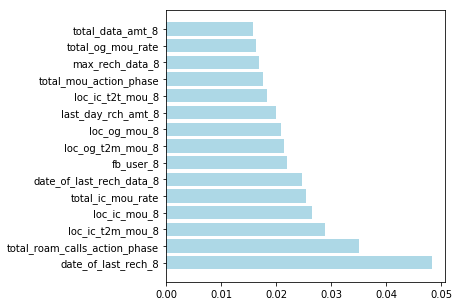

In [186]:
#Taking the absolute value of the coefficients
coeff_values_rf['sign'] = coeff_values_rf['RF_coef'].apply(lambda x : 'positive' if x >= 0 else 'negative')
coeff_values_rf['coef'] = coeff_values_rf['RF_coef'].apply(lambda x: abs(x) )
coeff_values_rf = coeff_values_rf.sort_values(by=['coef'], ascending=False)
fig = plt.figure(figsize=(5,5))
plt.barh(coeff_values_rf['Feature Name'][:15], coeff_values_rf['coef'][:15], color ='#ADD8E6')

#### Top features for customer churn from Random Forest (with Smote) model
- date_of_last_rech_8
- total_roam_calls_action_phase
- loc_ic_t2m_mou_8
- loc_ic_mou_8
- date_of_last_rech_data_8

## Top Indicators or Features for Customer Churning


<b><b/>Based on the Logistic Regression(with class weight) and Random Forest(with Smote) Models we conclude below are the top indicators for customer churn

1.date_of_last_rech_8

2.loc_ic_t2m_mou_8
    
3.total_roam_calls_action_phase
    
4.last_day_rch_amt_8
    
5.loc_ic_mou_8
    
6.loc_ic_t2t_mou_8 
    
7.date_of_last_rech_data_8
    
8.total_rech_amt 
    
9.spl_ic_mou_8


## Actionable Recommendations for the Churn Indicators



As we can see from the above top features most of them are from the Action Phase or the 8th month

Since most of the people recharge in the Last week of the month which is the "date_of_last_rech_8" and "date_of_last_rech_data_8" are important indicators, the company should keep interesting discounts and offers in the last week of the month to encourage customers to recharge.

The Incoming in Roaming Incoming or Outgoing Calls is a strong indicator of churn it might be like the person is is shifting to a new place so offers should be made on roaming packs or make roaming free at a minimal cost

If the incoming calls to a person decreases it may indicate that the person has an alterate number so appropriate callinga nd data packsshould be provided to keep the customer

If the "last_day_rch_amt_8" is deviated from the usual trend it may indicate the person has a new phone number so appropriate packs should be given o that the person likes the service better and does not churn.

## Applying PCA

In [187]:
#Doing the PCA on the train data
pca = PCA(random_state=100)
pca.fit(X_train_scaled)

PCA(random_state=100)

In [188]:
#Finding the components of PCA
pca.components_

array([[-9.56604909e-02, -1.00183495e-01, -8.25996571e-02, ...,
        -2.48126532e-02, -1.75732602e-01, -1.47209582e-01],
       [ 1.18381194e-01,  1.34642011e-01,  1.53545552e-01, ...,
         1.21046663e-02,  9.64813177e-02,  1.16547277e-01],
       [ 9.44189384e-02,  1.26761271e-01,  1.13577144e-01, ...,
         3.93939946e-02,  5.58004058e-02,  6.00968878e-02],
       ...,
       [-0.00000000e+00, -4.92661467e-16, -3.09357464e-16, ...,
        -1.73472348e-16, -4.49754731e-01,  4.79572919e-01],
       [ 0.00000000e+00,  8.36136715e-16, -3.09396340e-15, ...,
        -1.56125113e-16,  3.52806901e-01, -3.76197567e-01],
       [-0.00000000e+00, -3.83638162e-17, -2.19754373e-16, ...,
         5.87773103e-17,  6.37777185e-02, -6.80061031e-02]])

In [189]:
#Finding the PCA explained variance ratio
pca.explained_variance_ratio_

array([1.23312585e-01, 1.03502056e-01, 6.32387725e-02, 5.62949777e-02,
       4.63608805e-02, 3.69386383e-02, 2.83057182e-02, 2.42287729e-02,
       2.33737538e-02, 2.03139099e-02, 1.92446257e-02, 1.72128115e-02,
       1.65851857e-02, 1.56692498e-02, 1.53340293e-02, 1.44778832e-02,
       1.41195184e-02, 1.38423296e-02, 1.21802010e-02, 1.13597542e-02,
       1.08217588e-02, 1.02446149e-02, 9.63009925e-03, 9.10546616e-03,
       8.93137191e-03, 8.80550293e-03, 8.54818277e-03, 8.41961120e-03,
       7.96749161e-03, 7.78466284e-03, 7.57002602e-03, 7.27558564e-03,
       6.84752551e-03, 6.56031851e-03, 6.47175289e-03, 6.29706452e-03,
       6.06040758e-03, 5.75274610e-03, 5.63383768e-03, 5.48785648e-03,
       5.37418630e-03, 5.10206380e-03, 4.95939288e-03, 4.88923333e-03,
       4.84036964e-03, 4.61164310e-03, 4.56791782e-03, 4.33159521e-03,
       4.21154057e-03, 4.12905710e-03, 4.02972166e-03, 3.84071125e-03,
       3.80350796e-03, 3.69508693e-03, 3.62851595e-03, 3.43120483e-03,
      

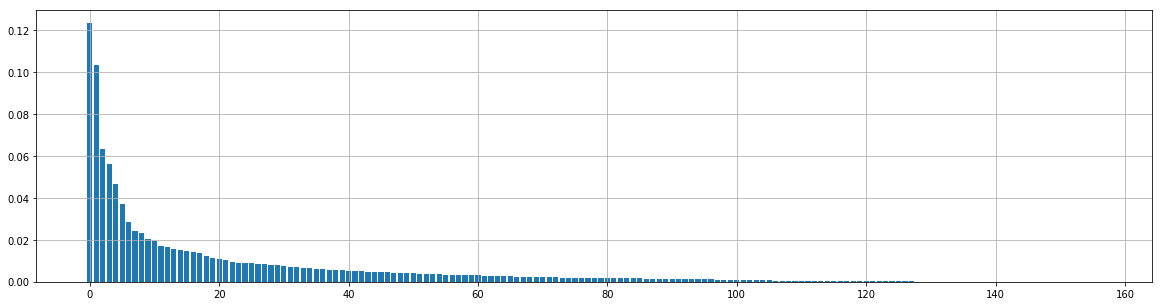

In [190]:
#ratio plot
var_cum = np.cumsum(pca.explained_variance_ratio_)

fig = plt.figure(figsize=(20,5))
plt.bar(range(len(pca.explained_variance_ratio_)),pca.explained_variance_ratio_)
plt.grid()
plt.show()

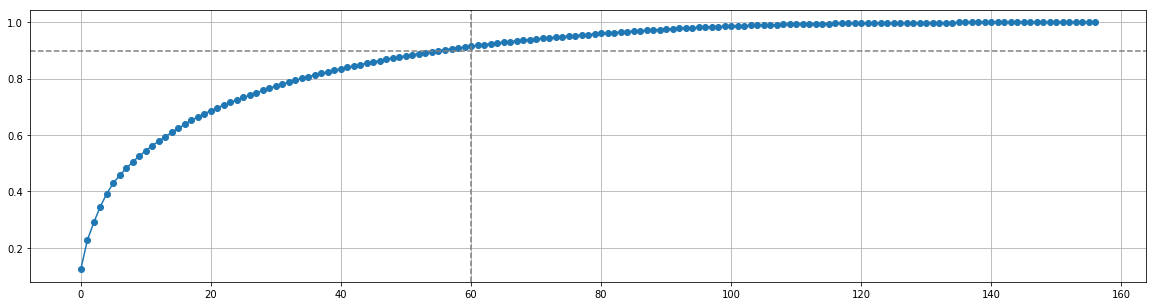

In [191]:
#Scree Plot
fig = plt.figure(figsize=(20,5))
plt.plot(var_cum,marker = 'o')
plt.axhline(0.90, color='gray', linestyle='--')
plt.axvline(60, color='gray', linestyle='--')
plt.grid()
plt.show()

As we can see 60 component explain 90% of variance in the data


In [192]:
#Doing the PCA on train data at 90%
pca_final = PCA(0.90)
X_train_pca = pca_final.fit_transform(X_train_scaled)

X_train_pca.shape

(20713, 57)

In [193]:
##creating correlation matrix for the principal components
corrmat = np.corrcoef(X_train_pca.transpose())
corrmat.shape

(57, 57)

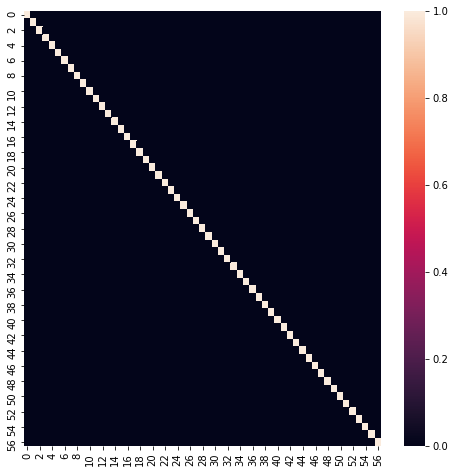

In [194]:
#plotting the correlation matrix
plt.figure(figsize=[8,8])
sns.heatmap(corrmat)
# we observe that, all the variables are not correlated 

In [195]:
X_test_pca = pca_final.transform(X_test_scaled)
X_test_pca = pd.DataFrame(X_test_pca)

### Smote with PCA 


In [196]:
#We see that there is a lot of imbalance 
# we will handle it using SMOTE 

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()

X_train_pca_smote, y_train_pca_smote = smt.fit_resample(X_train_pca, y_train)

counter = Counter(y_train_pca_smote)
print('After',counter)


y_train_pca_smote = pd.DataFrame(y_train_pca_smote)
X_train_pca_smote = pd.DataFrame(X_train_pca_smote)


Before Counter({0: 19074, 1: 1639})
After Counter({0: 19074, 1: 19074})


### Logistic Regression with PCA and Smote

In [197]:
'''
##penalty using GridSearchCV
lr = LogisticRegression(n_jobs = -1, random_state = 100)

params = {
    'penalty': ['l2'],
    'C': [0.1, 1, 10, 100,500, 1000]
}

gc = GridSearchCV(estimator = lr, param_grid = params, scoring = 'recall', n_jobs = 15, cv = 5, verbose = 2)
gc = gc.fit(X_train_pca_smote, y_train_pca_smote)

# scores of GridSearch CV
scores = gc.cv_results_    

# Get the best value
gc.best_params_

'''

"\n##penalty using GridSearchCV\nlr = LogisticRegression(n_jobs = -1, random_state = 100)\n\nparams = {\n    'penalty': ['l2'],\n    'C': [0.1, 1, 10, 100,500, 1000]\n}\n\ngc = GridSearchCV(estimator = lr, param_grid = params, scoring = 'recall', n_jobs = 15, cv = 5, verbose = 2)\ngc = gc.fit(X_train_pca_smote, y_train_pca_smote)\n\n# scores of GridSearch CV\nscores = gc.cv_results_    \n\n# Get the best value\ngc.best_params_\n\n"

In [198]:
'''
Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'C': 0.1, 'penalty': 'l2'}

'''

"\nFitting 5 folds for each of 6 candidates, totalling 30 fits\n{'C': 0.1, 'penalty': 'l2'}\n\n"

In [199]:
#Fitting the Logistic Regression Model on with PCA and SMote
lr = LogisticRegression(penalty = 'l2', C = 0.1, n_jobs = -1, random_state = 100, )
logistic_model_pca_smote = lr.fit(X_train_pca_smote, y_train_pca_smote)

In [200]:
#Make predictions on Train Set
y_train_pred = logistic_model_pca_smote.predict(X_train_pca_smote)
y_train_pred

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [201]:

print("Evaluation on training data set: \n")
classification_algo_metrics(y_train_pca_smote, y_train_pred)

Evaluation on training data set: 

Accuracy Score   :  0.8495
Precision Score  :  0.8387
Recall Score     :  0.8654
F1 Score         :  0.8518
Area under curve :  0.8495 



(0.8495, 0.8387, 0.8654, 0.8518, 0.8495)

In [202]:
#Make predictions on Test Set
y_test_pred = logistic_model_pca_smote.predict(X_test_pca)
y_test_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [203]:
print("Evaluation on training data set: \n")
accuracy, precision, recall, f1, model_roc_auc =  classification_algo_metrics(y_test, y_test_pred)

Evaluation on training data set: 

Accuracy Score   :  0.8325
Precision Score  :  0.3016
Recall Score     :  0.8478
F1 Score         :  0.4449
Area under curve :  0.8395 



In [204]:
##For final table creation with all models and their metrics
df_metrics.append(['LR using PCA and Smote', accuracy, precision, recall, f1,  model_roc_auc])

## Random Forest

### Random Forest Model with PCA and Smote 

In [205]:
#Applying Random Forest with PCA and SMote
rf_pca_smote = RandomForestClassifier(random_state=42, n_estimators=10, max_depth=3)
rf_pca_smote.fit(X_train_pca_smote, y_train_pca_smote)

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=42)

In [206]:
#Making predictions on Train Set
y_train_pred = rf_pca_smote.predict(X_train_pca_smote)
classification_algo_metrics(y_train_pca_smote, y_train_pred)

Accuracy Score   :  0.7998
Precision Score  :  0.81
Recall Score     :  0.7834
F1 Score         :  0.7965
Area under curve :  0.7998 



(0.7998, 0.81, 0.7834, 0.7965, 0.7998)

In [207]:
#Making predictions on Test Set
y_test_pred = rf_pca_smote.predict(X_test_pca)
classification_algo_metrics(y_test, y_test_pred)

Accuracy Score   :  0.8132
Precision Score  :  0.2585
Recall Score     :  0.7269
F1 Score         :  0.3813
Area under curve :  0.7738 



(0.8132, 0.2585, 0.7269, 0.3813, 0.7738)

In [208]:
#%%time
#grid_search.fit(X_train, y_train)
#grid_search.best_estimator_
#rf_best = grid_search.best_estimator_
#evaluate_model(rf_best,X_train_pca_smote,y_train_pca_smote,X_test_pca,y_test)

In [209]:
#values got after hpt 
rf_hpt_pca_smote = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,class_weight={0:0.1,1:0.9},
                       criterion='gini', max_depth=30, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
rf_hpt_pca_smote.fit(X_train_pca_smote, y_train_pca_smote)
#Making prediction on Train Set with HPT
y_train_pred = rf_hpt_pca_smote.predict(X_train_pca_smote)
classification_algo_metrics(y_train_pca_smote, y_train_pred)

Accuracy Score   :  0.9284
Precision Score  :  0.8748
Recall Score     :  1.0
F1 Score         :  0.9332
Area under curve :  0.9284 



(0.9284, 0.8748, 1.0, 0.9332, 0.9284)

In [210]:
#Making Predictions on Test Set with HPT
y_test_pred = rf_hpt_pca_smote.predict(X_test_pca)
accuracy, precision, recall, f1,  model_roc_auc = classification_algo_metrics(y_test, y_test_pred)

Accuracy Score   :  0.8157
Precision Score  :  0.2778
Recall Score     :  0.8293
F1 Score         :  0.4161
Area under curve :  0.8219 



In [211]:
##For final table creation with all models and their metrics
df_metrics.append(['Random Forest using PCA and Smote', accuracy, precision, recall, f1,  model_roc_auc])

## XGBOOST with PCA and Smote


In [212]:
#Using XGBOOST with PCA and SMote
xgb_cfl = xgb.XGBClassifier(n_jobs = -1,scale_pos_weight=9)
xgb_cfl.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'gamma': None,
 'gpu_id': None,
 'importance_type': 'gain',
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': 9,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [213]:
# Fit the model to our train and target
xgb_cfl.fit(X_train_pca_smote,y_train_pca_smote)  # default 


[21:26:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=9, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [214]:
#Making predictions on Train Set
y_train_pred = xgb_cfl.predict(X_train_pca_smote)
classification_algo_metrics(y_train_pca_smote, y_train_pred)


Accuracy Score   :  0.9801
Precision Score  :  0.9617
Recall Score     :  1.0
F1 Score         :  0.9805
Area under curve :  0.9801 



(0.9801, 0.9617, 1.0, 0.9805, 0.9801)

In [215]:
#Making predictions on test set
y_test_pred = xgb_cfl.predict(X_test_pca)
accuracy, precision, recall, f1,  model_roc_auc = classification_algo_metrics(y_test, y_test_pred)

Accuracy Score   :  0.8745
Precision Score  :  0.357
Recall Score     :  0.7297
F1 Score         :  0.4794
Area under curve :  0.8084 



In [216]:
##For final table creation with all models and their metrics
df_metrics.append(['XGBoost using PCA and Smote', accuracy, precision, recall, f1,  model_roc_auc])

## HPT

In [217]:
'''
# A parameter grid for XGBoost
params = {
        'n_estimators' : [100, 200, 500, 750], # no of trees 
        'learning_rate' : [0.01,0.1, 0.2],  # eta
        'gamma': [0.1, 0.5, 1, 5],
        'subsample': [0.4, 0.6, 0.8],
        'max_depth': [3, 4, 5, 10]
        }

folds = 4
param_comb = 25 
random_search = RandomizedSearchCV(xgb_cfl, param_distributions=params, n_iter=param_comb, scoring='recall', n_jobs=-1, cv=4, verbose=3, random_state=42)
random_search.fit(X_train_pca_smote, y_train_pca_smote)

print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best accuracy for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ )
print('\n Best hyperparameters:')
print(random_search.best_params_)
'''

"\n# A parameter grid for XGBoost\nparams = {\n        'n_estimators' : [100, 200, 500, 750], # no of trees \n        'learning_rate' : [0.01,0.1, 0.2],  # eta\n        'gamma': [0.1, 0.5, 1, 5],\n        'subsample': [0.4, 0.6, 0.8],\n        'max_depth': [3, 4, 5, 10]\n        }\n\nfolds = 4\nparam_comb = 25 \nrandom_search = RandomizedSearchCV(xgb_cfl, param_distributions=params, n_iter=param_comb, scoring='recall', n_jobs=-1, cv=4, verbose=3, random_state=42)\nrandom_search.fit(X_train_pca_smote, y_train_pca_smote)\n\nprint('\n Best estimator:')\nprint(random_search.best_estimator_)\nprint('\n Best accuracy for %d-fold search with %d parameter combinations:' % (folds, param_comb))\nprint(random_search.best_score_ )\nprint('\n Best hyperparameters:')\nprint(random_search.best_params_)\n"

In [218]:
'''
Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=750, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=1)

Best accuracy for 4-fold search with 25 parameter combinations:
0.990772482746513

 Best hyperparameters:
{'subsample': 0.6, 'n_estimators': 750, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.1}

'''

"\nBest estimator:\nXGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,\n              colsample_bynode=1, colsample_bytree=1, gamma=0.1,\n              learning_rate=0.1, max_delta_step=0, max_depth=5,\n              min_child_weight=1, missing=None, n_estimators=750, n_jobs=-1,\n              nthread=None, objective='binary:logistic', random_state=0,\n              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,\n              silent=None, subsample=0.6, verbosity=1)\n\nBest accuracy for 4-fold search with 25 parameter combinations:\n0.990772482746513\n\n Best hyperparameters:\n{'subsample': 0.6, 'n_estimators': 750, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.1}\n\n"

In [219]:
#XGBOOST with HPT, PCA and Smote
xgb_hpt = xgb.XGBClassifier(learning_rate=0.01,n_estimators=300, x_depth=3,min_child_weight=50, 
                          gamma=0.1,nthread=4,subsample=0.4,colsample_bytree=0.6,
                          reg_alpha=10,reg_lambda=2,scale_pos_weight = 3)
xgb_hpt.fit(X_train_pca_smote,y_train_pca_smote)
xgb_hpt.get_params()

[21:26:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { x_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:26:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.6,
 'gamma': 0.1,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.01,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 50,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 300,
 'n_jobs': 4,
 'num_parallel_tree': 1,
 'random_state': 0,
 'reg_alpha': 10,
 'reg_lambda': 2,
 'scale_pos_weight': 3,
 'subsample': 0.4,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None,
 'x_depth': 3,
 'nthread': 4}

In [220]:
# Get our predictions for train set
y_train_pred = xgb_hpt.predict(X_train_pca_smote)
classification_algo_metrics(y_train_pca_smote, y_train_pred)

Accuracy Score   :  0.8452
Precision Score  :  0.775
Recall Score     :  0.9728
F1 Score         :  0.8627
Area under curve :  0.8452 



(0.8452, 0.775, 0.9728, 0.8627, 0.8452)

In [221]:
#Get our predictions for test set
y_test_pred = xgb_hpt.predict(X_test_pca)
accuracy, precision, recall, f1,  model_roc_auc = classification_algo_metrics(y_test, y_test_pred)

Accuracy Score   :  0.7241
Precision Score  :  0.2113
Recall Score     :  0.909
F1 Score         :  0.3429
Area under curve :  0.8086 



In [222]:
#XGBOOST feature importances with HPT
xgb_hpt.feature_importances_

array([0.01844713, 0.06881267, 0.04021915, 0.10105521, 0.0429261 ,
       0.01461821, 0.01502759, 0.01216785, 0.02020477, 0.01887701,
       0.02600803, 0.01271183, 0.00905713, 0.02535384, 0.02797826,
       0.01095086, 0.01110801, 0.00945572, 0.02642925, 0.01119009,
       0.01715983, 0.01043878, 0.0207633 , 0.02062758, 0.01651274,
       0.03011343, 0.01354936, 0.01368173, 0.01674988, 0.01575418,
       0.00690787, 0.01067515, 0.01641297, 0.0085171 , 0.01306403,
       0.00960452, 0.01691441, 0.01518705, 0.01325245, 0.01775067,
       0.00885794, 0.00863197, 0.01602704, 0.01060303, 0.01075027,
       0.01275113, 0.00521976, 0.00998193, 0.01178452, 0.00980697,
       0.01199666, 0.01456178, 0.01282025, 0.00598325, 0.00668468,
       0.00598207, 0.01132095], dtype=float32)

In [223]:
##For final table creation with all models and their metrics
df_metrics.append(['XGBoost using PCA and Smote with HPT', accuracy, precision, recall, f1,  model_roc_auc])

## Gradient Boosting with PCA, SMOTE and HPT

In [224]:
# Gradient Boosting with PCA and Smote
gb_pca_smote = GradientBoostingClassifier(random_state=100) # default 
gb_pca_smote.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 100,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [225]:
# Fit the model to our train and target
gb_pca_smote.fit(X_train_pca_smote, y_train_pca_smote)
# Get our predictions
gb_pca_smote_predictions = gb_pca_smote.predict(X_test_pca)

In [226]:
#Make the predictions on train set
y_train_pred = gb_pca_smote.predict(X_train_pca_smote)
classification_algo_metrics(y_train_pca_smote, y_train_pred)

Accuracy Score   :  0.8766
Precision Score  :  0.8769
Recall Score     :  0.8762
F1 Score         :  0.8765
Area under curve :  0.8766 



(0.8766, 0.8769, 0.8762, 0.8765, 0.8766)

In [227]:
#Making the predictions on Test Set
y_test_pred = gb_pca_smote.predict(X_test_pca)
accuracy, precision, recall, f1,  model_roc_auc = classification_algo_metrics(y_test, y_test_pred)

Accuracy Score   :  0.8611
Precision Score  :  0.3374
Recall Score     :  0.7824
F1 Score         :  0.4715
Area under curve :  0.8251 



In [228]:
##For final table creation with all models and their metrics
df_metrics.append(['GBM using PCA and Smote with HPT', accuracy, precision, recall, f1,  model_roc_auc])

In [229]:
#Final table with all the models and the metrics
df_metrics = pd.DataFrame(df_metrics, columns = ['model','accurarcy','precision','recall','F1 score','AUC'])


In [230]:
df_metrics

model  accurarcy  precision  recall  \
0                     LR using class weight     0.8126     0.2793  0.8649   
1  Random Forest with no pca, no imbalance      0.9458     0.7489  0.4751   
2                 Random Forest using Smote     0.8854     0.3866  0.7610   
3         Random Forest using Smote and HPT     0.7145     0.2057  0.9104   
4                    LR using PCA and Smote     0.8325     0.3016  0.8478   
5         Random Forest using PCA and Smote     0.8157     0.2778  0.8293   
6               XGBoost using PCA and Smote     0.8745     0.3570  0.7297   
7      XGBoost using PCA and Smote with HPT     0.7241     0.2113  0.9090   
8          GBM using PCA and Smote with HPT     0.8611     0.3374  0.7824   

   F1 score     AUC  
0    0.4222  0.8365  
1    0.5814  0.7307  
2    0.5127  0.8286  
3    0.3355  0.8040  
4    0.4449  0.8395  
5    0.4161  0.8219  
6    0.4794  0.8084  
7    0.3429  0.8086  
8    0.4715  0.8251

## Model Recommendations

<b><b/>We are using Recall/Sensitivity as a measure for selecting the models, as the cost to retain a customer is way less than acquiring new customers. So we will keep higher recall metric as, no churn customer should be missed but we are okay with a few non churn customers getting predicted as churn customers

Based on the above Table we can see the following models can be selected to <b></b> predict which customers are at a higher to churn in a telecom industry

XGBoost using PCA and Smote with HPT	  : Recall = 90.75%     

